# INN Hotels Project (Gabriel Adams)

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import image
from sklearn import tree
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

df=pd.read_csv('INNHotelsGroup.csv')
hotel=df.copy()

import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [2]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### 19 columns, 36275 rows.
### From the .info check, it appears there are no null values. However, they may be present in the form of categories or numbers that don't make sense.

In [3]:
for column in hotel.columns:
    if hotel[column].dtype=='O':
        hotel[column]=hotel[column].astype('category')

In [4]:
hotel.describe(include='all').T

count unique           top   freq  \
Booking_ID                              36275  36275      INN00001      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

### From the .describe check, we can see booking_status is, in fact, a binary classification. We will turn this into a numerical later on.
### We can also see Booking_ID is simply an identifier for each individual booking; this won't be very useful to us so we will immediately drop it.
    Even if the ID numbers are in chronological order, we have better units of booking time already present.

In [5]:
hotel.drop('Booking_ID',axis=1,inplace=True)
hotel.describe(include='all').T

count unique           top   freq  \
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest                           0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0    58.0  
avg_price_per_room                     99.45   

## There are some things to note before going into EDA.
#### no_of_children has a minimum thru Q3 of 0.0 children. However, the max is 10. There may be a strong case here for outliers.
#### arrival_year/month/date are curiously numerical, rather than in datetime format.
#### no_of_previous_cancellations is also a good contender for outliers; minimum thru Q3 are again 0.0, but the max is 13. However, these outliers would logically be important to keep, as repeat cancellers tend to continue the trend.
#### no_of_previous_bookings_not_cancelled is the same story.
#### no_of_special_requests is the most interesting column at face value. I'm curious to see how this impacts the data.

---
---
---


# <span style='font-size:larger'>Exploratory Data Analysis (EDA)</span>

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions: ✓**  
✓ 1. What are the busiest months in the hotel?  
✓ 2. Which market segment do most of the guests come from?   
✓ 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?  
✓ 4. What percentage of bookings are canceled?   
✓ 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?  
✓ 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [6]:
def histobox(data, feature, figsize=(15, 5), kde=False, bins=1451):
    
#bins= number of sections of a histogram 

    HBP, (box,hist) = plt.subplots(
        nrows=2,
        sharex=True, #sharex and sharey just means the x and y axis won't show up for both, only one (usually bottom or left)
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    sns.boxplot(
        data=data, x=feature, ax=box, showmeans=True, color="orange"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=hist, bins=bins, palette="mako" #i like mako
    )
    hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

# <span style='font-size:larger'>Univariate Analysis!</span>
# 1) no_of_adults
    discrete numerical data

   number_of_adults  counts
0                 2   26108
1                 1    7695
2                 3    2317
3                 0     139
4                 4      16


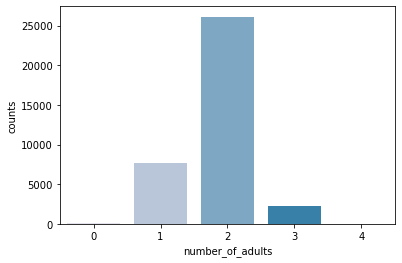

In [7]:
number_adults=pd.DataFrame(hotel['no_of_adults'].value_counts()).reset_index().rename(columns={'index':'number_of_adults','no_of_adults':'counts'})
sns.barplot(data=number_adults,x='number_of_adults',y='counts',palette='PuBu')
print(number_adults)
del number_adults

### Two is the most common adult count in the data. There are very few cases of 4 adults. The data appears normal in a countplot form.
---
# 2) no_of_children
    discrete numerical data

   number_of_children  counts
0                   0   33577
1                   1    1618
2                   2    1058
3                   3      19
4                   9       2
5                  10       1


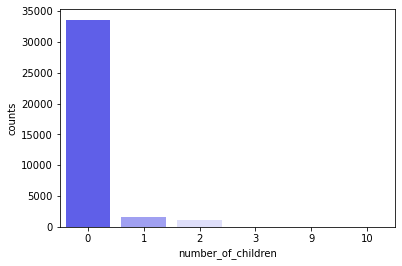

In [8]:
number_children=pd.DataFrame(hotel['no_of_children'].value_counts()).reset_index().rename(columns={'index':'number_of_children','no_of_children':'counts'})
sns.barplot(data=number_children,x='number_of_children',y='counts',palette='bwr')
print(number_children)
del number_children

### Zero is the highest child count by a massive margin. 9 and 10 are extreme outliers (only 3 examples between them), so they will be dropped from the data.
    Even if there are changes in the dependent variable with these three bookings, 3 examples aren't enough to
    make a reasonable conclusion about large 9+ child families.

In [9]:
index=list(hotel[hotel['no_of_children']==9].index)
index.append(list(hotel[hotel['no_of_children']==10].index)[0])

hotel=hotel.drop(index)

   number_of_children  counts
0                   0   33577
1                   1    1618
2                   2    1058
3                   3      19


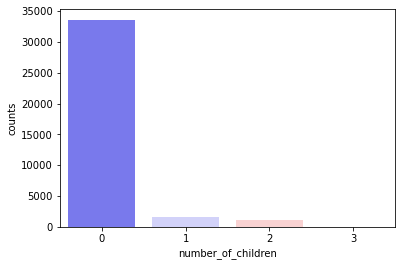

In [10]:
number_children=pd.DataFrame(hotel['no_of_children'].value_counts()).reset_index().rename(columns={'index':'number_of_children','no_of_children':'counts'})
sns.barplot(data=number_children,x='number_of_children',y='counts',palette='bwr')
print(number_children)
del number_children

---
# 3) no_of_weekend_nights
    discrete numerical data

   no_of_weekend_nights  counts
0                     0   16871
1                     1    9995
2                     2    9069
3                     3     153
4                     4     129
5                     5      34
6                     6      20
7                     7       1


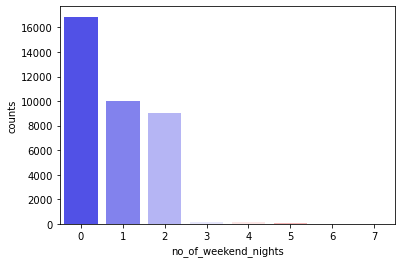

In [11]:
number_weekend=pd.DataFrame(hotel['no_of_weekend_nights'].value_counts()).reset_index().rename(columns={'index':'no_of_weekend_nights','no_of_weekend_nights':'counts'})
sns.barplot(data=number_weekend,x='no_of_weekend_nights',y='counts',palette='bwr')
print(number_weekend)
del number_weekend

### Zero is the highest count of weekend nights. After 2 weekend nights, there is a sharp drop-off, which makes sense. The same drop-off happens after 4 weekend nights, and 6, as it's necessary to spend an entire extra week to accrue these tiers of weekend nights.
#### I wouldn't call any of these outliers; it can help identify how many weeks were booked. Good binning contender.
---
# 4) no_of_week_nights
    discrete numerical data

    no_of_week_nights  counts
0                   2   11443
1                   1    9487
2                   3    7839
3                   4    2990
4                   0    2387
5                   5    1613
6                   6     189
7                   7     113
8                  10      62
9                   8      62
10                  9      34
11                 11      17
12                 15      10
13                 12       9
14                 14       7
15                 13       5
16                 17       3
17                 16       2


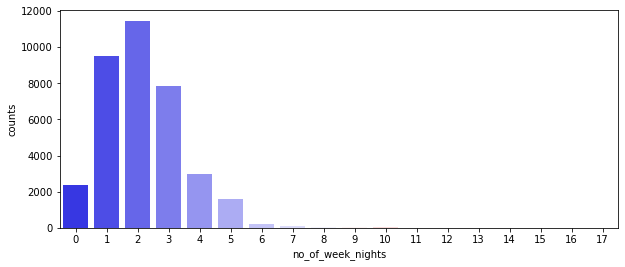

In [12]:
number_week=pd.DataFrame(hotel['no_of_week_nights'].value_counts()).reset_index().rename(columns={'index':'no_of_week_nights','no_of_week_nights':'counts'})
sns.barplot(data=number_week,x='no_of_week_nights',y='counts',palette='bwr')
plt.gcf().set_size_inches(10,4)
print(number_week)
del number_week

## I want to make a combined column, one that has a total of weekend and week nights. I will not be dropping either original column yet.

In [13]:
hotel['no_of_nights']=hotel['no_of_week_nights']+hotel['no_of_weekend_nights']
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36272 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36272 non-null  int64   
 1   no_of_children                        36272 non-null  int64   
 2   no_of_weekend_nights                  36272 non-null  int64   
 3   no_of_week_nights                     36272 non-null  int64   
 4   type_of_meal_plan                     36272 non-null  category
 5   required_car_parking_space            36272 non-null  int64   
 6   room_type_reserved                    36272 non-null  category
 7   lead_time                             36272 non-null  int64   
 8   arrival_year                          36272 non-null  int64   
 9   arrival_month                         36272 non-null  int64   
 10  arrival_date                          36272 non-null  int64   
 11  ma

### Let's analyze that new column really quickly:
---
# 5) no_of_nights
    discrete numerical data

    no_of_nights  counts
0              3   10051
1              2    8471
2              1    6604
3              4    5893
4              5    2589
5              6    1031
6              7     972
7              8     179
8              9     111
9             10     109
10             0      78
11            11      39
12            14      32
13            15      31
14            12      24
15            13      18
16            20      11
17            19       6
18            16       6
19            17       5
20            21       4
21            18       3
22            23       2
23            22       2
24            24       1


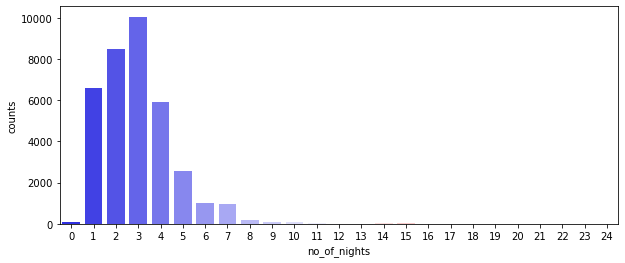

In [14]:
number_day=pd.DataFrame(hotel['no_of_nights'].value_counts()).reset_index().rename(columns={'index':'no_of_nights','no_of_nights':'counts'})
sns.barplot(data=number_day,x='no_of_nights',y='counts',palette='bwr')
plt.gcf().set_size_inches(10,4)
print(number_day)
del number_day

### The most unique trait of no_of_weekend_nights is whether a weekend night was booked at all. Otherwise, the data itself is reflected in no_of_nights.
### no_of_week_nights is pretty much completely useless to us with the inclusion of no_of_nights.
### I will add a binary column that asks whether a weekend night was booked, and drop no_of_week_nights & weekend_nights.

In [15]:
#resetting the index because we're still indexing those outlier rows we dropped.
hotel=hotel.reset_index().drop('index',axis=1)

# 0 = no weekend night booked
# 1 = weekend night booked
weekend=[]
for entry in range(36272):
    if hotel.loc[entry,'no_of_weekend_nights'] == 0:
        weekend.append(0)
    else:
        weekend.append(1)
hotel['weekend_booked?']=weekend
del weekend

hotel.drop('no_of_week_nights',axis=1,inplace=True)
hotel.drop('no_of_weekend_nights',axis=1,inplace=True)

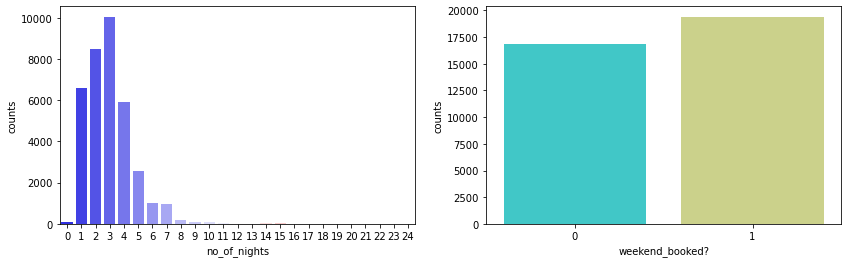

In [16]:
fig = plt.figure()

fig.add_subplot(1,2,1)
number_day=pd.DataFrame(hotel['no_of_nights'].value_counts()).reset_index().rename(columns={'index':'no_of_nights','no_of_nights':'counts'})
sns.barplot(data=number_day,x='no_of_nights',y='counts',palette='bwr')
del number_day

fig.add_subplot(1,2,2)
weekend=pd.DataFrame(hotel['weekend_booked?'].value_counts()).reset_index().rename(columns={'index':'weekend_booked?','weekend_booked?':'counts'})
sns.barplot(data=weekend,x='weekend_booked?',y='counts',palette='rainbow')
del weekend

plt.gcf().set_size_inches(14,4)

### Now we have 2 columns, one that counts the total number of nights booked, and a binary column asking whether or not a weekend night was booked.
    About half do NOT book weekend nights.
---
# 6) type_of_meal_plan
    categorical variable

Meal Plan 1     27832
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


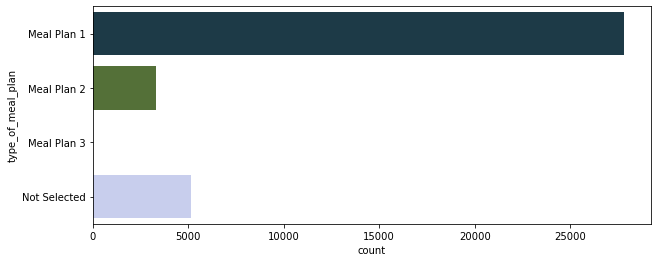

In [17]:
sns.countplot(data=hotel,y='type_of_meal_plan',palette='cubehelix')
plt.gcf().set_size_inches(10,4)
print(hotel['type_of_meal_plan'].value_counts())

### Meal plan 1 is easily the most common pick. 'Not Selected' is NOT an unknown entry, rather an entry describing guests who would rather provide their own food.
### Meal plan 3 is the most uncommon pick, only having 5 entries. Even if the dependent variable changes with this entry of meal_plan, there isn't enough data to conclusively say 'people that choose meal plan 3 consistently cancel/follow through with their booking'.
### We will drop all entries with 'meal plan 3' as the data is too scarce.

In [18]:
index=list(hotel[hotel['type_of_meal_plan']=='Meal Plan 3'].index)

hotel=hotel.drop(index)
hotel=hotel.reset_index().drop('index',axis=1)
hotel['type_of_meal_plan'].cat.remove_unused_categories(inplace=True)
hotel['type_of_meal_plan'].cat.categories

Index(['Meal Plan 1', 'Meal Plan 2', 'Not Selected'], dtype='object')

---
# 7) required_car_parking_space
    binary column

   required_car_parking_space  counts
0                           0   35144
1                           1    1123


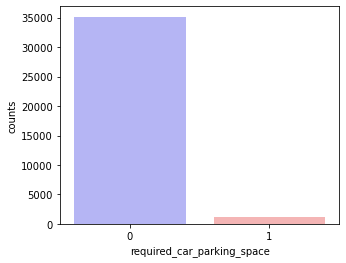

In [19]:
number_parking=pd.DataFrame(hotel['required_car_parking_space'].value_counts()).reset_index().rename(columns={'index':'required_car_parking_space','required_car_parking_space':'counts'})
sns.barplot(data=number_parking,x='required_car_parking_space',y='counts',palette='bwr')
plt.gcf().set_size_inches(5,4)
print(number_parking)
del number_parking

### Most people do not bring cars to this particular hotel.
---
# 8) room_type_reserved
    categorical variable

Room_Type 1    28128
Room_Type 4     6055
Room_Type 6      966
Room_Type 2      691
Room_Type 5      265
Room_Type 7      155
Room_Type 3        7
Name: room_type_reserved, dtype: int64


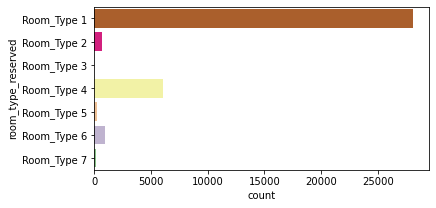

In [20]:
print(hotel['room_type_reserved'].value_counts())
sns.countplot(data=hotel,y='room_type_reserved',palette='Accent_r')
plt.gcf().set_size_inches(6,3)

### Again, the data for Room_Type 3 is very scarce; any conclusions we make of it will be moot, as there is not enough data to make a solid conclusion about those who order Room Type 3.
### We will drop this room type from the data.

In [21]:
index=list(hotel[hotel['room_type_reserved']=='Room_Type 3'].index)

hotel=hotel.drop(index)
hotel=hotel.reset_index().drop('index',axis=1)
hotel['room_type_reserved'].cat.remove_unused_categories(inplace=True)
hotel['room_type_reserved'].cat.categories

Index(['Room_Type 1', 'Room_Type 2', 'Room_Type 4', 'Room_Type 5',
       'Room_Type 6', 'Room_Type 7'],
      dtype='object')

---
# 9) lead_time
    discrete numerical data

0      1294
1      1077
2       643
3       630
4       627
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64


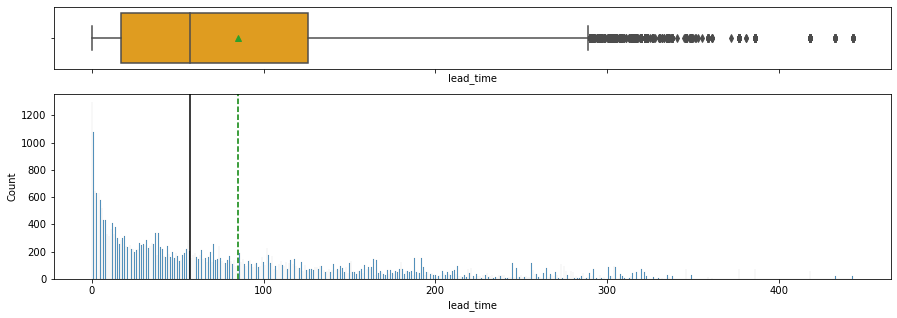

In [22]:
print(hotel['lead_time'].value_counts())
histobox(hotel,'lead_time')

In [23]:
# sum of all 'lead_time' values that only appeared once:

(hotel['lead_time'].value_counts()==1).sum()

14

In [24]:
# sum of all of the 'lead_time' values that were over 400 days:

hotel[hotel['lead_time']>=400].shape[1]

18

### Unlike some of the other columns, I don't believe (yet) that there are any values worth dropping from lead_time. There does seem to be 'outliers' according to the boxplot, but there are a decent amount of lead_times over 400 days.
    There are also far more unique values in this column, so individual values matter far less than ranges of values.
    
    For instance, I'm curious to see how often people cancel bookings when booked only a week in advance.

---
# 10) arrival year, month and date (day)
    datetime

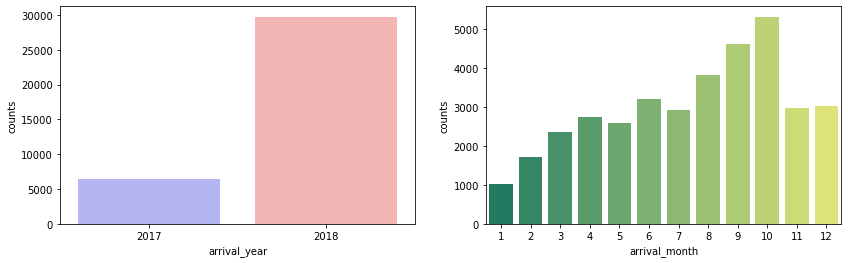

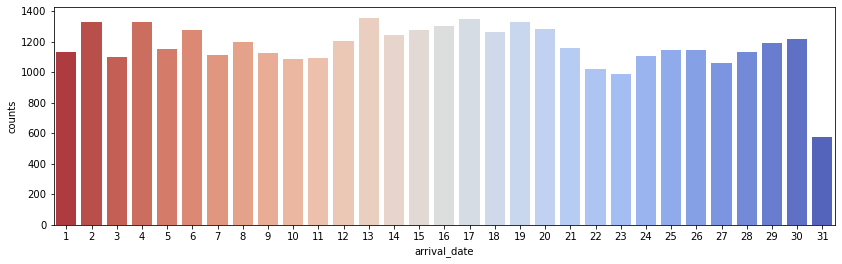

In [25]:
fig = plt.figure()

fig.add_subplot(1,2,1)
year=pd.DataFrame(hotel['arrival_year'].value_counts()).reset_index().rename(columns={'index':'arrival_year','arrival_year':'counts'})
sns.barplot(data=year,x='arrival_year',y='counts',palette='bwr')

fig.add_subplot(1,2,2)
month=pd.DataFrame(hotel['arrival_month'].value_counts()).reset_index().rename(columns={'index':'arrival_month','arrival_month':'counts'})
sns.barplot(data=month,x='arrival_month',y='counts',palette='summer')

plt.gcf().set_size_inches(14,4)
plt.show()

fig2 = plt.figure()
fig2.add_subplot(1,1,1)
day=pd.DataFrame(hotel['arrival_date'].value_counts()).reset_index().rename(columns={'index':'arrival_date','arrival_date':'counts'})
sns.barplot(data=day,x='arrival_date',y='counts',palette='coolwarm_r')
plt.gcf().set_size_inches(14,4)
plt.show()

del year
del month
del day

### Arrival year doesn't matter much at all on its own, since there are only 2 years to pick from. If there were a wider range of years, we might be able to make inferences on whether booking cancellations are becoming more common over time with the year column alone.
### All 3 of these columns seem to have a healthy amount of data for every entry. Even 31 days in arrival_date has over 600 values, despite it being the least common day number in the calendar.
### Many seem to prefer booking for arrival between August and October. Almost no one books for arrival in January, most likely due to the fact no one has spare cash after the holidays.
### Let's make a genuine datetime column out of this data. We will be able to more concretely deduce whether or not booking cancellations are increasing over time.

In [26]:
datetimelist=[]

for entry in range(36260):
    datetimelist.append(str(hotel['arrival_month'][entry])+'/'+str(hotel['arrival_date'][entry])+'/'+str(hotel['arrival_year'][entry]))
hotel['datetime']=datetimelist
(hotel['datetime']=='2/29/2018').sum()

37

### There seems to be some invalid dates in our data. 2/29/2018 is a date that literally does not exist, as the leap years were on 2016 and 2020. I will change these dates to the appropriate '3/1/2018' dates.

In [27]:
for entry in range(36260):
    if datetimelist[entry]=='2/29/2018':
        datetimelist[entry]='3/1/2018'
hotel['datetime']=datetimelist
(hotel['datetime']=='2/29/2018').sum()
del datetimelist

### Now we can change it into a datetime.

In [28]:
hotel['datetime']=pd.to_datetime(hotel['datetime'])

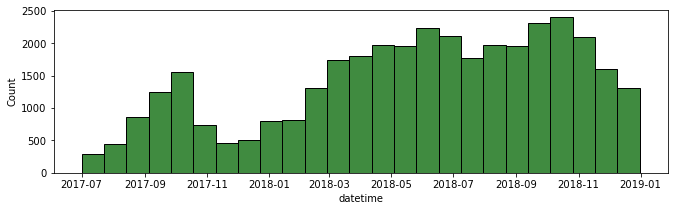

In [29]:
sns.histplot(data=hotel,x='datetime',color='darkgreen',bins=25)
plt.gcf().set_size_inches(11,3)

### I look forward to comparing this to the dependent variable.
### I will not yet be dropping any of the date columns, as we may find a trend specifically in day, month, or year.
---
# 11) market_segment_type
    categorical

Online           23210
Offline          10525
Corporate         2015
Complementary      385
Aviation           125
Name: market_segment_type, dtype: int64


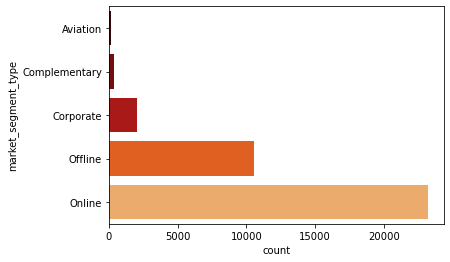

In [30]:
sns.countplot(data=hotel,y='market_segment_type',palette='gist_heat');
print(hotel['market_segment_type'].value_counts())

### No categories here have exceedingly low counts, so we will not drop any.
### Online is by far the most common market type, Aviation is by far the least common.
    I'm not sure what is meant by Aviation, but perhaps we'll get a better idea of what this entry is referring to
    in the Bivariate/Multivariate analysis. I am assuming it means hotel booking as a result of inflight advertising
    or partnerships between airlines and the hotel.
    
---
# 12) repeated_guest
    binary column

   repeated_guest  counts
0               0   35331
1               1     929


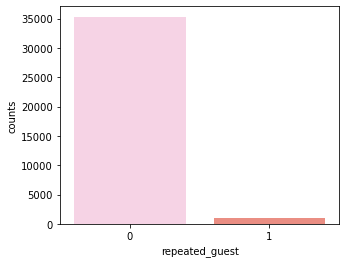

In [31]:
guest=pd.DataFrame(hotel['repeated_guest'].value_counts()).reset_index().rename(columns={'index':'repeated_guest','repeated_guest':'counts'})
sns.barplot(data=guest,x='repeated_guest',y='counts',palette='Set3_r')
plt.gcf().set_size_inches(5,4)
print(guest)
del guest

### Most guests here are not repeat guests.
---
# 13) no_of_previous_cancellations
    discrete numerical data

   no_of_previous_cancellations  counts
0                             0   35922
1                             1     198
2                             2      46
3                             3      43
4                            11      25
5                             5      11
6                             4      10
7                            13       4
8                             6       1


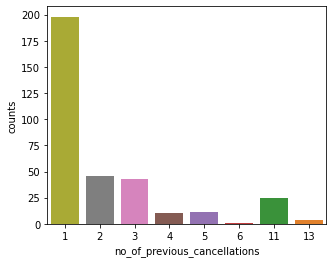

In [32]:
cancel=pd.DataFrame(hotel['no_of_previous_cancellations'].value_counts()).reset_index().rename(columns={'index':'no_of_previous_cancellations','no_of_previous_cancellations':'counts'})
sns.barplot(data=cancel.drop(0),x='no_of_previous_cancellations',y='counts',palette='tab10_r')
plt.gcf().set_size_inches(5,4)
print(cancel)
del cancel

### I purposely dropped '0 cancellations' from the barplot because the number of zero cancellations dwarfs all other categories, making the visual useless.
### While some cancellation counts like 13 and 6 have low numbers, I will not be dropping any of these. The fact that a customer cancelled at all is more important than the amount of times they cancelled.
    As we'll see next, the ratio of cancellations to total bookings also matters.
---
# 14) no_of_previous_bookings_not_canceled
    discrete numerical data

   no_of_previous_bookings_not_canceled  counts
0                                     0   35449
1                                     1     228
2                                     2     111
3                                     3      80
4                                     4      65
5                                     5      60
6                                     6      36
7                                     7      24
.
.
.
    no_of_previous_bookings_not_canceled  counts
54                                    39       1
55                                    52       1
56                                    49       1
57                                    47       1
58                                    36       1


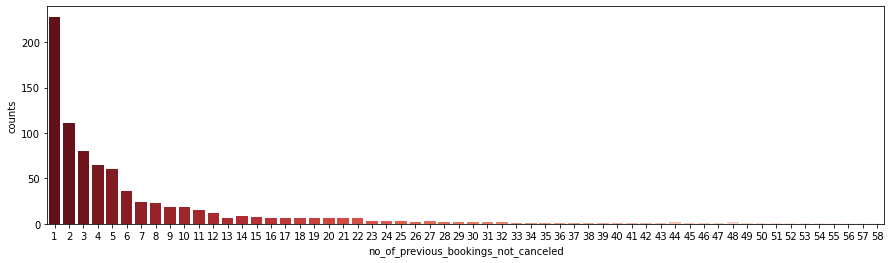

In [33]:
notcancel=pd.DataFrame(hotel['no_of_previous_bookings_not_canceled'].value_counts()).reset_index().rename(columns={'index':'no_of_previous_bookings_not_canceled','no_of_previous_bookings_not_canceled':'counts'})
sns.barplot(data=notcancel.drop(0),x='no_of_previous_bookings_not_canceled',y='counts',palette='Reds_r')
plt.gcf().set_size_inches(15,4)
print(notcancel.head(8))
print('.')
print('.')
print('.')
print(notcancel.tail(5))
del notcancel

    Plotted without zero bookings-not-cancelled as it becomes visually skewed to the point where only 0 is visible.
### This is simply a column containing all the customer's previously attended bookings at the hotel.
### This column with the cancellations data will give a good indication of how often repeat guests cancel, and whether a frequently attending guest has a lower chance of cancellation.
### Let's make a new column, no_of_previous_bookings.

In [34]:
hotel['no_of_previous_bookings']=hotel['no_of_previous_bookings_not_canceled']+hotel['no_of_previous_cancellations']

### Next, let's make a new column with the percentage of cancellations:

In [35]:
hotel['ratio_of_previous_bookings_cancelled']=hotel['no_of_previous_cancellations']/hotel['no_of_previous_bookings']
hotel['ratio_of_previous_bookings_cancelled']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
36255   NaN
36256   NaN
36257   NaN
36258   NaN
36259   NaN
Name: ratio_of_previous_bookings_cancelled, Length: 36260, dtype: float64

In [36]:
hotel['ratio_of_previous_bookings_cancelled'].value_counts(dropna=False).head()

NaN         35331
0.000000      591
1.000000      118
0.166667       16
0.200000       15
Name: ratio_of_previous_bookings_cancelled, dtype: int64

### There are a lot of NaN values, simply because there were many zero previous_bookings, we divided by zero.
### We'll replace all NaN's with 0, as they haven't cancelled any bookings in the past.

In [37]:
hotel['ratio_of_previous_bookings_cancelled']=hotel['ratio_of_previous_bookings_cancelled'].fillna(0)
hotel['ratio_of_previous_bookings_cancelled'].value_counts().head()

0.000000    35922
1.000000      118
0.166667       16
0.200000       15
0.333333       15
Name: ratio_of_previous_bookings_cancelled, dtype: int64

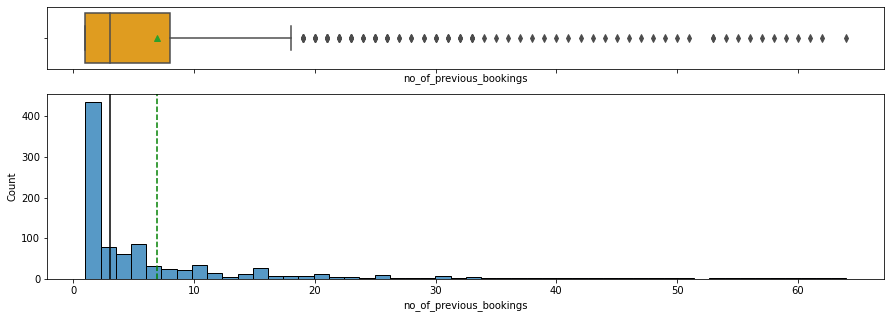

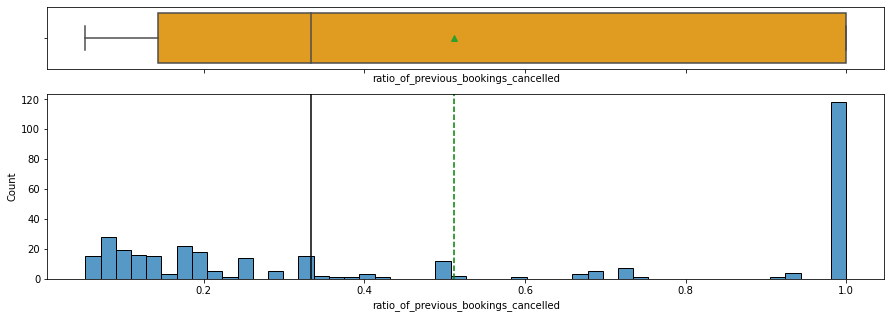

In [38]:
histobox(hotel[hotel['no_of_previous_bookings']!=0],'no_of_previous_bookings',bins=50)

histobox(hotel[hotel['ratio_of_previous_bookings_cancelled']!=0],'ratio_of_previous_bookings_cancelled',bins=50)

### Plotted above are the histograms and boxplots of the new columns (without values at zero).
### The highest ratio of cancelled bookings (besides zero cancellations) is 1.0, which is shocking.
    ratio_of_previous_bookings_cancelled also looks like it will be hard to normalize, this is a good binning candidate:
        0.0
        >0, <0.5
        >=0.5, <1.0
        1.0
### The plot of previous bookings may seem to have outliers, but like with lead_time, the outliers appear to be valid (ie: there aren't many giant gaps in the data).
### With these two new columns, we can drop both 'no_of_previous_cancellations' and 'no_of_previous_bookings_not_canceled', as all of the information of these two columns is preserved in the new ones.
    As well as preservation of info, total bookings & ratio of bookings cancelled is far easier to work with
    than uncancelled & cancelled bookings.

In [39]:
hotel=hotel.drop(['no_of_previous_cancellations','no_of_previous_bookings_not_canceled'],axis=1)

---
# 15) avg_price_per_room
    continuous variable

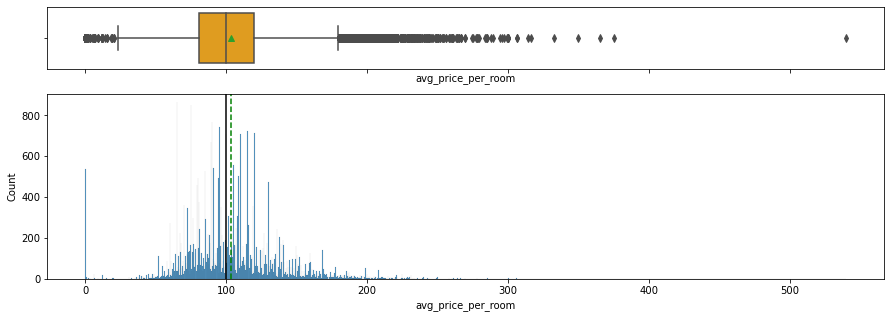

In [40]:
histobox(hotel,'avg_price_per_room')

### I immediately notice two strange things, the high amount of 0.0 cost rooms, and the very, very far outlier above 500 units.
### The plot seems normal below 200.
### Let's first investigate the high amount of free rooms.
    This is dipping into Bivariate analysis, but it's important to do this ASAP.

In [41]:
ZeroCostRooms=hotel[hotel['avg_price_per_room']==0]
print(ZeroCostRooms['market_segment_type'].value_counts(),'\n')
print(ZeroCostRooms['booking_status'].value_counts(),'\n')
print('Online guests are repeat guests:')
print(ZeroCostRooms[ZeroCostRooms['market_segment_type']=='Online']['repeated_guest'].value_counts(),'\n')
print(ZeroCostRooms['room_type_reserved'].value_counts(),'\n')

Complementary    348
Online           191
Aviation           0
Corporate          0
Offline            0
Name: market_segment_type, dtype: int64 

Not_Canceled    533
Canceled          6
Name: booking_status, dtype: int64 

Online guests are repeat guests:
0    186
1      5
Name: repeated_guest, dtype: int64 

Room_Type 1    388
Room_Type 4     56
Room_Type 7     37
Room_Type 2     25
Room_Type 5     17
Room_Type 6     16
Name: room_type_reserved, dtype: int64 



### It seems most of these free rooms are complementary, which makes sense. The 'Online' rooms are made up mostly of new guests, probably a result of online promotions as way to create repeat customers.
### Let's investigate the outlier(s):


In [42]:
hotel[hotel['avg_price_per_room']>400]

no_of_adults  no_of_children type_of_meal_plan  \
33099             2               0       Meal Plan 1   

       required_car_parking_space room_type_reserved  lead_time  arrival_year  \
33099                           0        Room_Type 1         35          2018   

       arrival_month  arrival_date market_segment_type  repeated_guest  \
33099              3            25             Offline               0   

       avg_price_per_room  no_of_special_requests booking_status  \
33099               540.0                       0       Canceled   

       no_of_nights  weekend_booked?   datetime  no_of_previous_bookings  \
33099             1                0 2018-03-25                        0   

       ratio_of_previous_bookings_cancelled  
33099                                   0.0

### The only room above a cost of 400 was cancelled. There isn't enough data for this more expensive booking to make any conclusions about it. We will drop this value.

In [43]:
index=list(hotel[hotel['avg_price_per_room']>400].index)

hotel=hotel.drop(index)
hotel=hotel.reset_index().drop('index',axis=1)

# 16) no_of_special_requests
    discrete numerical data

   no_of_special_requests  counts
0                       0   19767
1                       1   11367
2                       2    4364
3                       3     675
4                       4      78
5                       5       8


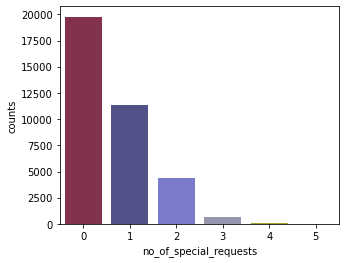

In [44]:
request=pd.DataFrame(hotel['no_of_special_requests'].value_counts()).reset_index().rename(columns={'index':'no_of_special_requests','no_of_special_requests':'counts'})
sns.barplot(data=request,x='no_of_special_requests',y='counts',palette='gist_stern')
plt.gcf().set_size_inches(5,4)
print(request)
del request

### Most customers have zero or 1 special requests. A few have 2, and very few have more.
    Another great candidate for binning:
        0
        >=1, <3
        >=3
---
# 17) booking_status
    dependent binary column

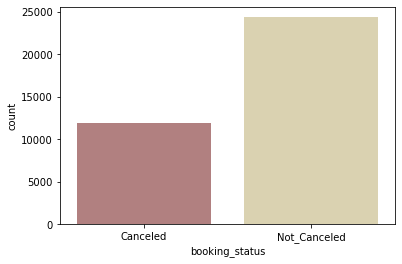

In [45]:
sns.countplot(data=hotel,x='booking_status',palette='pink');

In [46]:
hotel['booking_status'].value_counts()

Not_Canceled    24379
Canceled        11880
Name: booking_status, dtype: int64

# We need to turn this into a binary column.

In [47]:
hotel.rename(columns={'booking_status':'booking_cancelled'},inplace=True)
hotel['booking_cancelled']=hotel['booking_cancelled'].astype('O')

for entry in range(36259):
    if hotel['booking_cancelled'][entry]=='Canceled':
        hotel['booking_cancelled'][entry]=1
    else:
        hotel['booking_cancelled'][entry]=0
hotel['booking_cancelled'].value_counts()
hotel['booking_cancelled']=hotel['booking_cancelled'].astype('int64')

In [48]:
print(f"The ratio of cancelled bookings to overall bookings is {round((hotel['booking_cancelled']==1).sum()/hotel.shape[0],4)}.")

The ratio of cancelled bookings to overall bookings is 0.3276.


In [49]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36259 non-null  int64         
 1   no_of_children                        36259 non-null  int64         
 2   type_of_meal_plan                     36259 non-null  category      
 3   required_car_parking_space            36259 non-null  int64         
 4   room_type_reserved                    36259 non-null  category      
 5   lead_time                             36259 non-null  int64         
 6   arrival_year                          36259 non-null  int64         
 7   arrival_month                         36259 non-null  int64         
 8   arrival_date                          36259 non-null  int64         
 9   market_segment_type                   36259 non-null  category      
 10

---
---
---
# <span style='font-size:larger'>Bivariate Analysis!</span>

#### Looking for correlations between: ✓
✓ 1) booking_cancelled and meal_plan  
✓ 2) booking_cancelled and room_type  
✓ 3) booking_cancelled and market_segment_type  
✓ 4) booking_cancelled and # previous bookings / # cancelled  
✓ 5) booking_cancelled and special requests  
✓ 6) booking_cancelled and avg_price  
✓ 7) booking_cancelled and no_of_nights  
✓ 8) booking_cancelled and lead_time  
✓ 9) booking_cancelled and datetime   
✓ 10) booking_cancelled and arrival_month  
✓ 11) booking_cancelled and arrival_date  
✓ 12) booking_cancelled and arrival_year  
✓ 13) room_type and avg_price  
✓ 14) booking_cancelled and no_of_adults  
✓ 15) booking_cancelled and no_of_children  
✓ 16) booking_cancelled and required_car_parking_space  
✓ 17) booking_cancelled and weekend_booked?  

### Let's start with a heatmap.

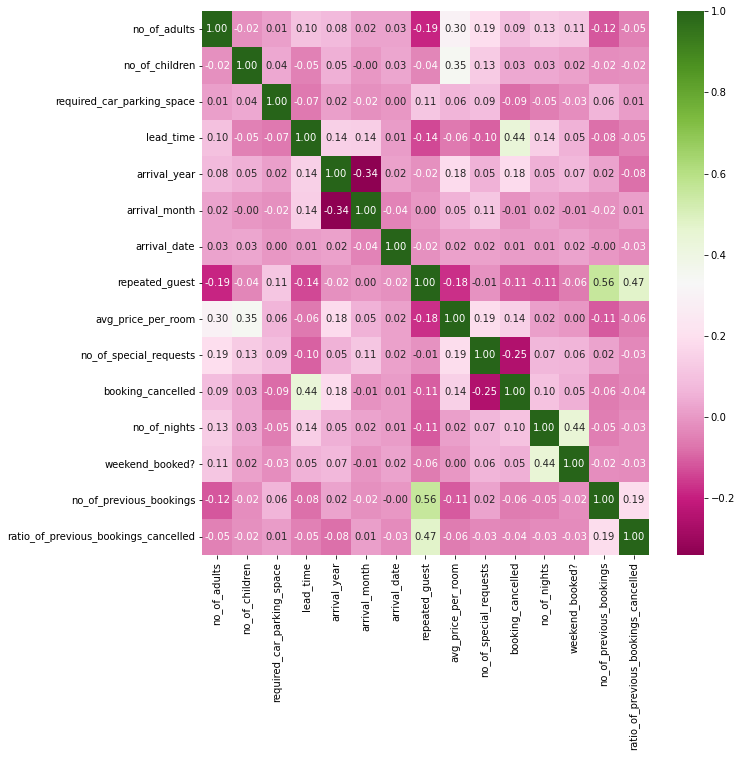

In [50]:
sns.heatmap(data=hotel.corr(),annot=True,fmt='.2f',cmap='PiYG')
plt.gcf().set_size_inches(10,10)

### booking_cancelled has strong positive correlation with lead_time, and moderate negative correlation with no_of_special_requests.
    ie: The more time between the booking date and arrival date, the more likely a cancellation will occur.
    The more special requests made by the guest, the less likely a cancellation will occur.
### There is a caveat, however; being that our dependent variable is binary, this may be a red herring in our search for actual relationships between independent variables and cancellation.
### Next, a pairplot:
    (I'm only plotting the scatterplots of the independent variables vs. the dependent variable)

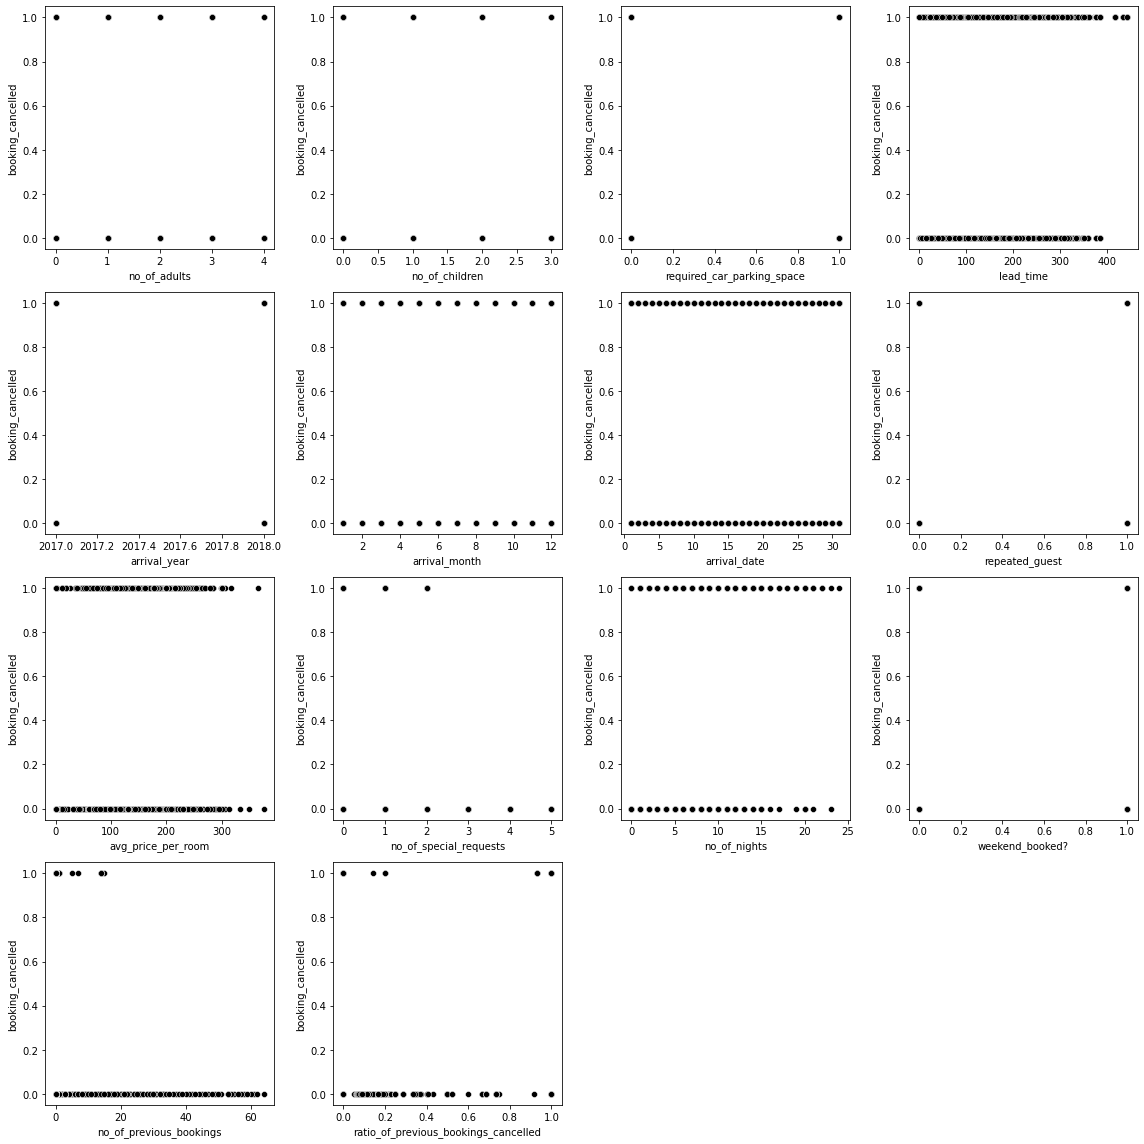

In [51]:
numerical=[]
for column in list(hotel.columns):
    if column !='booking_cancelled':
        if (hotel[column].dtype) in ['int64','float64']:
            numerical.append(column)
            
count=1
fig=plt.figure()

for column in numerical:
    
    fig.add_subplot(4,4,count)
    sns.scatterplot(data=hotel,x=column,y='booking_cancelled',color='black')
    count=count+1
    plt.gcf().set_size_inches(16,16)
    
plt.tight_layout()
del count
del numerical

### At the current moment, no_of_special_requests, no_of_previous_bookings and ratio_of_previous_bookings_cancelled seem to have good s-curve potential.
    Lead_time doesn't seem to have the same potential, even with better correlation.
    We will check lead_time in more detail later.
### Strangely, ratio_of_previous_bookings_cancelled's scatterplot seems to imply that the further you get from a 0.0 or 1.0 cancellation ratio, the more likely you are to NOT cancel.
    This implies that people who have cancelled extremely often are likely to cancel again, but it also implies that
    people who have cancelled very infrequently or have never cancelled are more likely to cancel.
        (remember, 0.0 also includes those who have never booked.)
    
    This could be because reaching a ratio of cancellation more towards the middle implies a high frequency of bookings
    (you can't get a 0.40 ratio without booking at least 5 times, and more complex ratios require even more bookings).
    
    As can be seen in the no_of_previous_bookings scatterplot, the more bookings you get, the less likely you are
    to cancel, to a point where people seemingly stop cancelling altogether after 20 previous bookings.
---
# 1) 'booking_cancelled' and 'no_of_previous_bookings'
## A quick 'no_of_previous_bookings' countplot with a hue of 'booking_cancelled':
    No zero-booking data because the plot becomes too skewed.

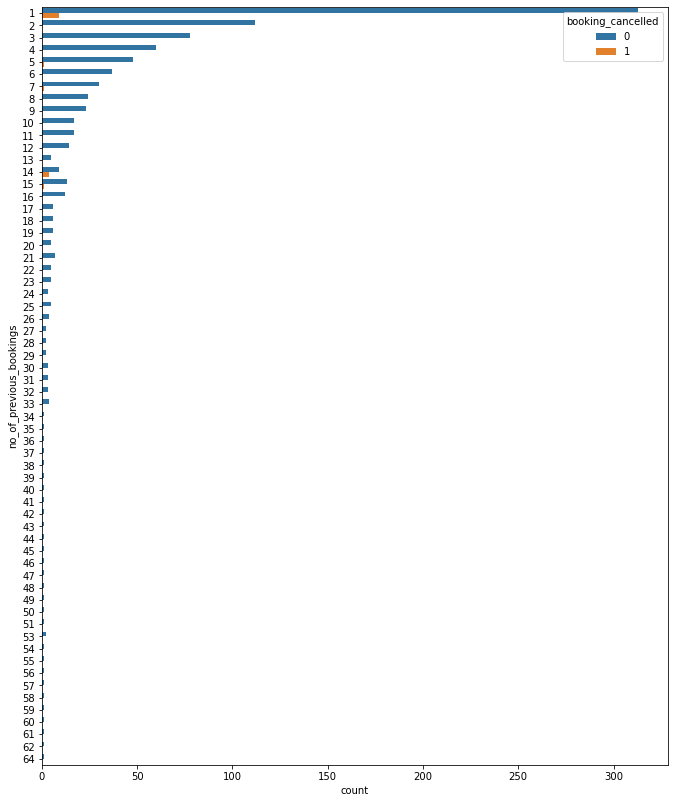

In [52]:
nozero=hotel[hotel['no_of_previous_bookings']!=0]

sns.countplot(data=nozero,y=nozero['no_of_previous_bookings'].astype('O'),hue=nozero['booking_cancelled'].astype('O'))
plt.tight_layout()
plt.gcf().set_size_inches(10,13)
del nozero

### Visually, it's hard to make out anything.
# Let's check for cancellations above 20 revisits numerically:

In [53]:
repeat=hotel[hotel['no_of_previous_bookings']>20]
repeat['booking_cancelled'].value_counts()

0    78
Name: booking_cancelled, dtype: int64

In [54]:
print(f"The amount of hotel bookings from those who revisited above 20 times and have NOT cancelled before is {(repeat['ratio_of_previous_bookings_cancelled']==0).sum()}.")

print(f"The amount of hotel bookings from those who revisited above 20 times and HAVE cancelled before is {(repeat['ratio_of_previous_bookings_cancelled']>0).sum()}.")
del repeat

The amount of hotel bookings from those who revisited above 20 times and have NOT cancelled before is 16.
The amount of hotel bookings from those who revisited above 20 times and HAVE cancelled before is 62.


### There is indeed zero current cancellations for any guests with more than 20 revisits.
### Most guests that become frequent guests also do not have a clean record, and have cancelled in the past.
    This seems to indicate that there's more to this than just stopping people who cancelled previously from booking again.
# Let's check ratios of cancellation for other groups of return customers, as well as the ratio for those who have never been to the hotel before.

In [55]:
boolean=[]
for entry in range(36259):
    boolean.append(hotel['no_of_previous_bookings'][entry] in range(10,21))
print(f"There are {hotel[boolean].shape[0]} total rooms booked by people who have visited between 10 and 20 times. \n")
print(f"The number of cancellations for rooms booked is {hotel[boolean]['booking_cancelled'].sum()}. \n")
print(f"This puts the ratio of cancellation between 10 and 20 revisits at {hotel[boolean]['booking_cancelled'].sum()/hotel[boolean].shape[0]}.")

There are 115 total rooms booked by people who have visited between 10 and 20 times. 

The number of cancellations for rooms booked is 5. 

This puts the ratio of cancellation between 10 and 20 revisits at 0.043478260869565216.


In [56]:
boolean=[]
for entry in range(36259):
    boolean.append(hotel['no_of_previous_bookings'][entry] in range(1,11))
print(f"There are {hotel[boolean].shape[0]} total rooms booked by people who have visited between 1 and 10 times. \n")
print(f"The number of cancellations for rooms booked is {hotel[boolean]['booking_cancelled'].sum()}. \n")
print(f"This puts the ratio of cancellation between 1 and 10 revisits at {hotel[boolean]['booking_cancelled'].sum()/hotel[boolean].shape[0]}.")

There are 753 total rooms booked by people who have visited between 1 and 10 times. 

The number of cancellations for rooms booked is 11. 

This puts the ratio of cancellation between 1 and 10 revisits at 0.014608233731739707.


### Between 10 and 20 visits, there are 115 rooms booked, 5 cancellations, and a cancellation rate of 0.04.
### Between 1 and 10 visits, there are 753 rooms booked, 11 cancellations, and a cancellation rate of 0.01.
    This lower rate could be explained by lack of data between 10 and 20 visits, or it could be
    indicative of the type of customer who rents room as frequently as 10 to 20 times per 2 years.
## Finally, let's check 0 previous visits:

In [57]:
boolean=[]
for entry in range(36259):
    boolean.append(hotel['no_of_previous_bookings'][entry]==0)
print(f"There are {hotel[boolean].shape[0]} total rooms booked by people who have never visited before. \n")
print(f"The number of cancellations for rooms booked is {hotel[boolean]['booking_cancelled'].sum()}. \n")
print(f"This puts the ratio of cancellation of new guests at {hotel[boolean]['booking_cancelled'].sum()/hotel[boolean].shape[0]}.")

There are 35330 total rooms booked by people who have never visited before. 

The number of cancellations for rooms booked is 11864. 

This puts the ratio of cancellation of new guests at 0.3358052646476083.


### For rooms booked by those with zero previous visits, there are 35330 rooms booked, 11864 cancellations, and a cancel rate of over 1/3.
### This is far higher than any return guest's cancellation rate.
### <span style='font-size:larger'>In conclusion:</span> according to our raw data, return guests cancel far less frequently than guests that book a room for the first time.
    Concentrating resources on ensuring guests return seems to be one very strong way to prevent cancellations.

---
# 2) booking_cancelled and special requests
    Specifically, I am going to focus on first time guests, as they seem to have the worst cancellation rates.

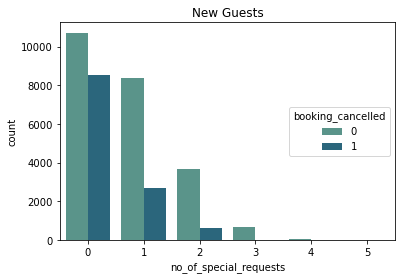

In [58]:
sns.countplot(data=hotel[boolean],x=hotel[boolean]['no_of_special_requests'].astype(
    'O'),hue='booking_cancelled',palette='crest')
plt.title('New Guests')
plt.legend(title='booking_cancelled',loc='center right');

In [59]:
bookingrequests=pd.DataFrame(hotel[boolean].groupby('booking_cancelled')['no_of_special_requests'].value_counts()).rename(columns={'no_of_special_requests':'counts'}).reset_index()

print(f"The ratio of new guests who cancel with ZERO special requests is {bookingrequests['counts'][6]/(bookingrequests['counts'][6]+bookingrequests['counts'][0])}.\n")

print(f"The ratio of new guests who cancel with ONE special request is {bookingrequests['counts'][7]/(bookingrequests['counts'][7]+bookingrequests['counts'][1])}.\n")

print(f"The ratio of new guests who cancel with TWO special requests is {bookingrequests['counts'][8]/(bookingrequests['counts'][8]+bookingrequests['counts'][2])}.\n")

print('All new guest bookings with 3 or more special requests do NOT have cancellations at all.')

The ratio of new guests who cancel with ZERO special requests is 0.44320249545100077.

The ratio of new guests who cancel with ONE special request is 0.24437008230080492.

The ratio of new guests who cancel with TWO special requests is 0.14796747967479676.

All new guest bookings with 3 or more special requests do NOT have cancellations at all.


### As you can see, the ratio of cancellations rapidly drops as special requests go up.
# Let's repeat this with returning guests to see if the same holds true.

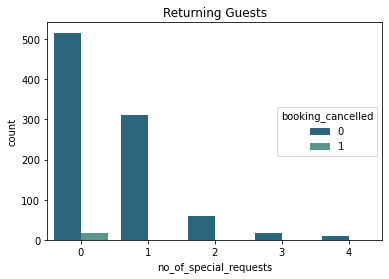

In [60]:
sns.countplot(data=hotel[np.invert(boolean)],x=hotel[np.invert(boolean)]['no_of_special_requests'].astype(
    'O'),hue='booking_cancelled',palette='crest_r')
plt.title('Returning Guests')
plt.legend(title='booking_cancelled',loc='center right');

In [61]:
bookingrequests=pd.DataFrame(hotel[np.invert(boolean)].groupby('booking_cancelled')['no_of_special_requests'].value_counts()).rename(columns={'no_of_special_requests':'counts'}).reset_index()

print(f"The ratio of returning guests who cancel with ZERO special requests is {bookingrequests['counts'][5]/(bookingrequests['counts'][5]+bookingrequests['counts'][0])}.\n")

print('All returning guest bookings with 1 or more special requests do NOT have cancellations at all.')

del bookingrequests

The ratio of returning guests who cancel with ZERO special requests is 0.03007518796992481.

All returning guest bookings with 1 or more special requests do NOT have cancellations at all.


## This seems to be a trend. As customers book with more special requests, they become less likely to cancel.
---
# 3) booking_cancelled and returning_guest
### This will be a short aside to show just how much being a new guest affects the cancellation rate.

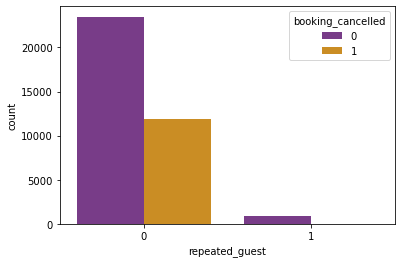

In [62]:
sns.countplot(data=hotel,x=hotel['repeated_guest'].astype('O'),hue='booking_cancelled',palette='CMRmap');

In [63]:
print(f"The ratio of New Guest Cancellation is {round(hotel[hotel['repeated_guest']==0]['booking_cancelled'].value_counts()[1]/hotel[hotel['repeated_guest']==0].shape[0],4)}.\n")
print(f"The ratio of Returning Guest Cancellation is {round(hotel[hotel['repeated_guest']==1]['booking_cancelled'].value_counts()[1]/hotel[hotel['repeated_guest']==1].shape[0],4)}.")

The ratio of New Guest Cancellation is 0.3358.

The ratio of Returning Guest Cancellation is 0.0172.


### The New Guest Cancellation rate is the same as I found in part 1) of Bivariate Analysis. 

In [64]:
hotel[hotel['no_of_previous_bookings']!=0].shape

(929, 19)

In [65]:
hotel[hotel['repeated_guest']==1].shape

(929, 19)

In [66]:
hotel[hotel['no_of_previous_bookings']!=0]['repeated_guest'].sum()

929

### As it turns out, 'repeated_guest' is simply any guest that books more than once, not an arbitrary amount of times returned like 5.

### My new 'no_of_previous_bookings' column gives the same information as the 'repeated_guest' column. I will not drop the repeated_guest column until later, however, as it makes plotting new guest vs returning guest vs booking_cancelled easier.

---
# 4) booking_cancelled and meal_plan
    For the remainder of these booking_cancelled comparisons, I will be separating the plot into
    New Guests and Returning Guests. This is due to New Guests cancelling the room 33% of the time (which
    accounts for almost ALL cancellations). I believe it is necessary to analyze the categories
    separately, to find out why new guests cancel and why returning guests cancel.

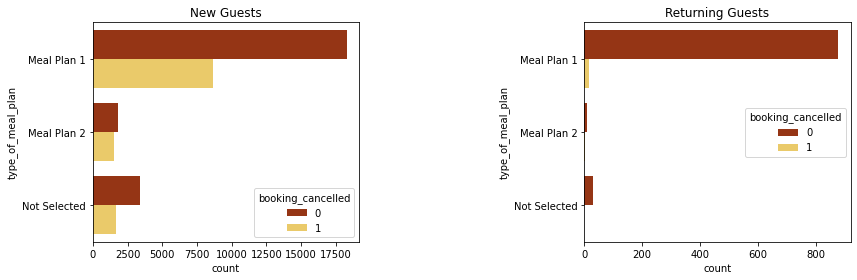

In [67]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=hotel[boolean],y='type_of_meal_plan',hue='booking_cancelled',palette='afmhot')
plt.title('New Guests')

fig.add_subplot(1,2,2)
sns.countplot(data=hotel[np.invert(boolean)],y='type_of_meal_plan',hue='booking_cancelled',palette='afmhot')
plt.title('Returning Guests')

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

In [68]:
Guestmealplan=pd.DataFrame(hotel[boolean].groupby(['type_of_meal_plan'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()
Returnmealplan=pd.DataFrame(hotel[np.invert(boolean)].groupby(['type_of_meal_plan'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()

print(f"The ratio of new guests who cancel with meal plan 1 is {round(Guestmealplan['counts'][1]/(Guestmealplan['counts'][0]+Guestmealplan['counts'][1]),4)}.")

print(f"The ratio of new guests who cancel with meal plan 2 is {round(Guestmealplan['counts'][3]/(Guestmealplan['counts'][2]+Guestmealplan['counts'][3]),4)}.")

print(f"The ratio of new guests who cancel with no meal plan is {round(Guestmealplan['counts'][5]/(Guestmealplan['counts'][4]+Guestmealplan['counts'][5]),4)}.")

print(f"The ratio of return guests who cancel with meal plan 1 is {round(Returnmealplan['counts'][1]/(Returnmealplan['counts'][0]+Returnmealplan['counts'][1]),4)}.")

print(f"The ratio of return guests who cancel with meal plan 2 is {round(Returnmealplan['counts'][3]/(Returnmealplan['counts'][2]+Returnmealplan['counts'][3]),4)}.")

print('Zero return guests cancel with no meal plan.')
del Guestmealplan
del Returnmealplan

The ratio of new guests who cancel with meal plan 1 is 0.3215.
The ratio of new guests who cancel with meal plan 2 is 0.4566.
The ratio of new guests who cancel with no meal plan is 0.3333.
The ratio of return guests who cancel with meal plan 1 is 0.0169.
The ratio of return guests who cancel with meal plan 2 is 0.1111.
Zero return guests cancel with no meal plan.


### So, the worst meal plan is meal plan 2 by a lot, for both new and return guests.
    This is of course, without meal plan 3. As discussed in univariate analysis, meal plan 3 did not have enough
    information to make good inferences, so we dropped the data.
### Return guests who do not cancel prefer either plan 1 or no plan.
---
# 5) booking_cancelled and room_type

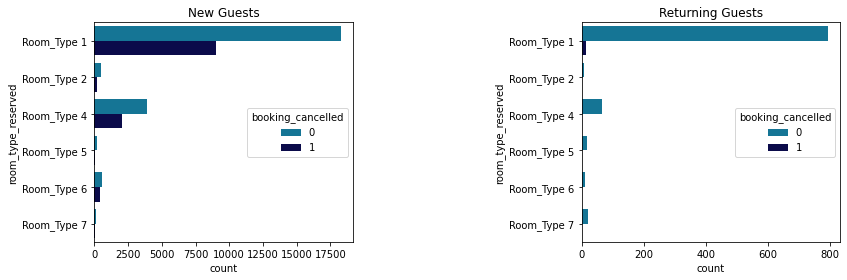

In [69]:
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=hotel[boolean],y='room_type_reserved',hue='booking_cancelled',palette='ocean_r')
plt.title('New Guests')
plt.legend(title='booking_cancelled',loc='center right')

fig.add_subplot(1,2,2)
sns.countplot(data=hotel[np.invert(boolean)],y='room_type_reserved',hue='booking_cancelled',palette='ocean_r')
plt.title('Returning Guests')
plt.legend(title='booking_cancelled',loc='center right')

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

In [70]:
Guestroomtype=pd.DataFrame(hotel[boolean].groupby(['room_type_reserved'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()
Returnroomtype=pd.DataFrame(hotel[np.invert(boolean)].groupby(['room_type_reserved'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()
print('New Guest Cancellation Rates by Room Type:')
print(f"     Room Type 1: {round(Guestroomtype['counts'][1]/(Guestroomtype['counts'][0]+Guestroomtype['counts'][1]),4)}")
print(f"     Room Type 2: {round(Guestroomtype['counts'][3]/(Guestroomtype['counts'][2]+Guestroomtype['counts'][3]),4)}")
print(f"     Room Type 4: {round(Guestroomtype['counts'][5]/(Guestroomtype['counts'][4]+Guestroomtype['counts'][5]),4)}")
print(f"     Room Type 5: {round(Guestroomtype['counts'][7]/(Guestroomtype['counts'][7]+Guestroomtype['counts'][6]),4)}")
print(f"     Room Type 6: {round(Guestroomtype['counts'][9]/(Guestroomtype['counts'][8]+Guestroomtype['counts'][9]),4)}")
print(f"     Room Type 7: {round(Guestroomtype['counts'][11]/(Guestroomtype['counts'][10]+Guestroomtype['counts'][11]),4)}\n")


print('Return Guest Cancellation Rates by Room Type:')
print(f"     Room Type 1: {round(Returnroomtype['counts'][1]/(Returnroomtype['counts'][0]+Returnroomtype['counts'][1]),4)}")
print("     Room Type 2: Zero cancellations.")
print("     Room Type 4: Zero cancellations.")
print(f"     Room Type 5: {round(Returnroomtype['counts'][5]/(Returnroomtype['counts'][5]+Returnroomtype['counts'][4]),4)}")
print("     Room Type 6: Zero cancellations.")
print("     Room Type 7: Zero cancellations.")
del Guestroomtype
del Returnroomtype

New Guest Cancellation Rates by Room Type:
     Room Type 1: 0.3315
     Room Type 2: 0.3319
     Room Type 4: 0.3455
     Room Type 5: 0.2863
     Room Type 6: 0.4247
     Room Type 7: 0.2667

Return Guest Cancellation Rates by Room Type:
     Room Type 1: 0.0186
     Room Type 2: Zero cancellations.
     Room Type 4: Zero cancellations.
     Room Type 5: 0.0588
     Room Type 6: Zero cancellations.
     Room Type 7: Zero cancellations.


### Overall, Room Type 7 has the lowest rate of cancellation.
### Room Type 6 has the most cancellations for new guests, but zero cancellations for return guests.
#### In fact, only Room Types 1 and 5 have any cancellations at all for returning guests.
### Room Type 5 and Room Type 7 are the only room types with below 0.30 cancellation rates.
## This makes me wonder what the average prices of each room type are.
---
# 6) room_type and avg_price

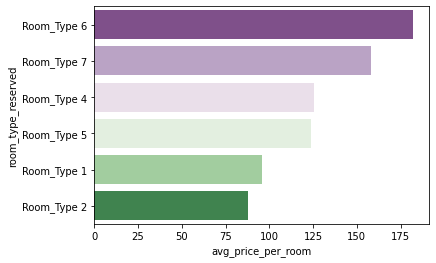

In [71]:
avgpriceperroom=hotel.groupby(['room_type_reserved'])['avg_price_per_room'].mean().reset_index()
sns.barplot(data=avgpriceperroom,x='avg_price_per_room',y='room_type_reserved',palette='PRGn',order=list(
                avgpriceperroom.sort_values('avg_price_per_room',ascending=False).room_type_reserved));
del avgpriceperroom

### I find it very curious that Room Type 6, the most cancelled new guest room, and Room Type 7, the least cancelled room, are the top two highest costing room types.
## Let's involve booking_cancelled to see if the average price of a cancelled room is higher than an uncancelled room.

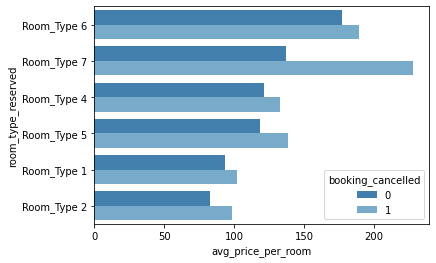

In [72]:
avgpriceroomcancel=hotel.groupby(['room_type_reserved','booking_cancelled'])['avg_price_per_room'].mean().reset_index()
sns.barplot(
    data=avgpriceroomcancel,x='avg_price_per_room',y='room_type_reserved',hue='booking_cancelled',palette='tab20c',order=avgpriceroomcancel[
        avgpriceroomcancel['booking_cancelled']==0].sort_values('avg_price_per_room',ascending=False).room_type_reserved.tolist());
del avgpriceroomcancel

### In every case, the room prices are higher in cancelled rooms than uncancelled rooms, especially in the case of Room 7.
### Once more, let's divide this plot into New guests and Repeat Guests.

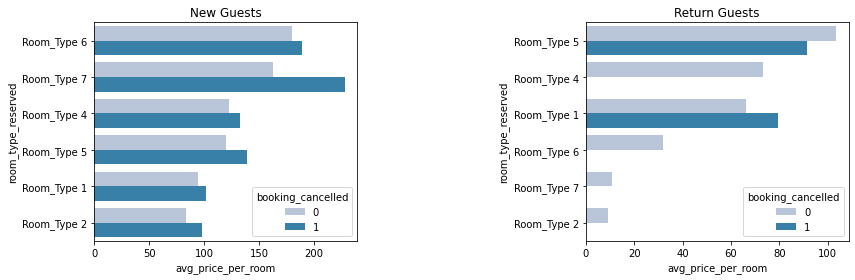

In [73]:
fig=plt.figure()

fig.add_subplot(1,2,1)
avgpriceroomcancel=hotel[boolean].groupby(['room_type_reserved','booking_cancelled'])['avg_price_per_room'].mean().reset_index()
sns.barplot(
    data=avgpriceroomcancel,x='avg_price_per_room',y='room_type_reserved',hue='booking_cancelled',palette='PuBu',order=avgpriceroomcancel[
        avgpriceroomcancel['booking_cancelled']==0].sort_values('avg_price_per_room',ascending=False).room_type_reserved.tolist());
plt.title('New Guests')
del avgpriceroomcancel

fig.add_subplot(1,2,2)
avgpriceroomcancel=hotel[np.invert(boolean)].groupby(['room_type_reserved','booking_cancelled'])['avg_price_per_room'].mean().reset_index()
sns.barplot(
    data=avgpriceroomcancel,x='avg_price_per_room',y='room_type_reserved',hue='booking_cancelled',palette='PuBu',order=avgpriceroomcancel[
        avgpriceroomcancel['booking_cancelled']==0].sort_values('avg_price_per_room',ascending=False).room_type_reserved.tolist());
plt.title('Return Guests')
del avgpriceroomcancel

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

### Interestingly, average room price doesn't seem to have as much of an effect on return guest cancellations.
## However, return guests' average room price is also much lower.

In [74]:
print(f"The average price of a return guest room is {hotel[np.invert(boolean)]['avg_price_per_room'].mean()}.")
print(f"The average price of a new guest room is {hotel[boolean]['avg_price_per_room'].mean()}.")



The average price of a return guest room is 65.66011840688914.
The average price of a new guest room is 104.42040560429913.


### This is very strange. As we saw, many complementary-online rooms were new guests, so why is the average new guest price so high?
### Let's quickly plot New Guest and Return Guest average prices.

                                                      New Guest


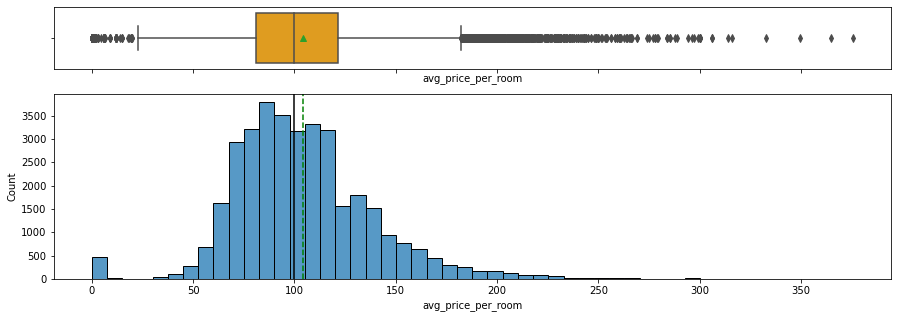

In [75]:
print('                                                      New Guest')
histobox(hotel[boolean],'avg_price_per_room',bins=50)


                                                      Return Guest


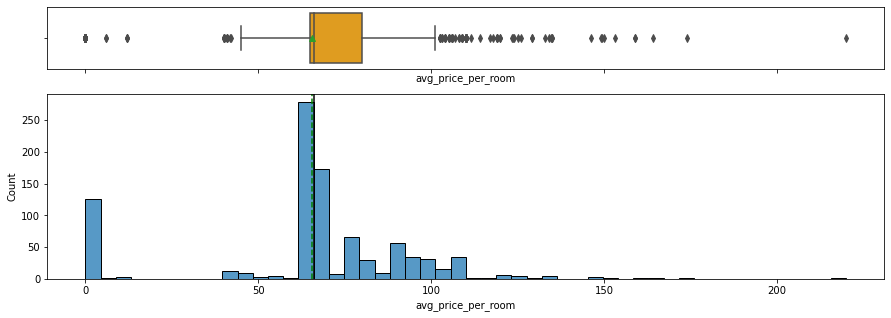

In [76]:
print('                                                      Return Guest')
histobox(hotel[np.invert(boolean)],'avg_price_per_room',bins=50)

    The plots are a little misleading at Zero cost rooms;
    There are ~500 New Guest free rooms but only ~150 Return Guest free rooms.
    The bar heights seem to indicate the opposite.
### There is an implied correlation between being a return guest and finding ways to pay less for your rooms at this specific hotel.
### Whether that be through rewards, better planning to get cheaper rooms, or discounts through a 3rd party, I'm not sure. But, if you are a return guest, you are paying much less on average than a new guest.
---
# 7) booking_cancelled and no_of_nights

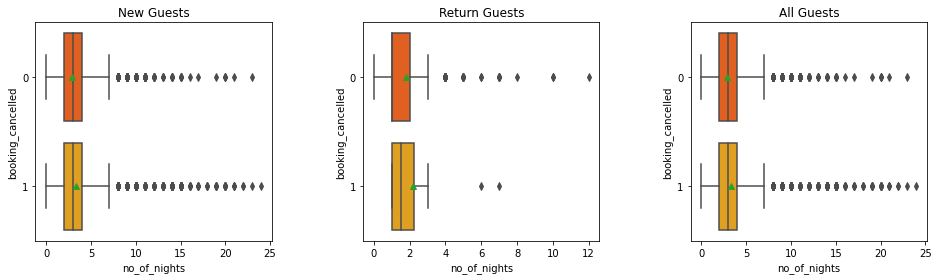

In [77]:
fig=plt.figure()

fig.add_subplot(1,3,1)
sns.boxplot(data=hotel[boolean],x='no_of_nights',y='booking_cancelled',palette='autumn',showmeans=True,orient='h')
plt.title('New Guests');

fig.add_subplot(1,3,2)
sns.boxplot(data=hotel[np.invert(boolean)],x='no_of_nights',y='booking_cancelled',palette='autumn',showmeans=True,orient='h')
plt.title('Return Guests');

fig.add_subplot(1,3,3)
sns.boxplot(data=hotel,x='no_of_nights',y='booking_cancelled',palette='autumn',showmeans=True,orient='h')
plt.title('All Guests');

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

### With number of nights, there doesn't seem to be any significant difference between New Guests and Return Guests, and there doesn't seem to be any effect on booking cancellations at all.
---
# 8) booking_cancelled and lead_time

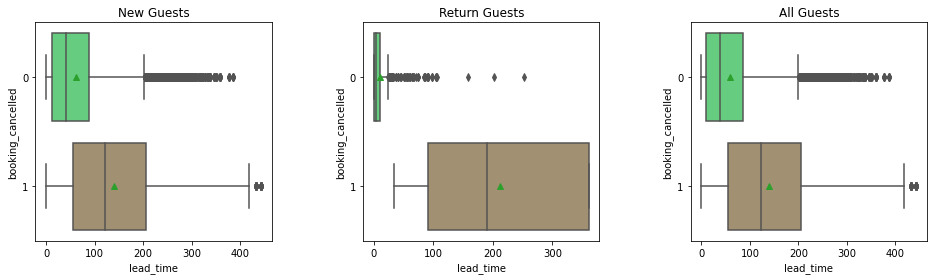

In [78]:
fig=plt.figure()

fig.add_subplot(1,3,1)
sns.boxplot(data=hotel[boolean],x='lead_time',y='booking_cancelled',palette='terrain',showmeans=True,orient='h')
plt.title('New Guests');

fig.add_subplot(1,3,2)
sns.boxplot(data=hotel[np.invert(boolean)],x='lead_time',y='booking_cancelled',palette='terrain',showmeans=True,orient='h')
plt.title('Return Guests');

fig.add_subplot(1,3,3)
sns.boxplot(data=hotel,x='lead_time',y='booking_cancelled',palette='terrain',showmeans=True,orient='h')
plt.title('All Guests');

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

### Overall, lead_time is longer for cancelled bookings.
#### Q1 through Q3 of Return Guests' cancellation plot is MUCH larger than New Guests', between 100 and 350 days.
    Q1 and Q3 for New Guests' cancellations appears to be around 50 to 200 days.
### By the raw data, Return Guests tend to honor their bookings when they place them on short notice.
### New Guests tend to honor their bookings when placed 100 days or less from the arrival date.
---
# 9) booking_cancelled and datetime 

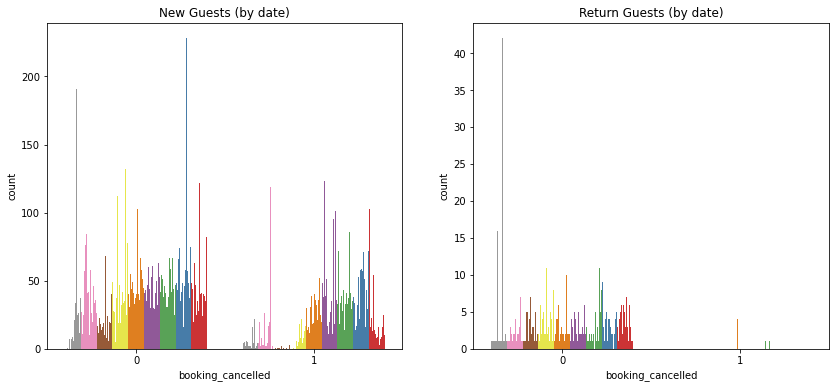

In [79]:
DatetimeOrganizedNew=hotel[boolean].sort_values('datetime',ascending=True).reset_index().drop('index',axis=1)
DatetimeOrganizedReturn=hotel[np.invert(boolean)].sort_values('datetime',ascending=True).reset_index().drop('index',axis=1)

fig= plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=DatetimeOrganizedNew,hue='datetime',x='booking_cancelled',palette='Set1_r')
plt.legend([],[],frameon=False)
plt.title('New Guests (by date)')

fig.add_subplot(1,2,2)
sns.countplot(data=DatetimeOrganizedReturn,hue='datetime',x='booking_cancelled',palette='Set1_r')
plt.legend([],[],frameon=False)
plt.title('Return Guests (by date)')

plt.gcf().set_size_inches(14,6)

del DatetimeOrganizedNew
del DatetimeOrganizedReturn

### Above are the New & Return countplots for cancelled bookings, divided into increasing datetimes.
    IE: gray data is early 2017, red data is end of 2018.
    
    Legend disabled because it is far too large.
    
    This is to get a general idea of when people cancelled, to see if cancellations are
    increasing from past to present.
### For new guests, it does appear  that as time progresses, more cancellations occur (aside from a tall blip in the pink area of the plot).
### For returning guests' cancellations, there are blips in the orange area of the plot, as well as the green area.
## Let's do the same for month, day, and year, to see if there are any trends we can find.

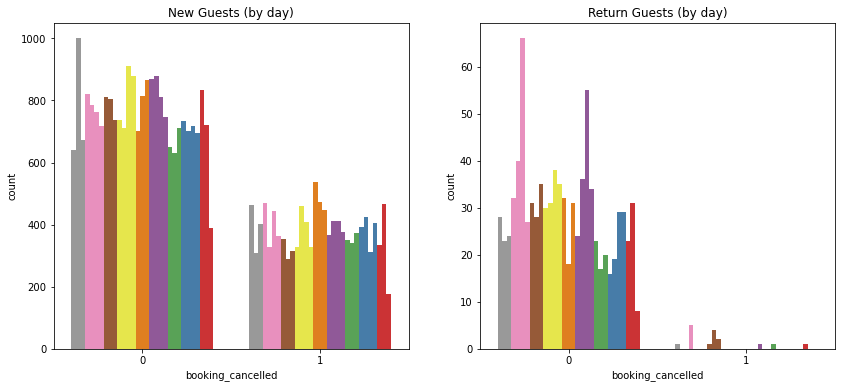

In [80]:
DatetimeOrganizedNew=hotel[boolean].sort_values('arrival_date',ascending=True).reset_index().drop('index',axis=1)
DatetimeOrganizedReturn=hotel[np.invert(boolean)].sort_values('arrival_date',ascending=True).reset_index().drop('index',axis=1)

fig= plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=DatetimeOrganizedNew,hue='arrival_date',x='booking_cancelled',palette='Set1_r')
plt.legend([],[],frameon=False)
plt.title('New Guests (by day)')

fig.add_subplot(1,2,2)
sns.countplot(data=DatetimeOrganizedReturn,hue='arrival_date',x='booking_cancelled',palette='Set1_r')
plt.legend([],[],frameon=False)
plt.title('Return Guests (by day)')

plt.gcf().set_size_inches(14,6)

del DatetimeOrganizedNew
del DatetimeOrganizedReturn

### Above are the New & Return countplots for cancelled bookings, divided into days of the month.
    ie: First Gray is the 1st of the month, Last Red is the 31st of the month.
    
    Legend disabled because it is too large.
### There really doesn't seem to be any recognizable patterns here, other than Return Guests preferring to book for arrival earlier in the month.
### Moving on to months:

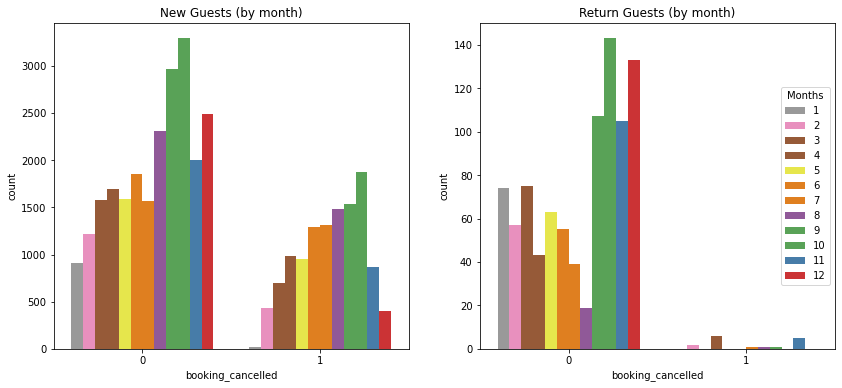

In [81]:
DatetimeOrganizedNew=hotel[boolean].sort_values('arrival_month',ascending=True).reset_index().drop('index',axis=1)
DatetimeOrganizedReturn=hotel[np.invert(boolean)].sort_values('arrival_month',ascending=True).reset_index().drop('index',axis=1)

fig= plt.figure()

fig.add_subplot(1,2,1)
sns.countplot(data=DatetimeOrganizedNew,hue='arrival_month',x='booking_cancelled',palette='Set1_r')
plt.legend([],[],frameon=False)
plt.title('New Guests (by month)')

fig.add_subplot(1,2,2)
sns.countplot(data=DatetimeOrganizedReturn,hue='arrival_month',x='booking_cancelled',palette='Set1_r')
plt.legend(loc='center right',title='Months')
plt.title('Return Guests (by month)')

plt.gcf().set_size_inches(14,6)

### Above are the New & Return countplots for cancelled bookings, divided into months of the year.
    ie: January is Gray, December is Red.
### As we saw in the univariate analysis, August through October is very active for hotel arrivals.
    However, when split by Return and New Guests, we see that Return guests very rarely book August.
    
### In terms of non-cancelled bookings:
    September and October seem to be the most active months for New Guests,
    October and December seem to be the most common months for Return Guests.
### In terms of cancelled bookings:
    August, September, and October seem to be the most active for New guests,
    Return Guests seem to cancel randomly and infrequently, November and April being the most common months to cancel.
## Seeing as this data is much more varied, I will run some numbers and find the ratios of cancellation by month.

For New Guests in Month 1, the ratio of cancellations is 0.0255863539445629.
For New Guests in Month 2, the ratio of cancellations is 0.2601823708206687.
For New Guests in Month 3, the ratio of cancellations is 0.30644454186760195.
For New Guests in Month 4, the ratio of cancellations is 0.3682055100521221.
For New Guests in Month 5, the ratio of cancellations is 0.3739644970414201.
For New Guests in Month 6, the ratio of cancellations is 0.41004450095359185.
For New Guests in Month 7, the ratio of cancellations is 0.45590277777777777.
For New Guests in Month 8, the ratio of cancellations is 0.3918776371308017.
For New Guests in Month 9, the ratio of cancellations is 0.3411816970235451.
For New Guests in Month 10, the ratio of cancellations is 0.3634429400386847.
For New Guests in Month 11, the ratio of cancellations is 0.30324154757755317.
For New Guests in Month 12, the ratio of cancellations is 0.1392931392931393.



For Return Guests in Month 1, there were 0 cancellations.
For Retu

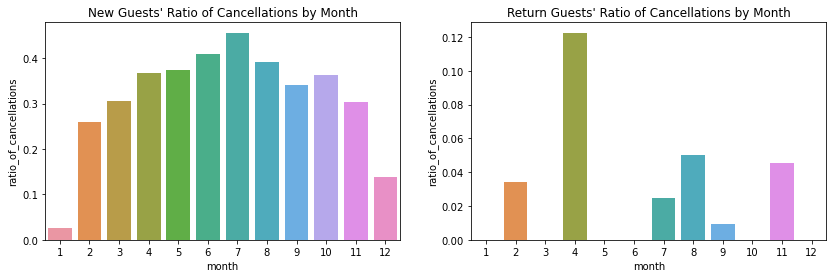

In [82]:
DatetimeOrganizedNew=pd.DataFrame(DatetimeOrganizedNew.groupby(['arrival_month'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()

cancelratio=[]
for entry in range(1,13):
    if DatetimeOrganizedNew[DatetimeOrganizedNew['arrival_month']==entry].shape[0]==2:
        ratio=DatetimeOrganizedNew[DatetimeOrganizedNew['arrival_month']==entry]['counts'].tolist()[1]/DatetimeOrganizedNew[DatetimeOrganizedNew['arrival_month']==entry]['counts'].sum()
        print(f"For New Guests in Month {entry}, the ratio of cancellations is {ratio}.")
        cancelratio.append(ratio)
    elif DatetimeOrganizedNew[DatetimeOrganizedNew['arrival_month']==entry].shape[0]==1:
        print(f"For New Guests in Month {entry}, there were 0 cancellations.")
        cancelratio.append(0)
    else:
        cancelratio.append(0)
        continue
cancelratio=pd.DataFrame(cancelratio).reset_index()
cancelratio['index']=cancelratio['index']+1
cancelratio.rename(columns={0:'ratio_of_cancellations','index':'month'},inplace=True)
        
print('\n\n')    
DatetimeOrganizedReturn=pd.DataFrame(DatetimeOrganizedReturn.groupby(['arrival_month'])['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()

cancelratioreturn=[]
for entry in range(1,13):
    if DatetimeOrganizedReturn[DatetimeOrganizedReturn['arrival_month']==entry].shape[0]==2:
        ratio=DatetimeOrganizedReturn[DatetimeOrganizedReturn['arrival_month']==entry]['counts'].tolist()[1]/DatetimeOrganizedReturn[DatetimeOrganizedReturn['arrival_month']==entry]['counts'].sum()
        print(f"For Return Guests in Month {entry}, the ratio of cancellations is {ratio}.")
        cancelratioreturn.append(ratio)
    elif DatetimeOrganizedReturn[DatetimeOrganizedReturn['arrival_month']==entry].shape[0]==1:
        print(f"For Return Guests in Month {entry}, there were 0 cancellations.")
        cancelratioreturn.append(0)
    else:
        cancelratioreturn.append(0)
        continue
cancelratioreturn=pd.DataFrame(cancelratioreturn).reset_index()
cancelratioreturn['index']=cancelratioreturn['index']+1
cancelratioreturn.rename(columns={0:'ratio_of_cancellations','index':'month'},inplace=True)

print('\n\n') 
  
fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=cancelratio,x='month',y='ratio_of_cancellations')
plt.title("New Guests' Ratio of Cancellations by Month")

fig.add_subplot(1,2,2)
sns.barplot(data=cancelratioreturn,x='month',y='ratio_of_cancellations')
plt.title("Return Guests' Ratio of Cancellations by Month")

plt.gcf().set_size_inches(14,4)

del cancelratio
del cancelratioreturn
del ratio
del DatetimeOrganizedNew
del DatetimeOrganizedReturn

### June, July, and August have the highest ratio of cancellations for New Guests.
### April has the highest ratio of cancellations for Return Guests.
### January and December have the lowest ratio of cancellations for both.
## So it seems there is at least some effect on booking_cancellations when taking the months into consideration.
## Let's try by year next.

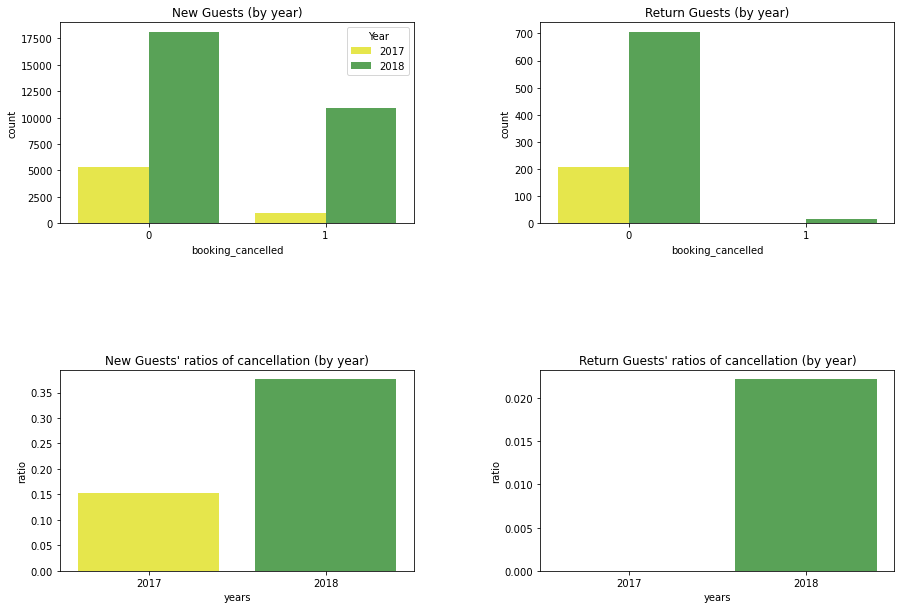

In [83]:
DatetimeOrganizedNew=hotel[boolean].sort_values('arrival_year',ascending=True).reset_index().drop('index',axis=1)
DatetimeOrganizedReturn=hotel[np.invert(boolean)].sort_values('arrival_year',ascending=True).reset_index().drop('index',axis=1)
YearratioNew=pd.DataFrame(DatetimeOrganizedNew.groupby('booking_cancelled')['arrival_year'].value_counts()).rename(columns={'arrival_year':'counts'}).reset_index().sort_values('arrival_year',ascending=True)
YearratioReturn=pd.DataFrame(DatetimeOrganizedReturn.groupby('booking_cancelled')['arrival_year'].value_counts()).rename(columns={'arrival_year':'counts'}).reset_index().sort_values('arrival_year',ascending=True)

ratiolist=[]
for entry in [2017,2018]:
    if YearratioNew[YearratioNew['arrival_year']==entry].shape[0]==2:
        ratio=YearratioNew[YearratioNew['arrival_year']==entry]['counts'].tolist()[1]/YearratioNew[YearratioNew['arrival_year']==entry]['counts'].sum()
        ratiolist.append(ratio)
    elif YearratioNew[YearratioNew['arrival_year']==entry].shape[0]==1:
        ratiolist.append(0)
    else:
        ratiolist.append(0)
cancelratio=pd.DataFrame(ratiolist)
cancelratio['years']=[2017,2018]
cancelratio.rename(columns={0:'ratio'},inplace=True)

ratiolistreturn=[]
for entry in [2017,2018]:
    if YearratioReturn[YearratioReturn['arrival_year']==entry].shape[0]==2:
        ratio=YearratioReturn[YearratioReturn['arrival_year']==entry]['counts'].tolist()[1]/YearratioReturn[YearratioReturn['arrival_year']==entry]['counts'].sum()
        ratiolistreturn.append(ratio)
    elif YearratioReturn[YearratioReturn['arrival_year']==entry].shape[0]==1:
        ratiolistreturn.append(0)
    else:
        ratiolistreturn.append(0)
cancelratioreturn=pd.DataFrame(ratiolistreturn)
cancelratioreturn['years']=[2017,2018]
cancelratioreturn.rename(columns={0:'ratio'},inplace=True)

fig= plt.figure()

fig.add_subplot(2,2,1)
sns.countplot(data=DatetimeOrganizedNew,hue='arrival_year',x='booking_cancelled',palette='Set1_r')
plt.legend(loc='upper right',title='Year')
plt.title('New Guests (by year)')

fig.add_subplot(2,2,2)
sns.countplot(data=DatetimeOrganizedReturn,hue='arrival_year',x='booking_cancelled',palette='Set1_r')
plt.title('Return Guests (by year)')
plt.legend([],[],frameon=False)

fig.add_subplot(2,2,3)
sns.barplot(data=cancelratio,y='ratio',x='years',palette='Set1_r')
plt.title("New Guests' ratios of cancellation (by year)")

fig.add_subplot(2,2,4)
sns.barplot(data=cancelratioreturn,y='ratio',x='years',palette='Set1_r')
plt.title("Return Guests' ratios of cancellation (by year)")

plt.tight_layout()
plt.gcf().set_size_inches(14,10)

del [DatetimeOrganizedNew, DatetimeOrganizedReturn, YearratioNew, YearratioReturn, ratiolist, cancelratio, ratiolistreturn, cancelratioreturn]

### As it turns out, the ratio of cancellations increases from 2017 to 2018, for both Return and New guests.
### arrival_date is the only date column that doesn't seem to have a large effect on the cancellation rate. Since month and year seem to have a larger effect overall, we will drop the day column.
    the specifics of 'daily' data are preserved in datetime anyways.

In [84]:
hotel.drop('arrival_date',axis=1,inplace=True)

## Now, we need to turn the datetime column into a purely numerical one with mapping. This is because it will be useless to us as a 'datetime' dtype, as python considers 'datetime' a category.
    We would have to make a massive amount of dummy columns if we kept it as datetime.

In [85]:
# turning datetime into a simple string for mapping.
hotel['datetime']=hotel['datetime'].astype('string')

# Mapping each ordered date to a list of numbers 1 through 549.
Map=pd.DataFrame(pd.DataFrame(hotel['datetime'].astype('string').tolist())[0].unique().tolist()).sort_values(0,ascending='True').reset_index().drop('index',axis=1).reset_index().rename(columns={0:'datetime'}).set_index('datetime')
Map['index']=Map['index']+1

# Creating a new column arrival_day, where the first date 2017-07-01 corresponds to day 1,
# and the last day 2018-12-31 corresponds to day 549.
hotel['arrival_day']=hotel['datetime'].map(Map['index'])
del Map

#dropping our old datetime column.
hotel.drop('datetime',axis=1,inplace=True)

### Very quick check to see this new column mapped with booking_cancelled.

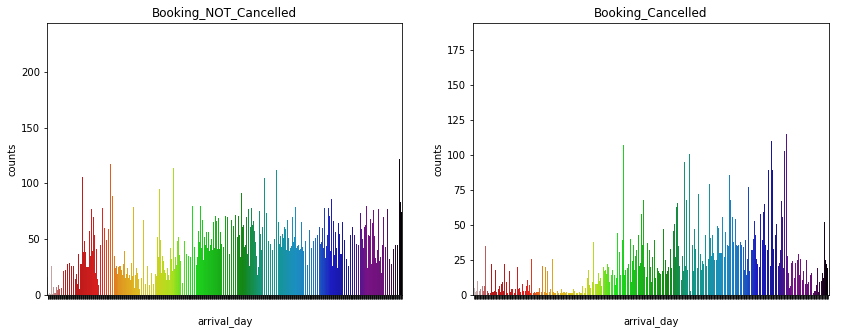

In [86]:
arrivaldaycancel=pd.DataFrame(hotel.groupby('booking_cancelled')['arrival_day'].value_counts()).rename(columns={'arrival_day':'counts'}).reset_index()


fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=arrivaldaycancel[arrivaldaycancel['booking_cancelled']==0],x='arrival_day',y='counts',palette='nipy_spectral_r')
plt.title('Booking_NOT_Cancelled')
ax = plt.gca()
plt.xticks(color='w')

fig.add_subplot(1,2,2)
sns.barplot(data=arrivaldaycancel[arrivaldaycancel['booking_cancelled']==1],x='arrival_day',y='counts',palette='nipy_spectral_r')
plt.title('Booking_Cancelled')
ax = plt.gca()
plt.xticks(color='w')

plt.gcf().set_size_inches(14,5)
del arrivaldaycancel

### Like stated before, cancellations seem to increase as time goes on.
---
# Quick mid-bivariate recap
### So far, we've added:
    no_of_nights = number of nights booked for this stay
    weekend_booked? = binary yes/no 'is a weekend day booked?'.
    no_of_previous_bookings = total amount of previous bookings
    ratio_of_previous_bookings_cancelled = self-explanatory
    arrival_day = day of booked arrival numbered from 1 to 549
### We have dropped:
    'Booking_ID'
    '9 and 10 children' from 'no_of_children' (3 entries between them)
    'no_of_week_nights'
    'no_of_weekend_nights'
    'Meal Plan 3' from 'type_of_meal_plan' (only 5 entries)
    'Room_Type 3' from 'room_type_reserved' (only 7 entries)
    'no_of_previous_cancellations'
    'no_of_previous_bookings_not_cancelled'
    'avg_price_per_room' > 400 (1 outlier at 500)
    'arrival_date'

In [87]:
hotel.info() #this is what the data looks like so far.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36259 non-null  int64   
 1   no_of_children                        36259 non-null  int64   
 2   type_of_meal_plan                     36259 non-null  category
 3   required_car_parking_space            36259 non-null  int64   
 4   room_type_reserved                    36259 non-null  category
 5   lead_time                             36259 non-null  int64   
 6   arrival_year                          36259 non-null  int64   
 7   arrival_month                         36259 non-null  int64   
 8   market_segment_type                   36259 non-null  category
 9   repeated_guest                        36259 non-null  int64   
 10  avg_price_per_room                    36259 non-null  float64 
 11  no

---
# 10) booking_cancelled and no_of_adults & no_of_children

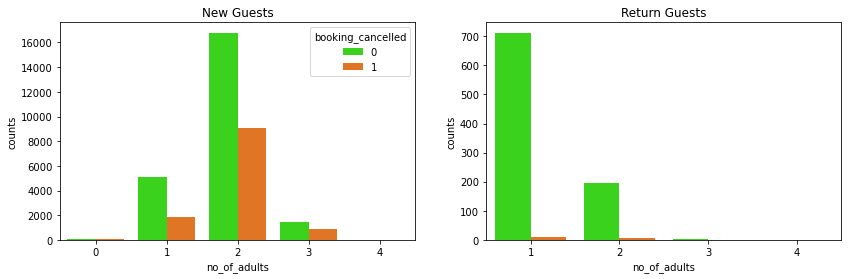

In [88]:
booking_adult_new=pd.DataFrame(hotel[boolean].groupby('no_of_adults')['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()
booking_adult_return=pd.DataFrame(hotel[np.invert(boolean)].groupby('no_of_adults')['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=booking_adult_new,x='no_of_adults',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.title('New Guests')

fig.add_subplot(1,2,2)
sns.barplot(data=booking_adult_return,x='no_of_adults',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.legend([],[],frameon=False)
plt.title('Return Guests')

plt.gcf().set_size_inches(14,4)


## There are a few 0 adult bookings, which is strange. This can also be seen in univariate analysis, but I'll check to see if there are children-only rooms:

In [89]:
hotel[hotel['no_of_adults']==0]['no_of_children'].value_counts()

2    133
3      5
1      1
Name: no_of_children, dtype: int64

### There are quite a few (139) bookings where only children reside in the room. This could be due to class trips or older teens.
## Let's check the ratios for each number of adults.

For New Guests with 0 adults, the ratio of cancellations is: 0.3165
For New Guests with 1 adults, the ratio of cancellations is: 0.265
For New Guests with 2 adults, the ratio of cancellations is: 0.3517
For New Guests with 3 adults, the ratio of cancellations is: 0.3729
For New Guests with 4 adults, the ratio of cancellations is: 0.2



There are no Returning Guests with 0 adults.
For Returning Guests with 1 adults, the ratio of cancellations is: 0.0125
For Returning Guests with 2 adults, the ratio of cancellations is: 0.0343
For Returning Guests with 3 adults, the ratio of cancellations is: 0
For Returning Guests with 4 adults, the ratio of cancellations is: 0


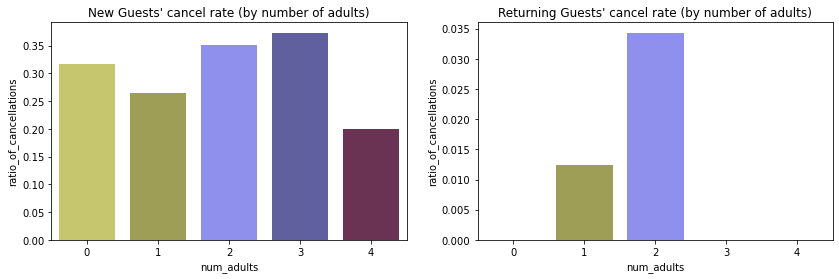

In [90]:
cancelratio=[]

for entry in range(0,5):
    if booking_adult_new[booking_adult_new['no_of_adults']==entry].shape[0]==2:
        ratio=booking_adult_new[booking_adult_new['no_of_adults']==entry]['counts'].tolist()[1]/booking_adult_new[booking_adult_new['no_of_adults']==entry]['counts'].sum()
        print(f"For New Guests with {entry} adults, the ratio of cancellations is: {round(ratio,4)}")
        cancelratio.append(ratio)
    elif booking_adult_new[booking_adult_new['no_of_adults']==entry].shape[0]==1:
        print(f"For New Guests with {entry} adults, the ratio of cancellations is: {0}")
        cancelratio.append(0)
    else:
        cancelratio.append(0)
        continue
        
cancelratio=pd.DataFrame(cancelratio).reset_index().rename(columns={'index':'num_adults',0:'ratio_of_cancellations'})

print('\n\n')
cancelratioreturn=[]

for entry in range(0,5):
    if booking_adult_return[booking_adult_return['no_of_adults']==entry].shape[0]==2:
        ratio=booking_adult_return[booking_adult_return['no_of_adults']==entry]['counts'].tolist()[1]/booking_adult_return[booking_adult_return['no_of_adults']==entry]['counts'].sum()
        print(f"For Returning Guests with {entry} adults, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
    elif booking_adult_return[booking_adult_return['no_of_adults']==entry].shape[0]==1:
        print(f"For Returning Guests with {entry} adults, the ratio of cancellations is: {0}")
        cancelratioreturn.append(0)
    else:
        print(f"There are no Returning Guests with {entry} adults.")
        cancelratioreturn.append(0)
        continue
        
cancelratioreturn=pd.DataFrame(cancelratioreturn).reset_index().rename(columns={'index':'num_adults',0:'ratio_of_cancellations'})

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=cancelratio,x='num_adults',y='ratio_of_cancellations',palette='gist_stern_r')
plt.title("New Guests' cancel rate (by number of adults)")

fig.add_subplot(1,2,2)
sns.barplot(data=cancelratioreturn,x='num_adults',y='ratio_of_cancellations',palette='gist_stern_r')
plt.title("Returning Guests' cancel rate (by number of adults)")

plt.gcf().set_size_inches(14,4)
del [booking_adult_new, booking_adult_return, cancelratio, cancelratioreturn]

### There is not a traditionally recognizable pattern with New Guests. 4 New Guest rooms have the lowest rate of cancellation, 3 New Guest rooms have the highest.
### All Returning Guest cancellations come from 1 or 2 adults. No Returning Guests are children.

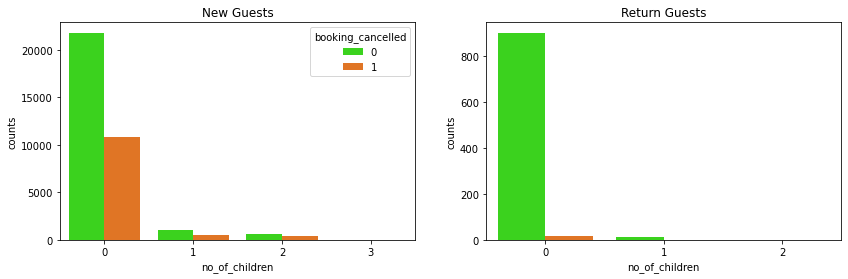

In [91]:
booking_child_new=pd.DataFrame(hotel[boolean].groupby('no_of_children')['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()
booking_child_return=pd.DataFrame(hotel[np.invert(boolean)].groupby('no_of_children')['booking_cancelled'].value_counts()).rename(columns={'booking_cancelled':'counts'}).reset_index()

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=booking_child_new,x='no_of_children',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.title('New Guests')

fig.add_subplot(1,2,2)
sns.barplot(data=booking_child_return,x='no_of_children',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.legend([],[],frameon=False)
plt.title('Return Guests')

plt.gcf().set_size_inches(14,4)


### Let's plot the ratios of booking_cancellations by no_of_children.

For New Guests with 0 children, the ratio of cancellations is: 0.3327
For New Guests with 1 children, the ratio of cancellations is: 0.3362
For New Guests with 2 children, the ratio of cancellations is: 0.4324
For New Guests with 3 children, the ratio of cancellations is: 0.2632



For Returning Guests with 0 children, the ratio of cancellations is: 0.0175
For Returning Guests with 1 children, the ratio of cancellations is: 0
For Returning Guests with 2 children, the ratio of cancellations is: 0
There are no Returning Guests with 3 children.


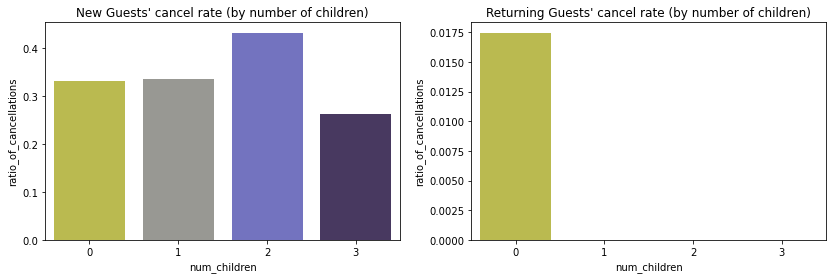

In [92]:
cancelratio=[]

for entry in range(0,4):
    if booking_child_new[booking_child_new['no_of_children']==entry].shape[0]==2:
        ratio=booking_child_new[booking_child_new['no_of_children']==entry]['counts'].tolist()[1]/booking_child_new[booking_child_new['no_of_children']==entry]['counts'].sum()
        print(f"For New Guests with {entry} children, the ratio of cancellations is: {round(ratio,4)}")
        cancelratio.append(ratio)
    elif booking_child_new[booking_child_new['no_of_children']==entry].shape[0]==1:
        print(f"For New Guests with {entry} children, the ratio of cancellations is: {0}")
        cancelratio.append(0)
    else:
        cancelratio.append(0)
        continue
        
cancelratio=pd.DataFrame(cancelratio).reset_index().rename(columns={'index':'num_children',0:'ratio_of_cancellations'})

print('\n\n')
cancelratioreturn=[]

for entry in range(0,4):
    if booking_child_return[booking_child_return['no_of_children']==entry].shape[0]==2:
        ratio=booking_child_return[booking_child_return['no_of_children']==entry]['counts'].tolist()[1]/booking_child_return[booking_child_return['no_of_children']==entry]['counts'].sum()
        print(f"For Returning Guests with {entry} children, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
    elif booking_child_return[booking_child_return['no_of_children']==entry].shape[0]==1:
        print(f"For Returning Guests with {entry} children, the ratio of cancellations is: {0}")
        cancelratioreturn.append(0)
    else:
        print(f"There are no Returning Guests with {entry} children.")
        cancelratioreturn.append(0)
        continue
        
cancelratioreturn=pd.DataFrame(cancelratioreturn).reset_index().rename(columns={'index':'num_children',0:'ratio_of_cancellations'})

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=cancelratio,x='num_children',y='ratio_of_cancellations',palette='gist_stern_r')
plt.title("New Guests' cancel rate (by number of children)")

fig.add_subplot(1,2,2)
sns.barplot(data=cancelratioreturn,x='num_children',y='ratio_of_cancellations',palette='gist_stern_r')
plt.title("Returning Guests' cancel rate (by number of children)")

plt.gcf().set_size_inches(14,4)
del [booking_child_new, booking_child_return, cancelratio, cancelratioreturn]

### The lowest cancellation rate for New Guests is with 3 children.
### The only cancellations by Return Guests are those with 0 children.
    There are very few Return Guests that bring children at all, however.
## Overall, number of adults and number of children seem to have only a small, random impact on cancellations, and there are no obvious trends.
---
# 11) booking_cancelled and required_car_parking_space


For New Guests with no car, the ratio of cancellations is: 0.3421
For New Guests with a car, the ratio of cancellations is: 0.1159


For Returning Guests with no car, the ratio of cancellations is: 0.0203
For Returning Guests with a car, the ratio of cancellations is: 0


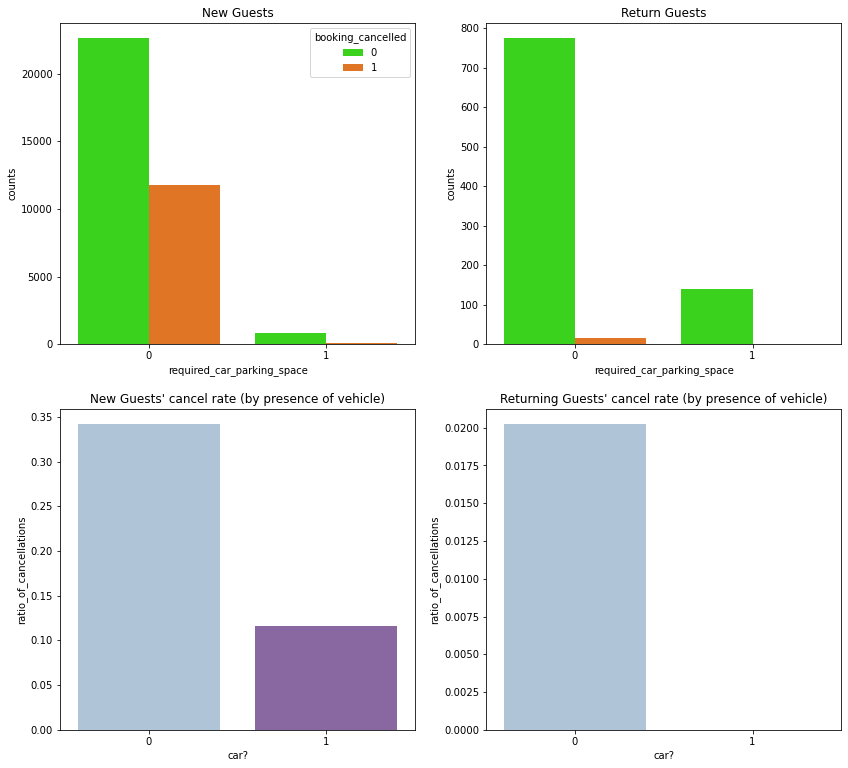

In [93]:
booking_parking_new=pd.DataFrame(hotel[boolean].groupby('booking_cancelled')['required_car_parking_space'].value_counts()).rename(columns={'required_car_parking_space':'counts'}).reset_index()
booking_parking_return=pd.DataFrame(hotel[np.invert(boolean)].groupby('booking_cancelled')['required_car_parking_space'].value_counts()).rename(columns={'required_car_parking_space':'counts'}).reset_index()
cancelratio=[]
cancelratioreturn=[]

for entry in range(0,2):
    if booking_parking_new[booking_parking_new['required_car_parking_space']==entry].shape[0]==2:
        ratio=booking_parking_new[booking_parking_new['required_car_parking_space']==entry]['counts'].tolist()[1]/booking_parking_new[booking_parking_new['required_car_parking_space']==entry]['counts'].sum()
        if entry ==1:
            print(f"For New Guests with a car, the ratio of cancellations is: {round(ratio,4)}")
        else:
            print(f"For New Guests with no car, the ratio of cancellations is: {round(ratio,4)}")
        cancelratio.append(ratio)
    elif booking_parking_new[booking_parking_new['required_car_parking_space']==entry].shape[0]==1:
        if entry ==1:
            print(f"For New Guests with a car, the ratio of cancellations is: {0}")
        else:
            print(f"For New Guests with no car, the ratio of cancellations is: {0}")
        cancelratio.append(0)
    else:
        if entry ==1:
            print("There are no New Guests with a car.")
        else:
            print("There are no New Guests with no car.")
        cancelratio.append(0)
        continue
        
cancelratio=pd.DataFrame(cancelratio).reset_index().rename(columns={'index':'car?',0:'ratio_of_cancellations'})

print('\n')

for entry in range(0,2):
    if booking_parking_return[booking_parking_return['required_car_parking_space']==entry].shape[0]==2:
        ratio=booking_parking_return[booking_parking_return['required_car_parking_space']==entry]['counts'].tolist()[1]/booking_parking_return[booking_parking_return['required_car_parking_space']==entry]['counts'].sum()
        if entry ==1:
            print(f"For Returning Guests with a car, the ratio of cancellations is: {round(ratio,4)}")
        else:
            print(f"For Returning Guests with no car, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
    elif booking_parking_return[booking_parking_return['required_car_parking_space']==entry].shape[0]==1:
        if entry ==1:
            print(f"For Returning Guests with a car, the ratio of cancellations is: {0}")
        else:
            print(f"For Returning Guests with no car, the ratio of cancellations is: {0}")
        cancelratioreturn.append(0)
    else:
        if entry ==1:
            print("There are no Returning Guests with a car.")
        else:
            print("There are no Returning Guests with no car.")
        cancelratioreturn.append(0)
        continue
        
cancelratioreturn=pd.DataFrame(cancelratioreturn).reset_index().rename(columns={'index':'car?',0:'ratio_of_cancellations'})

fig=plt.figure()

fig.add_subplot(2,2,1)
sns.barplot(data=booking_parking_new,x='required_car_parking_space',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.title('New Guests')

fig.add_subplot(2,2,2)
sns.barplot(data=booking_parking_return,x='required_car_parking_space',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.legend([],[],frameon=False)
plt.title('Return Guests')

fig.add_subplot(2,2,3)
sns.barplot(data=cancelratio,x='car?',y='ratio_of_cancellations',palette='BuPu')
plt.title("New Guests' cancel rate (by presence of vehicle)")

fig.add_subplot(2,2,4)
sns.barplot(data=cancelratioreturn,x='car?',y='ratio_of_cancellations',palette='BuPu')
plt.title("Returning Guests' cancel rate (by presence of vehicle)")


plt.gcf().set_size_inches(14,13)

del [booking_parking_new, booking_parking_return, cancelratio, cancelratioreturn]

### Across the board, guests who want to bring a car and require a parking space cancel much less often.
#### Returning Guests who need a parking space NEVER cancel.
---
# 12) booking_cancelled and weekend_booked?

For New Guests who did not book the weekend, the ratio of cancellations is: 0.3127
For New Guests who booked the weekend, the ratio of cancellations is: 0.3555


For Returning Guests who did not book the weekend, the ratio of cancellations is: 0.0116
For Returning Guests who booked the weekend, the ratio of cancellations is: 0.0278


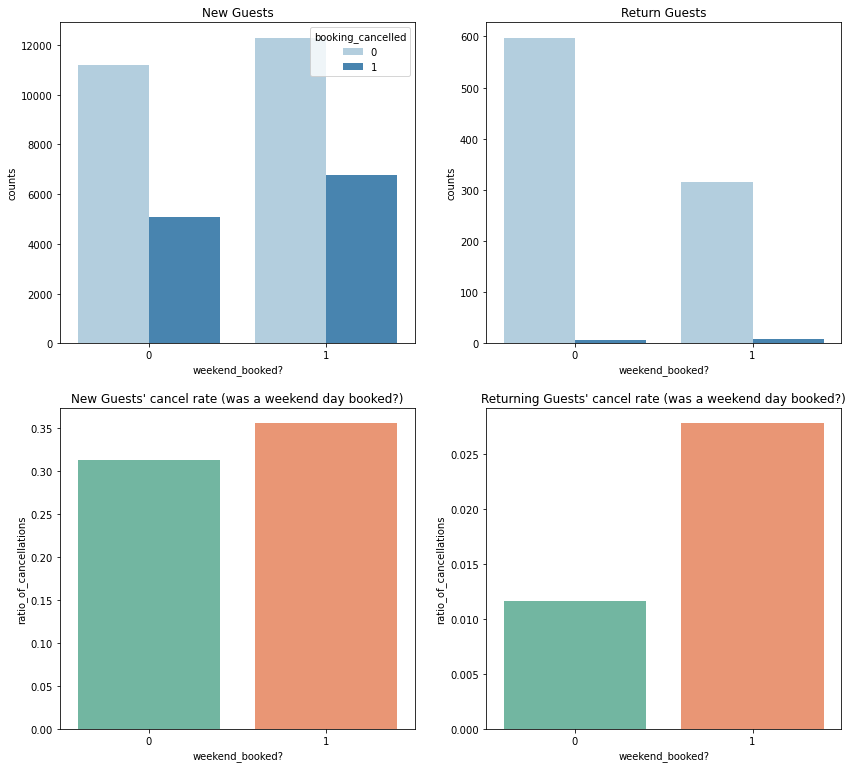

In [94]:
booking_weekend_new=pd.DataFrame(hotel[boolean].groupby('booking_cancelled')['weekend_booked?'].value_counts()).rename(columns={'weekend_booked?':'counts'}).reset_index()
booking_weekend_return=pd.DataFrame(hotel[np.invert(boolean)].groupby('booking_cancelled')['weekend_booked?'].value_counts()).rename(columns={'weekend_booked?':'counts'}).reset_index()
cancelratio=[]
cancelratioreturn=[]

for entry in range(0,2):
    if booking_weekend_new[booking_weekend_new['weekend_booked?']==entry].shape[0]==2:
        ratio=booking_weekend_new[booking_weekend_new['weekend_booked?']==entry]['counts'].tolist()[1]/booking_weekend_new[booking_weekend_new['weekend_booked?']==entry]['counts'].sum()
        if entry ==1:
            print(f"For New Guests who booked the weekend, the ratio of cancellations is: {round(ratio,4)}")
        else:
            print(f"For New Guests who did not book the weekend, the ratio of cancellations is: {round(ratio,4)}")
        cancelratio.append(ratio)
    elif booking_weekend_new[booking_weekend_new['weekend_booked?']==entry].shape[0]==1:
        if entry ==1:
            print(f"For New Guests who booked the weekend, the ratio of cancellations is: {0}")
        else:
            print(f"For New Guests who did not book the weekend, the ratio of cancellations is: {0}")
        cancelratio.append(0)
    else:
        if entry ==1:
            print("There are no New Guests who booked the weekend.")
        else:
            print("There are no New Guests who did not book the weekend.")
        cancelratio.append(0)
        continue
        
cancelratio=pd.DataFrame(cancelratio).reset_index().rename(columns={'index':'weekend_booked?',0:'ratio_of_cancellations'})

print('\n')

for entry in range(0,2):
    if booking_weekend_return[booking_weekend_return['weekend_booked?']==entry].shape[0]==2:
        ratio=booking_weekend_return[booking_weekend_return['weekend_booked?']==entry]['counts'].tolist()[1]/booking_weekend_return[booking_weekend_return['weekend_booked?']==entry]['counts'].sum()
        if entry ==1:
            print(f"For Returning Guests who booked the weekend, the ratio of cancellations is: {round(ratio,4)}")
        else:
            print(f"For Returning Guests who did not book the weekend, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
    elif booking_weekend_return[booking_weekend_return['weekend_booked?']==entry].shape[0]==1:
        if entry ==1:
            print(f"For Returning Guests who booked the weekend, the ratio of cancellations is: {0}")
        else:
            print(f"For Returning Guests who did not book the weekend, the ratio of cancellations is: {0}")
        cancelratioreturn.append(0)
    else:
        if entry ==1:
            print("There are no Returning Guests who booked the weekend.")
        else:
            print("There are no Returning Guests who did not book the weekend.")
        cancelratioreturn.append(0)
        continue
        
cancelratioreturn=pd.DataFrame(cancelratioreturn).reset_index().rename(columns={'index':'weekend_booked?',0:'ratio_of_cancellations'})

fig=plt.figure()

fig.add_subplot(2,2,1)
sns.barplot(data=booking_weekend_new,x='weekend_booked?',y='counts',hue='booking_cancelled',palette='Blues')
plt.title('New Guests')

fig.add_subplot(2,2,2)
sns.barplot(data=booking_weekend_return,x='weekend_booked?',y='counts',hue='booking_cancelled',palette='Blues')
plt.legend([],[],frameon=False)
plt.title('Return Guests')

fig.add_subplot(2,2,3)
sns.barplot(data=cancelratio,x='weekend_booked?',y='ratio_of_cancellations',palette='Set2')
plt.title("New Guests' cancel rate (was a weekend day booked?)")

fig.add_subplot(2,2,4)
sns.barplot(data=cancelratioreturn,x='weekend_booked?',y='ratio_of_cancellations',palette='Set2')
plt.title("Returning Guests' cancel rate (was a weekend day booked?)")


plt.gcf().set_size_inches(14,13)

del [booking_weekend_new, booking_weekend_return, cancelratio, cancelratioreturn]

### Weekends do not seem to have much of an effect on cancellations.
### However, Returning Guests are an exception. Return Guests who book a weekend day cancel twice as often.
    The difference in actual percentage is like 1.6%, though, so even if it is a
    large relative increase, it's still not as often as New Guests cancel.
---
# 13) booking_cancelled and market_segment_type

For New Guests who booked from the Online market, the ratio of cancellations is: 0.3662
For New Guests who booked from the Offline market, the ratio of cancellations is: 0.3014
For New Guests who booked from the Corporate market, the ratio of cancellations is: 0.1536
For New Guests who booked from the Complementary market, the ratio of cancellations is: 0.0
For New Guests who booked from the Aviation market, the ratio of cancellations is: 0.3394



For New Guests who booked from the Corporate market, the ratio of cancellations is: 0.005
For New Guests who booked from the Complementary market, the ratio of cancellations is: 0.0
For New Guests who booked from the Online market, the ratio of cancellations is: 0.0729
For New Guests who booked from the Offline market, the ratio of cancellations is: 0.0667
For New Guests who booked from the Aviation market, the ratio of cancellations is: 0.0


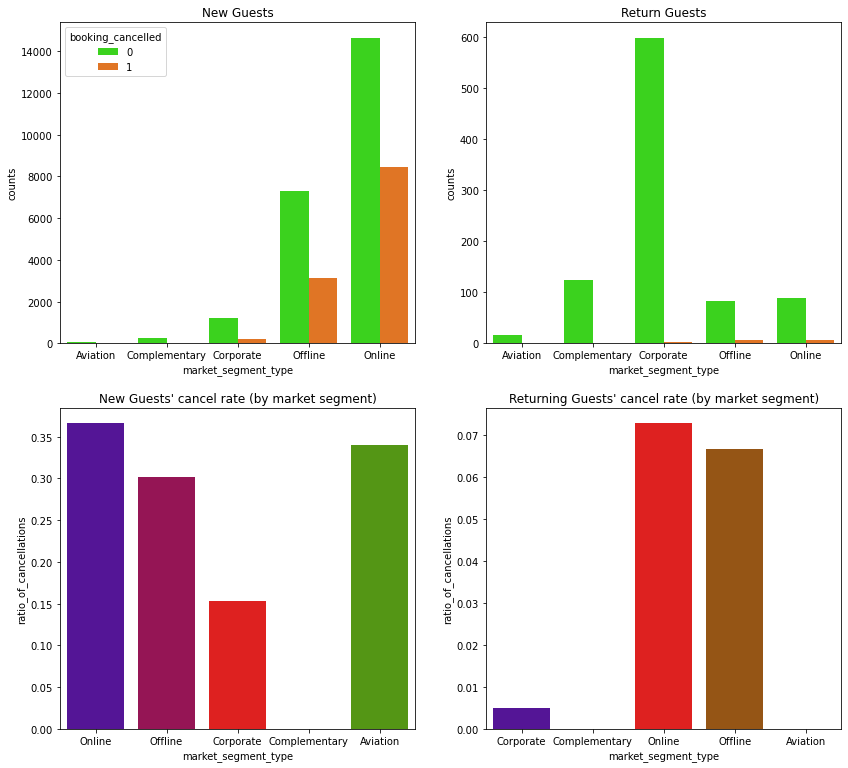

In [95]:
booking_market_new=pd.DataFrame(hotel[boolean].groupby('booking_cancelled')['market_segment_type'].value_counts()).reset_index().rename(columns={'market_segment_type':'counts','level_1':'market_segment_type'})
booking_market_return=pd.DataFrame(hotel[np.invert(boolean)].groupby('booking_cancelled')['market_segment_type'].value_counts()).reset_index().rename(columns={'market_segment_type':'counts','level_1':'market_segment_type'})
cancelratio=[]
cancelratioreturn=[]
marketlist=[]

for entry in booking_market_new['market_segment_type'].unique().tolist():
    marketlist.append(entry)
    if booking_market_new[booking_market_new['market_segment_type']==entry].shape[0]==2:
        ratio=booking_market_new[booking_market_new['market_segment_type']==entry]['counts'].tolist()[1]/booking_market_new[booking_market_new['market_segment_type']==entry]['counts'].sum()
        print(f"For New Guests who booked from the {entry} market, the ratio of cancellations is: {round(ratio,4)}")
        cancelratio.append(ratio)
    elif booking_market_new[booking_market_new['market_segment_type']==entry].shape[0]==1:
        print(f"For New Guests who booked from the {entry} market, the ratio of cancellations is: {0}")
        cancelratio.append(0)
    else:
        print(f"For New Guests who booked from the {entry} market, there were 0 bookings.")
        cancelratio.append(0)
        continue
        
cancelratio=pd.DataFrame((marketlist,cancelratio),index=['market_segment_type','ratio_of_cancellations']).T

print('\n\n')

marketlist=[]
for entry in booking_market_return['market_segment_type'].unique().tolist():
    marketlist.append(entry)
    if booking_market_return[booking_market_return['market_segment_type']==entry].shape[0]==2:
        ratio=booking_market_return[booking_market_return['market_segment_type']==entry]['counts'].tolist()[1]/booking_market_return[booking_market_return['market_segment_type']==entry]['counts'].sum()
        print(f"For New Guests who booked from the {entry} market, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
    elif booking_market_return[booking_market_return['market_segment_type']==entry].shape[0]==1:
        print(f"For New Guests who booked from the {entry} market, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(0)
    else:
        print(f"For New Guests who booked from the {entry} market, the ratio of cancellations is: {round(ratio,4)}")
        cancelratioreturn.append(ratio)
        continue
        
cancelratioreturn=pd.DataFrame((marketlist,cancelratioreturn),index=['market_segment_type','ratio_of_cancellations']).T

fig=plt.figure()

fig.add_subplot(2,2,1)
sns.barplot(data=booking_market_new,x='market_segment_type',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.title('New Guests')

fig.add_subplot(2,2,2)
sns.barplot(data=booking_market_return,x='market_segment_type',y='counts',hue='booking_cancelled',palette='gist_ncar')
plt.legend([],[],frameon=False)
plt.title('Return Guests')

fig.add_subplot(2,2,3)
sns.barplot(data=cancelratio,x='market_segment_type',y='ratio_of_cancellations',palette='brg')
plt.title("New Guests' cancel rate (by market segment)")

fig.add_subplot(2,2,4)
sns.barplot(data=cancelratioreturn,x='market_segment_type',y='ratio_of_cancellations',palette='brg')
plt.title("Returning Guests' cancel rate (by market segment)")


plt.gcf().set_size_inches(14,13)

del [booking_market_new, booking_market_return, cancelratio, cancelratioreturn, marketlist]

### Cancel rates for New Guests are higher for Online and Aviation, and Cancel rates for Returning Guests are higher for Offline.
### Complementary cancel rates are extremely low; however, we know there are cancelled Complementary hotel rooms from univariate analysis.
### New Guests are commonly from the Online Market, Returning Guests are commonly from the Corporate Market.
    The next highest Return Guest is Complementary bookings. This means that a major segment of Return Guests are not
    going to this hotel more than once unless it is through a third party company or if it is free.
    
    This makes sense, as multiple (3+) visits to the same hotel franchise within 1 to 2 years
    of each other usually don't happen unless it is for business.
### Let's investigate the pricing of each of these markets:
---
# 14) market_segment_type, booking_cancelled, and avg_price_per_room 


The average cost of an Aviation Market room is: 100.704
The average cost of an Complementary Market room is: 3.190727272727273
The average cost of an Corporate Market room is: 82.89229776674938
The average cost of an Offline Market room is: 91.57809198023566
The average cost of an Online Market room is: 112.26018655751832


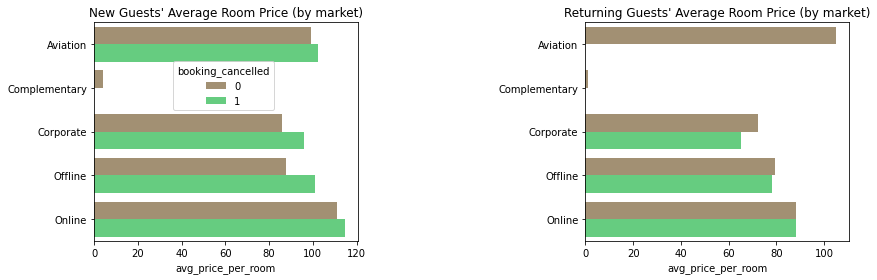

In [96]:
market_booking_price_new=hotel[boolean].groupby(['market_segment_type','booking_cancelled'])['avg_price_per_room'].mean().reset_index()
market_booking_price_return=hotel[np.invert(boolean)].groupby(['market_segment_type','booking_cancelled'])['avg_price_per_room'].mean().reset_index()

fig=plt.figure()

fig.add_subplot(1,2,1)
sns.barplot(data=market_booking_price_new,x='avg_price_per_room',y='market_segment_type',hue='booking_cancelled',palette='terrain_r')
plt.legend(title='booking_cancelled',loc=[0.3,0.6])
plt.ylabel(None)
plt.title("New Guests' Average Room Price (by market)")

fig.add_subplot(1,2,2)
sns.barplot(data=market_booking_price_return,x='avg_price_per_room',y='market_segment_type',hue='booking_cancelled',palette='terrain_r')
plt.legend([],[],frameon=False)
plt.ylabel(None)
plt.title("Returning Guests' Average Room Price (by market)")

plt.tight_layout()
plt.gcf().set_size_inches(14,4)

print(f"The average cost of an Aviation Market room is: {hotel.groupby('market_segment_type')['avg_price_per_room'].mean()[0]}")
print(f"The average cost of an Complementary Market room is: {hotel.groupby('market_segment_type')['avg_price_per_room'].mean()[1]}")
print(f"The average cost of an Corporate Market room is: {hotel.groupby('market_segment_type')['avg_price_per_room'].mean()[2]}")
print(f"The average cost of an Offline Market room is: {hotel.groupby('market_segment_type')['avg_price_per_room'].mean()[3]}")
print(f"The average cost of an Online Market room is: {hotel.groupby('market_segment_type')['avg_price_per_room'].mean()[4]}")
del [market_booking_price_new, market_booking_price_return]

### Corporate is the cheapest room across the board, which makes sense logically (deals with other companies for cheaper rooms, in return for return customers).
### The most expensive rooms are Online for New Guests, and Aviation for Return Guests.
    However, there were very few data points for Aviation under Returning Guests,
    so more realistically Online is likely the highest cost for Return Guests as well.
### It's strange that there are Complementary rooms that have a cost associated with them.

#### Let's check the number of Complementary rooms that have a cost associated.

In [97]:
print(f"The amount of non-free Complementary rooms is {len(hotel[hotel['market_segment_type']=='Complementary']['avg_price_per_room'][hotel[hotel['market_segment_type']=='Complementary']['avg_price_per_room']!=0])}.")

The amount of non-free Complementary rooms is 37.


In [98]:
nonfreecomplementary=hotel.iloc[hotel[hotel['market_segment_type']=='Complementary']['avg_price_per_room'][hotel[hotel['market_segment_type']=='Complementary']['avg_price_per_room']!=0].index.tolist()]
nonfreecomplementary.head()

no_of_adults  no_of_children type_of_meal_plan  \
486              2               0       Meal Plan 1   
586              2               0       Meal Plan 2   
1275             2               1       Meal Plan 1   
1481             2               0       Meal Plan 1   
1523             2               0       Meal Plan 1   

      required_car_parking_space room_type_reserved  lead_time  arrival_year  \
486                            0        Room_Type 1         34          2018   
586                            0        Room_Type 4         67          2017   
1275                           0        Room_Type 4         43          2018   
1481                           0        Room_Type 1         16          2018   
1523                           0        Room_Type 1         79          2017   

      arrival_month market_segment_type  repeated_guest  avg_price_per_room  \
486               2       Complementary               0                6.50   
586               9       Complementary               0               29.00   
1275             11       Complementary               0               20.00   
1481              2       Complementary               0                2.00   
1523              7       Complementary               0               37.33   

      no_of_special_requests  booking_cancelled  no_of_nights  \
486                        1                  0             2   
586                        1                  0             4   
1275                       2                  0             2   
1481                       0                  0             2   
1523                       1                  0             3   

      weekend_booked?  no_of_previous_bookings  \
486                 1                        0   
586                 1                        0   
1275                0                        0   
1481                0                        0   
1523                0                        0   

      ratio_of_previous_bookings_cancelled  arrival_day  
486                                    0.0          243  
586                                    0.0           68  
1275                                   0.0          513  
1481                                   0.0          241  
1523                                   0.0            7

### How many of these non-free complementary hotel rooms get cancelled?

In [99]:
nonfreecomplementary['booking_cancelled'].sum()

0

### Surprisingly, zero.
#### The cost associated with a complementary room is likely upgrades to a free room that aren't covered under the original gift.
### Last check, how many of these non-free complementary rooms have special requests?

In [100]:
nonfreecomplementary['no_of_special_requests'].value_counts()

0    26
1     7
2     3
3     1
Name: no_of_special_requests, dtype: int64

### Either a room upgrade isn't considered a 'special request', or there is something else going on here with these non-free complementary rooms.
### In any case, it's 37 data points; it makes up 10% of the complementary room market, so it would be a bad idea to drop the points just because we don't have the information necessary to deduce what is going on here.

In [101]:
del nonfreecomplementary

---
---
---
# <span style='font-size:larger'>Data Preprocessing</span> ✓  

✓ 1) Data Manipulations  
✓ 2) Feature engineering (if needed)  
✓ 3) Basic Summaries - Univariate  
✓ 4) Correlation Checks - Bivariate  
✓ 5) Data Transforming  
✓ 6) Binning  
✓ 7) Standardize Variables  
✓ 8) Missing value treatment (if needed)  
✓ 9) Encode Categoricals  
✓ 10) Outlier detection and treatment (if needed)   
✓ 11) Any other preprocessing steps (if needed) 
# Quick pre-Preprocessing recap
### So far, we've added:
    no_of_nights = number of nights booked for this stay
    weekend_booked? = binary yes/no 'is the weekend booked?'.
    no_of_previous_bookings = total amount of previous bookings
    ratio_of_previous_bookings_cancelled = self-explanatory
    arrival_day = day of booked arrival numbered from 1 to 549
### We have dropped:
    'Booking_ID'
    '9 and 10 children' from 'no_of_children' (3 entries between them)
    'no_of_week_nights'
    'no_of_weekend_nights'
    'Meal Plan 3' from 'type_of_meal_plan' (only 5 entries)
    'Room_Type 3' from 'room_type_reserved' (only 7 entries)
    'no_of_previous_cancellations'
    'no_of_previous_bookings_not_cancelled'
    'avg_price_per_room' > 400 (1 outlier at 500)
    'arrival_date'

In [154]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36259 non-null  int64   
 1   no_of_children                        36259 non-null  int64   
 2   type_of_meal_plan                     36259 non-null  category
 3   required_car_parking_space            36259 non-null  int64   
 4   room_type_reserved                    36259 non-null  category
 5   lead_time                             36259 non-null  int64   
 6   arrival_year                          36259 non-null  int64   
 7   arrival_month                         36259 non-null  int64   
 8   market_segment_type                   36259 non-null  category
 9   repeated_guest                        36259 non-null  int64   
 10  avg_price_per_room                    36259 non-null  float64 
 11  no

# 1) Data Manipulations
    As can be seen above, all necessary object-to-category transformations have
    already taken place, and useless columns like Booking_ID have been dropped.
---
# 2) Feature engineering

## This was where I was originally going to drop 'repeated_guest'. However, as you'll see in Part 5 of preprocessing, this turned out to be a bad idea.

# 3) Basic Summaries - Univariate    
### All date columns are ready for logistic regression
    arrival_date was dropped as it contained the same information as arrival_day (originally datetime)
    datetime was created from arrival date, month and year, and was transformed into arrival_day    
### 'no_of_week_nights', 'no_of_weekend_nights', and 'returning_guest' were reduced to 'no_of_nights' & 'weekend_booked?'.
### ['no_of_previous_bookings' & 'ratio_of_previous_bookings_cancelled'] replaced ['no_of_previous_cancellations' & 'no_of_previous_bookings_not_cancelled'].
    No information was lost, and the ratio of previous cancellations is
    more important than either of the parent columns.
---
# 4) Correlation Checks - Bivariate

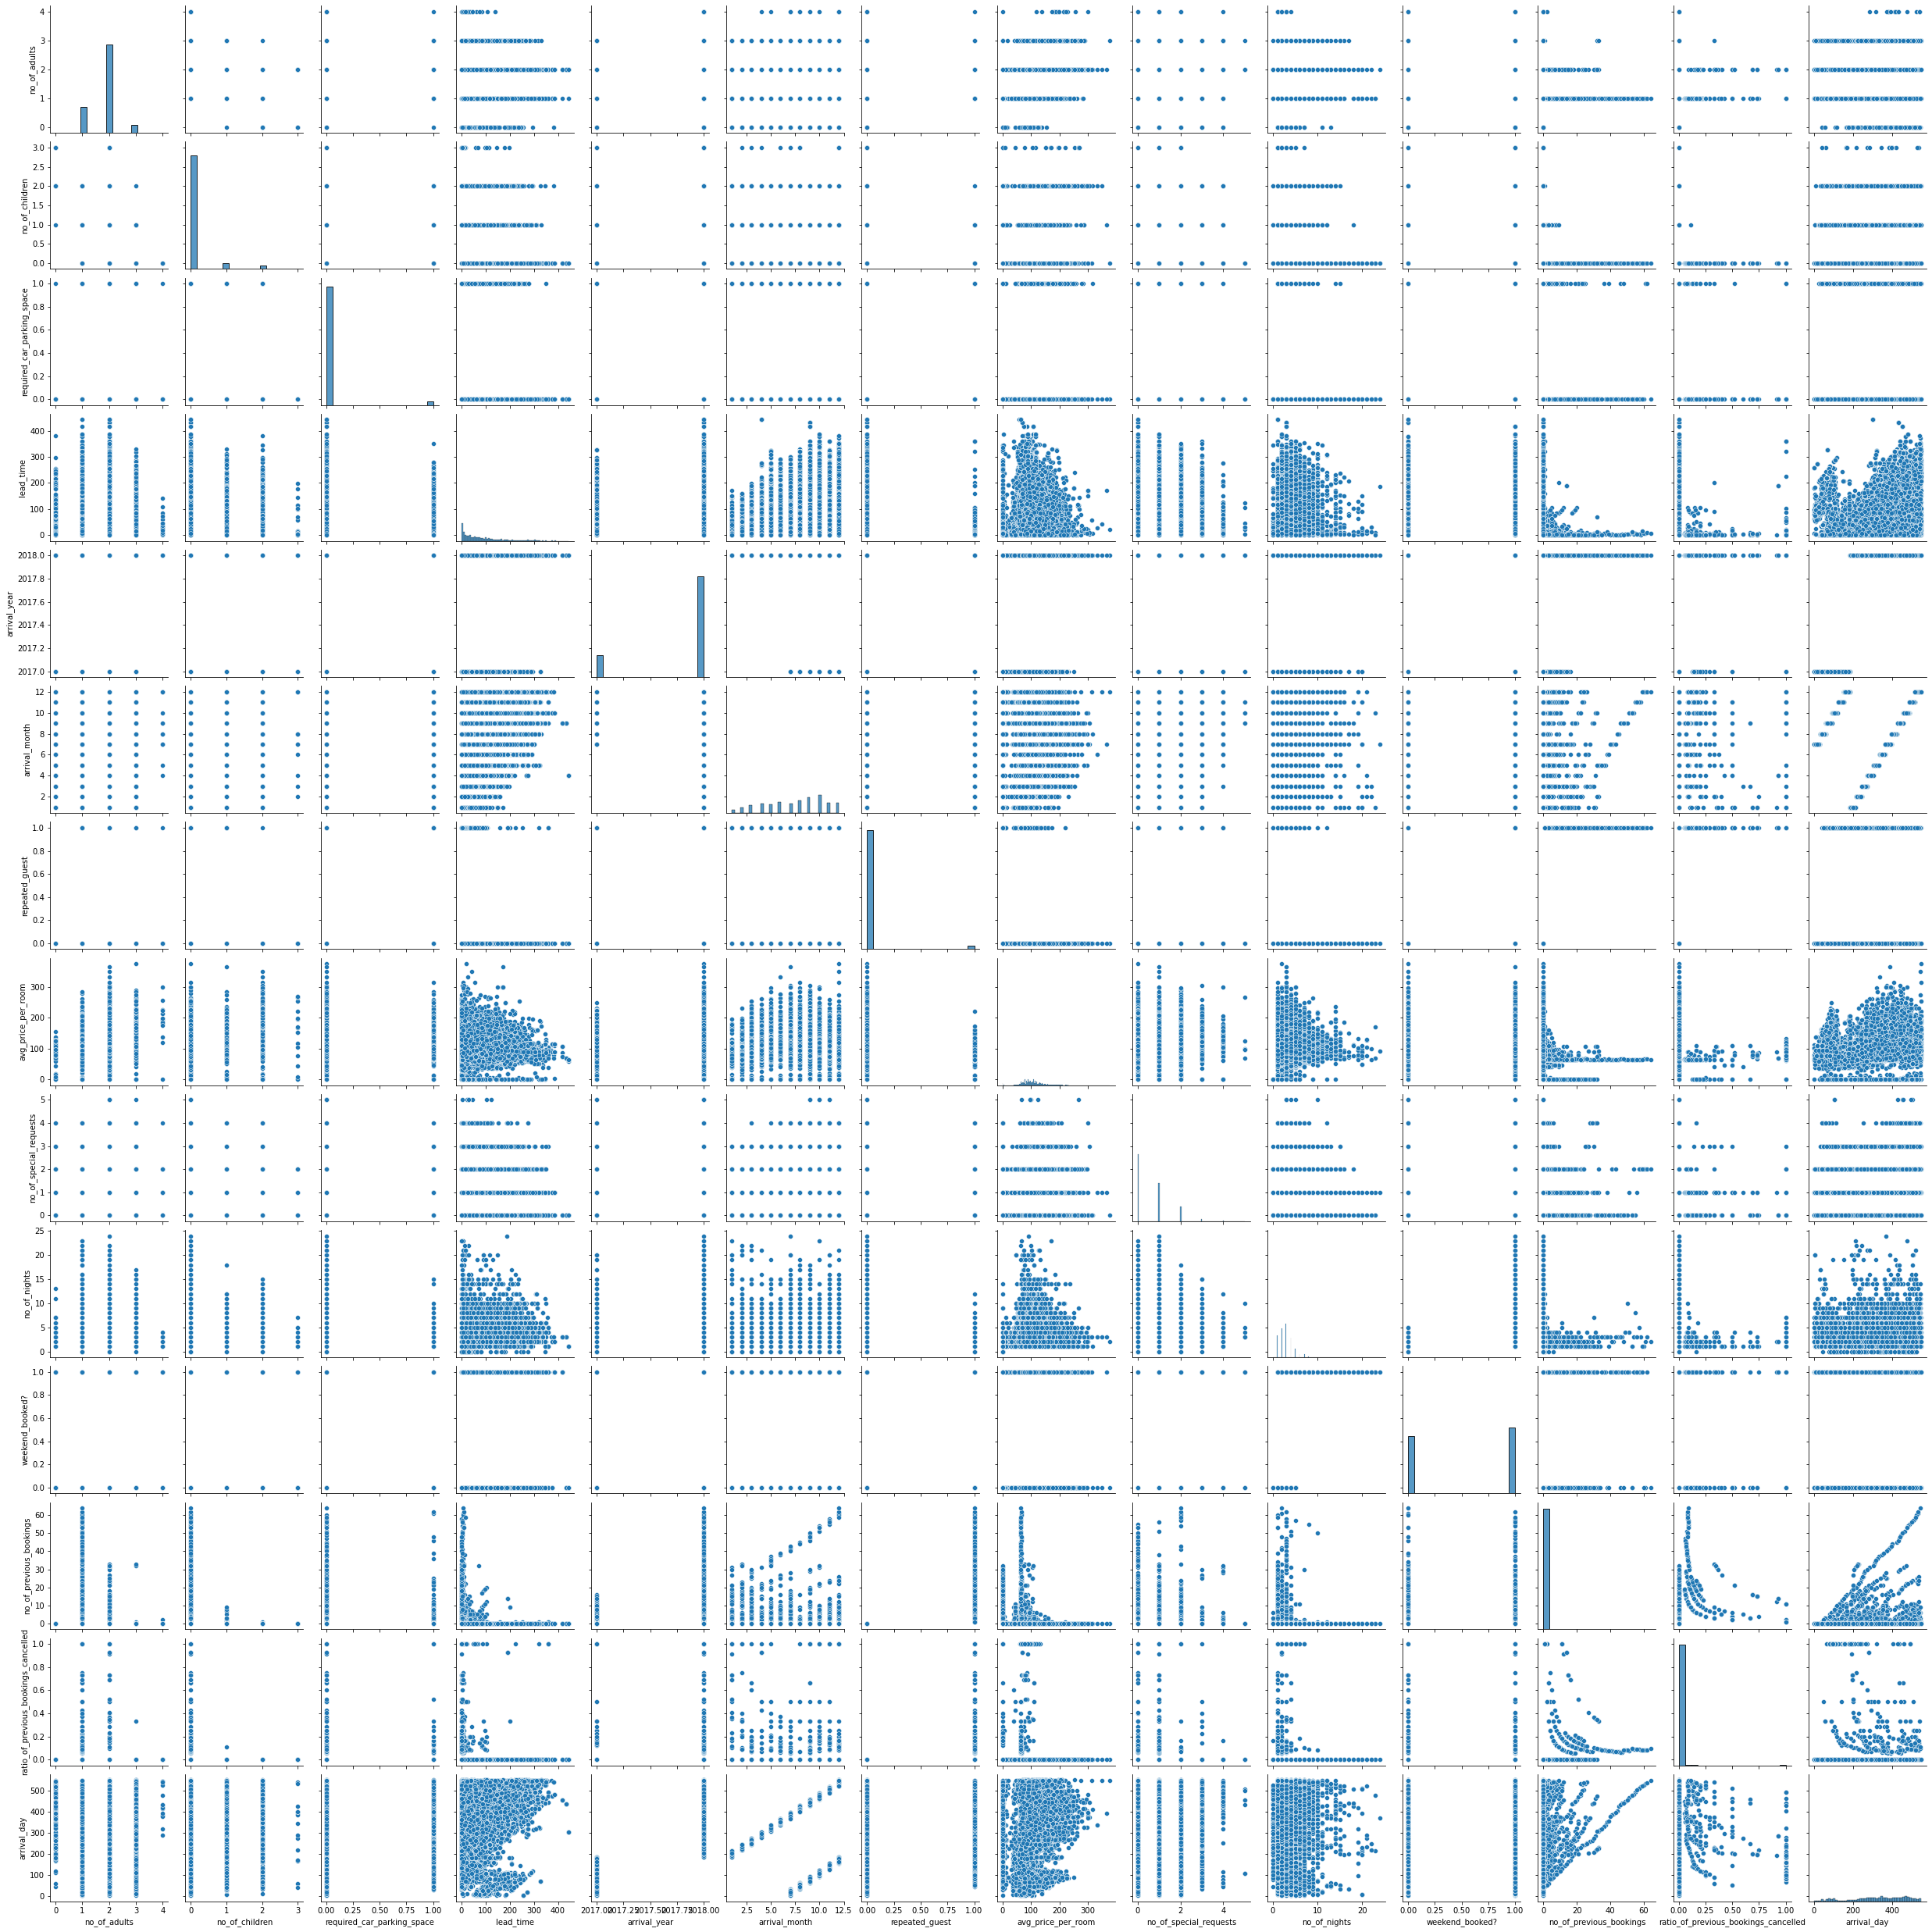

In [155]:
sns.pairplot(hotel.drop('booking_cancelled',axis=1));

### The only columns close to giving the same information are arrival_day and arrival_month.
    Arrival_month had some very unique information in bivariate analysis. I am keeping both arrival_day and 
    arrival_month for different reasons.
    
    Arrival_month may lead to an actionable conclusion on which months to advertise more in, 
    Arrival_day may lead to a side conclusion that cancellations are indeed increasing as time goes on.
---
### Before I go on, I am going to have to copy my current hotel dataset for work on the Logistic Regression.
### Certain things I am planning to do in the next preprocessing steps will mess up the data for a future decision tree.

In [156]:
hotel_logistic=hotel.copy()
hotel_tree=hotel.copy()

# 5) Data Transforming & Binning
a short list of the most skewed variables:

no_of_children  
no_of_nights  
lead_time  
no_of_previous_bookings  
ratio_of_previous_bookings_cancelled  
no_of_special_requests  
arrival_day (?)  
#### <sup>&nbsp; &nbsp; &nbsp; &nbsp; I haven't actually checked arrival_day's histplot yet...</sup>

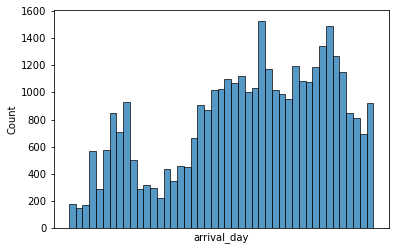

In [157]:
sns.histplot(data=hotel_logistic,x='arrival_day')
plt.xticks([]);

### It's not horribly skewed; it doesn't need transformation.
### However, the same can't be said about the others.
# Let's try to manipulate no_of_children.

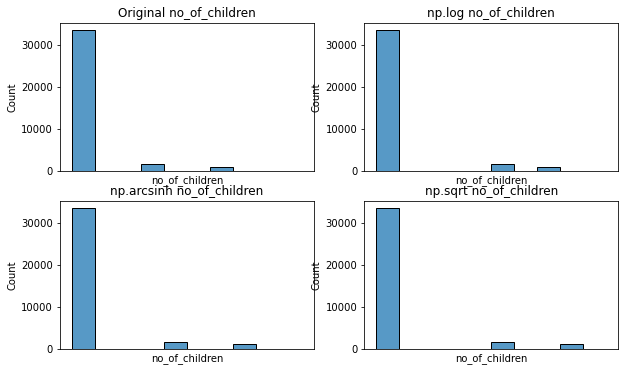

In [158]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['no_of_children'],bins=10)
plt.xticks([]);
plt.title('Original no_of_children')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['no_of_children']+1),bins=10)
plt.xticks([]);
plt.title('np.log no_of_children')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['no_of_children']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh no_of_children')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['no_of_children']),bins=10)
plt.xticks([]);
plt.title('np.sqrt no_of_children')

plt.gcf().set_size_inches(10,6)

### Because of the nature of no_of_children (acts as a sort of categorical variable), as well as it's very low effect on the dependent variable, this is a very good candidate for binning.
    We'll make it into a binary variable.

In [159]:
# create a bin with 0 for zero children, and 1 for any children at all.
bin_child=[]
for entry in range(hotel_logistic.shape[0]):
    if hotel_logistic['no_of_children'][entry]==0:
        bin_child.append(0)
    else:
        bin_child.append(1)

# add bin_child as a column and drop no_of_children.
hotel_logistic['children?']=bin_child
hotel_logistic.drop('no_of_children',axis=1,inplace=True)
del bin_child

# Next, let's look at no_of_nights.

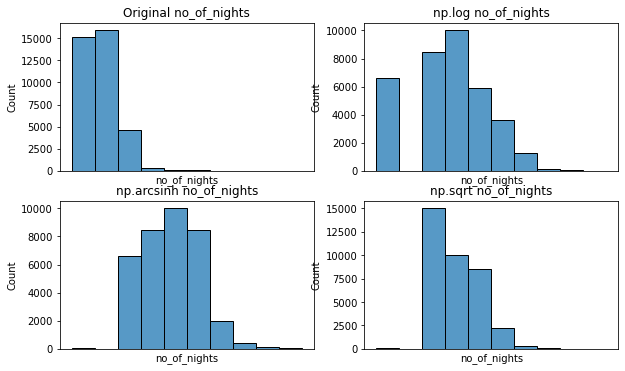

In [160]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['no_of_nights'],bins=10)
plt.xticks([]);
plt.title('Original no_of_nights')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['no_of_nights']),bins=10)
plt.xticks([]);
plt.title('np.log no_of_nights')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['no_of_nights']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh no_of_nights')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['no_of_nights']),bins=10)
plt.xticks([]);
plt.title('np.sqrt no_of_nights')

plt.gcf().set_size_inches(10,6)

### The best result is definitely arcsinh. We will apply this to the current column.

In [161]:
hotel_logistic['no_of_nights'] = np.arcsinh(hotel_logistic['no_of_nights'])
hotel_logistic.rename(columns={'no_of_nights':'arcsinh_no_of_nights'},inplace=True)

# Next, lead_time.

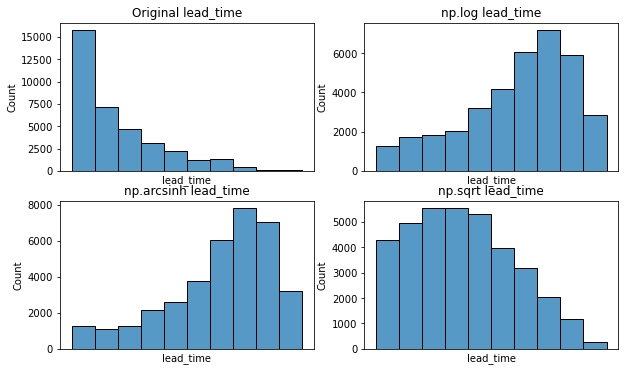

In [162]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['lead_time'],bins=10)
plt.xticks([]);
plt.title('Original lead_time')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['lead_time']+1),bins=10)
plt.xticks([]);
plt.title('np.log lead_time')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['lead_time']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh lead_time')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['lead_time']),bins=10)
plt.xticks([]);
plt.title('np.sqrt lead_time')

plt.gcf().set_size_inches(10,6)

### In my opinion, np.sqrt looks the best. Let's manipulate this.

In [163]:
hotel_logistic['lead_time'] = np.sqrt(hotel_logistic['lead_time'])
hotel_logistic.rename(columns={'lead_time':'sqrt_lead_time'},inplace=True)

# Next, no_of_previous_bookings.

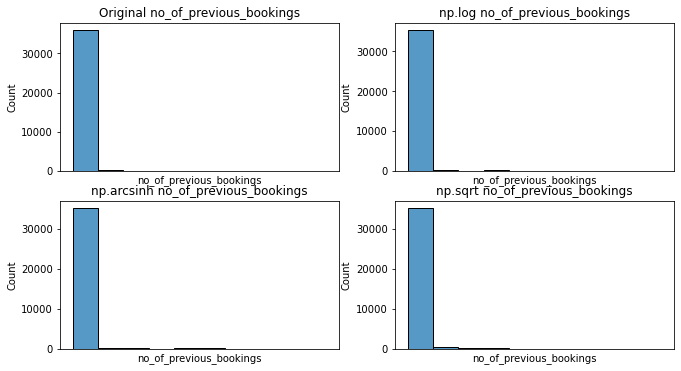

In [164]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['no_of_previous_bookings'],bins=10)
plt.xticks([]);
plt.title('Original no_of_previous_bookings')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['no_of_previous_bookings']+1),bins=10)
plt.xticks([]);
plt.title('np.log no_of_previous_bookings')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['no_of_previous_bookings']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh no_of_previous_bookings')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['no_of_previous_bookings']),bins=10)
plt.xticks([]);
plt.title('np.sqrt no_of_previous_bookings')

plt.gcf().set_size_inches(11,6)

### So, as it turns out, I was wrong, and no_of_previous_bookings actually doesn't give as novel information as I previously assumed.
#### If I was to bin this to prevent its highly skewed data from affecting the regression, I would clearly bin it 0 = no previous bookings, 1 = any previous bookings, as there wasn't a meaningful difference between 1 previous booking and 60 previous bookings on cancellations (see bivariate analysis on no_of_previous_bookings with booking_cancelled).
### However, this would leave me with the exact column for 'repeated_guest'. So, in fact, it's no_of_previous_bookings that needs to be dropped, NOT 'repeated_guest'.

In [165]:
hotel_logistic.drop('no_of_previous_bookings',axis=1, inplace=True)

# Next, ratio_of_previous_bookings_cancelled.

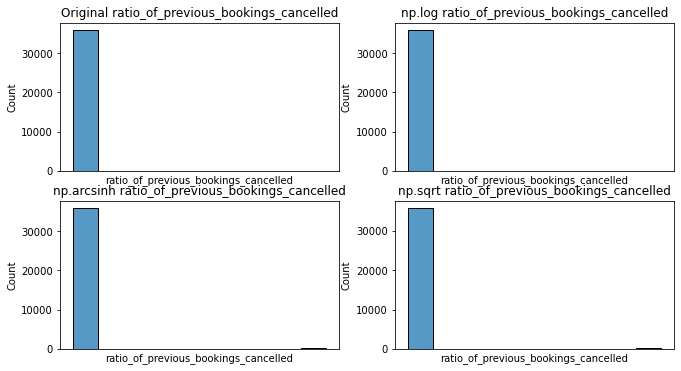

In [166]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['ratio_of_previous_bookings_cancelled'],bins=10)
plt.xticks([]);
plt.title('Original ratio_of_previous_bookings_cancelled')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['ratio_of_previous_bookings_cancelled']+1),bins=10)
plt.xticks([]);
plt.title('np.log ratio_of_previous_bookings_cancelled')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['ratio_of_previous_bookings_cancelled']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh ratio_of_previous_bookings_cancelled')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['ratio_of_previous_bookings_cancelled']),bins=10)
plt.xticks([]);
plt.title('np.sqrt ratio_of_previous_bookings_cancelled')

plt.gcf().set_size_inches(11,6)

### Another good binning contender. 
    As was discussed previously, the closer a guest was to 0.0 or 1.0, the more likely it was the current
    booking turned out to be cancelled (see bivariate analysis).
### I propose binning this into 3 sections, 0.0, 1.0, and anything else.
    0.0 = Zero_previous_cancelled
    1.0 = 100%_previous_cancelled
    Anything else = Some_previous_cancelled

In [167]:
# create 3 bins.
bin_ratio=[]
for entry in range(hotel_logistic.shape[0]):
    if hotel_logistic['ratio_of_previous_bookings_cancelled'][entry]==0.0:
        bin_ratio.append('Zero_previous_cancelled')
    elif hotel_logistic['ratio_of_previous_bookings_cancelled'][entry]==1.0:
        bin_ratio.append('100%_previous_cancelled')
    else:
        bin_ratio.append('Some_previous_cancelled')
        
# add bin_ratio as a column and drop ratio_of_previous_bookings_cancelled.
hotel_logistic['previous_cancellations']=bin_ratio
hotel_logistic.drop('ratio_of_previous_bookings_cancelled',axis=1,inplace=True)
hotel_logistic['previous_cancellations']=hotel_logistic['previous_cancellations'].astype('category')
del bin_ratio

# Finally, no_of_special_requests.

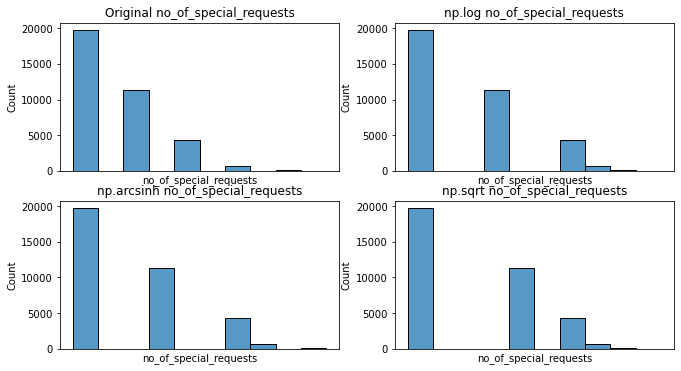

In [168]:
fig=plt.figure()

fig.add_subplot(2,2,1)
sns.histplot(data=hotel_logistic,x=hotel_logistic['no_of_special_requests'],bins=10)
plt.xticks([]);
plt.title('Original no_of_special_requests')

fig.add_subplot(2,2,2)
sns.histplot(data=hotel_logistic,x=np.log(hotel_logistic['no_of_special_requests']+1),bins=10)
plt.xticks([]);
plt.title('np.log no_of_special_requests')

fig.add_subplot(2,2,3)
sns.histplot(data=hotel_logistic,x=np.arcsinh(hotel_logistic['no_of_special_requests']),bins=10)
plt.xticks([]);
plt.title('np.arcsinh no_of_special_requests')

fig.add_subplot(2,2,4)
sns.histplot(data=hotel_logistic,x=np.sqrt(hotel_logistic['no_of_special_requests']),bins=10)
plt.xticks([]);
plt.title('np.sqrt no_of_special_requests')

plt.gcf().set_size_inches(11,6)

### This acts somewhat similar to a categorical variable, like no_of_children.
### However, I do not want to bin this data because there was a very clear trend in the bivariate analysis.
    There wasn't an instant drop-off after 3 requests or anything similar, it was a slow decline;
    customers who made more special requests tended to have lower booking_cancelled ratios.
### I am not going to manipulate this data any further, I believe it may be important to the linear regression as-is.
---
## This isn't technically binning, but it will assist in simplifying the data:
# arrival_year
### I want to change it into a binary variable, that simply asks if the year is 2018.

In [169]:
bin_year=[]
for entry in range(hotel_logistic.shape[0]):
    if hotel_logistic['arrival_year'][entry]==2018:
        bin_year.append(1)
    else:
        bin_year.append(0)

hotel_logistic['2018?']=bin_year
hotel_logistic.drop('arrival_year',axis=1,inplace=True)
del bin_year

---
# 6) Standardize Variables
    We are going to avoid standardizing the variables as it makes the log odds much less readable at the end
    of the model.

---
# 7) Missing value treatment (if needed) 
    There were no missing values. I created some NaN values in the manipulations
    during Univariate and Bivariate analysis, but other than those, there were no NaN values
    or unknown categories.
---
# 8) Encode Categoricals
    I will be doing this as part of model building.

---
# 9) Outlier detection

In [170]:
def ratio_outside_1pt5_IQR(data,column):
    length = 1.5 * np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))
    return np.mean(np.abs(list(data[column])-np.median(data[column]))>length)

def ratio_out_1pt5_outlier_list(data,column):
    outliers=data.loc[np.abs(data[column]-data[column].median())>list(1.5*np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75])))[0],column]
    return outliers

def six_iqr(data,column):
    Sixiqr=6 * np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75]))
    return np.mean(np.abs(list(data[column])-np.median(data[column]))>Sixiqr)

def six_iqr_outlier_list(data,column):
    outliers=data.loc[np.abs(data[column]-data[column].median())>list(6*np.diff(np.quantile(data[column][data[column].notnull()],[.25,.75])))[0],column]
    return outliers

def check_six_iqr(data,column):
    quartiles=np.quantile(data[column][data[column].notnull()],[.25,.75])
    Sixiqr=6*(quartiles[1]-quartiles[0])
    print(f'Q1={quartiles[0]}, Q3={quartiles[1]}, 6*IQR={Sixiqr}')

In [171]:
outliercheck=['no_of_adults','sqrt_lead_time','arrival_month','avg_price_per_room','no_of_special_requests','arcsinh_no_of_nights','arrival_day']
for item in outliercheck:
    print(f"For {item}:")
    print(f"ratio of points outside 1.5x IQR: {ratio_outside_1pt5_IQR(hotel_logistic,item)}")
    print(f"ratio of points outside 6x IQR: {six_iqr(hotel_logistic,item)}\n")

For no_of_adults:
ratio of points outside 1.5x IQR: 0.2802890316886842
ratio of points outside 6x IQR: 0.2802890316886842

For sqrt_lead_time:
ratio of points outside 1.5x IQR: 0.012438291182878734
ratio of points outside 6x IQR: 0.0

For arrival_month:
ratio of points outside 1.5x IQR: 0.0
ratio of points outside 6x IQR: 0.0

For avg_price_per_room:
ratio of points outside 1.5x IQR: 0.08215891227005709
ratio of points outside 6x IQR: 8.273807882180976e-05

For no_of_special_requests:
ratio of points outside 1.5x IQR: 0.14134421798725832
ratio of points outside 6x IQR: 0.0

For arcsinh_no_of_nights:
ratio of points outside 1.5x IQR: 0.0132932513307041
ratio of points outside 6x IQR: 0.0

For arrival_day:
ratio of points outside 1.5x IQR: 0.018781543892550816
ratio of points outside 6x IQR: 0.0



In [172]:
check_six_iqr(hotel_logistic,'no_of_adults')

Q1=2.0, Q3=2.0, 6*IQR=0.0


In [173]:
six_iqr_outlier_list(hotel_logistic,'no_of_adults')

2        1
8        3
10       1
11       1
13       1
        ..
36244    3
36245    1
36247    1
36252    1
36254    3
Name: no_of_adults, Length: 10163, dtype: int64

In [174]:
six_iqr_outlier_list(hotel_logistic,'avg_price_per_room')

9456     375.50
20889    365.00
34290    349.63
Name: avg_price_per_room, dtype: float64

### The amount of 6xIQR outliers in the number of adults indicates that we need to do something about this data spread.
### I already dropped the extreme average price outlier, there's no need to drop these three values as they are much closer to the rest of the values.
## I will be binning adults very similarly to how I binned kids.

In [175]:
adultcount=[]
for entry in range(36259):
    if hotel_logistic['no_of_adults'][entry] in [0,1,2]:
        adultcount.append('2 Or Fewer Adults')
    else:
        adultcount.append('3 Or More Adults')
hotel_logistic['adultcount']=adultcount
hotel_logistic.drop('no_of_adults',axis=1,inplace=True)

---
# Quick post-preprocessing recap
### So far, we've added:
	no_of_nights = number of nights booked for this stay
	weekend_booked? = binary yes/no 'is the weekend booked?'.
	no_of_previous_bookings = total amount of previous bookings
	ratio_of_previous_bookings_cancelled = self-explanatory
	arrival_day = day of booked arrival numbered from 1 to 549
### We have dropped:
	'Booking_ID'
	'9 and 10 children' from 'no_of_children' (3 entries between them)
	'no_of_week_nights'
	'no_of_weekend_nights'
	'Meal Plan 3' from 'type_of_meal_plan' (only 5 entries)
	'Room_Type 3' from 'room_type_reserved' (only 7 entries)
	'no_of_previous_cancellations'
	'no_of_previous_bookings_not_cancelled'
	'avg_price_per_room' > 400 (1 outlier at 500)
	'arrival_date'
	'no_of_previous_bookings'

---
---
---
# <span style='font-size:larger'>EDA 2</span>

### Let's start with a pairplot (only booking_cancelled):

In [176]:
hotel_logistic=pd.get_dummies(hotel_logistic,drop_first=True)

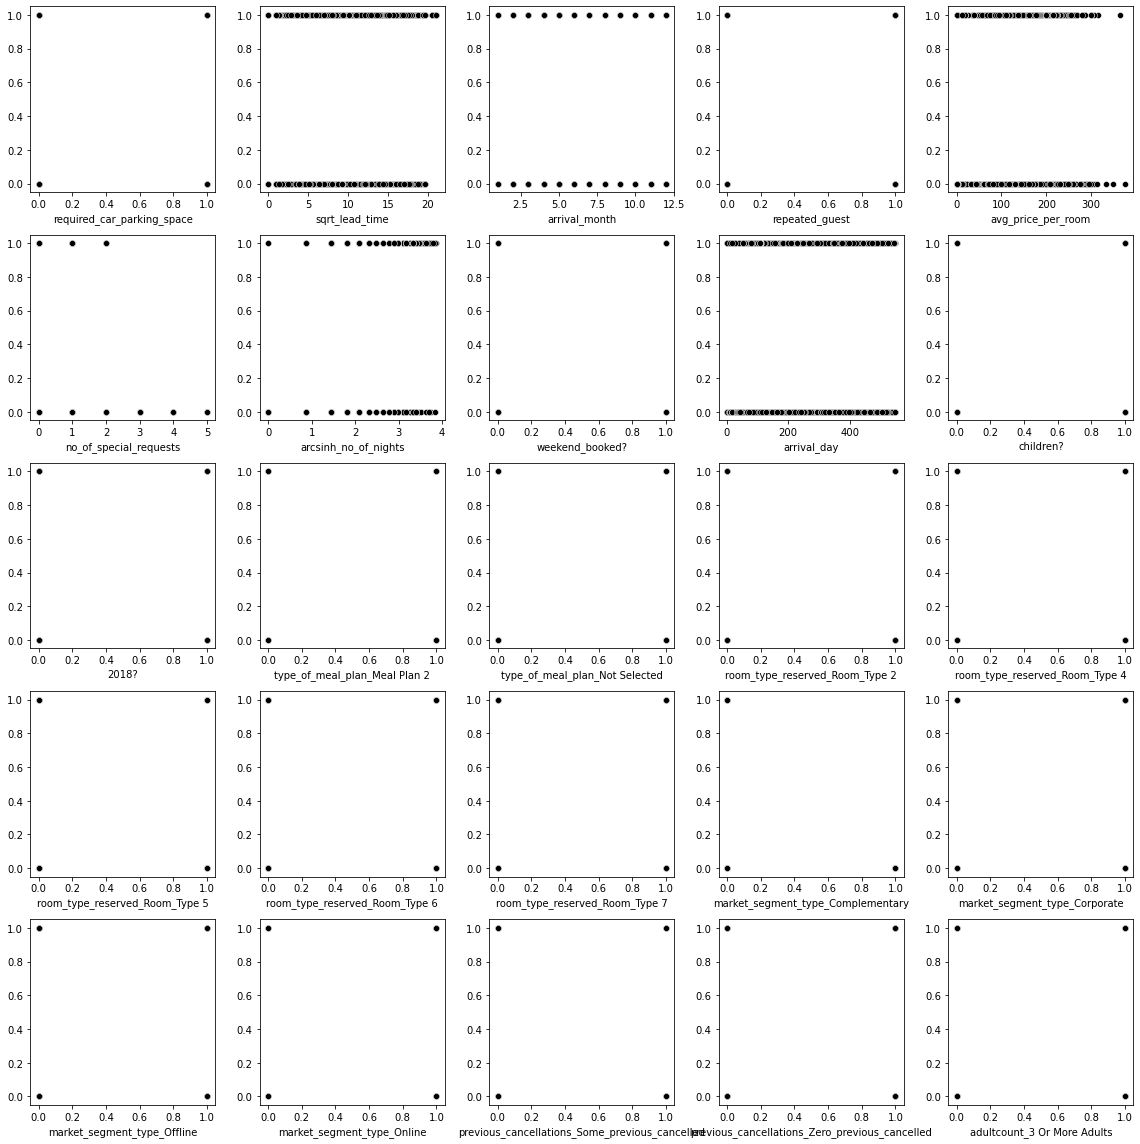

In [177]:
numerical=[]
for column in list(hotel_logistic.columns):
    if column !='booking_cancelled':
        numerical.append(column)
            
count=1
fig=plt.figure()

for column in numerical:
    
    fig.add_subplot(5,5,count)
    sns.scatterplot(data=hotel_logistic,x=column,y='booking_cancelled',color='black')
    count=count+1
    plt.ylabel(None)
    plt.gcf().set_size_inches(16,16)
    
plt.tight_layout()
del count
del numerical

### And a heatmap (only the row with booking_cancelled):

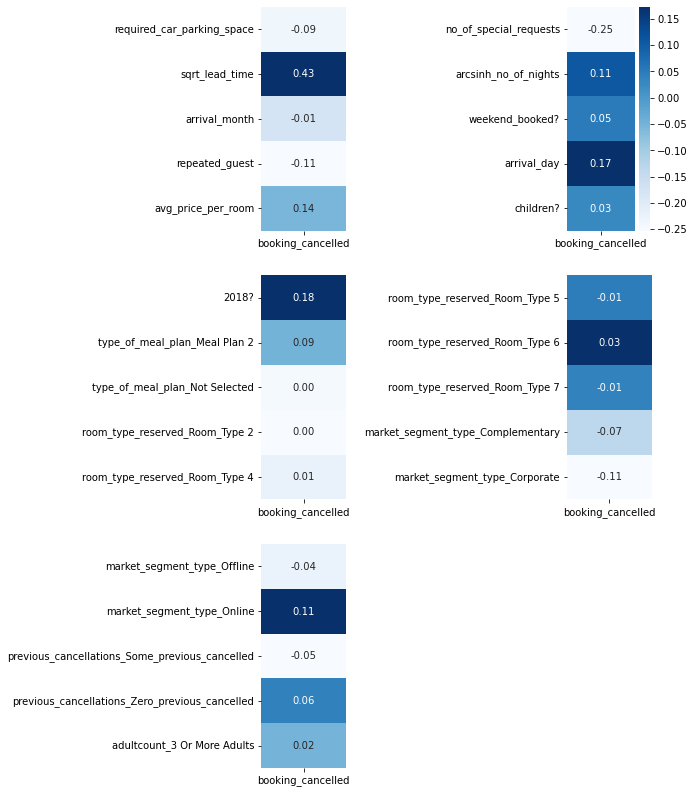

In [178]:
fig=plt.figure()

fig.add_subplot(3,4,1)
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled']).drop('booking_cancelled',axis=0).iloc[0:5,:],annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.legend([],[],frameon=False)

fig.add_subplot(3,4,4)
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled']).drop('booking_cancelled',axis=0).iloc[5:10,:],annot=True,fmt='.2f',cmap='Blues')
plt.legend([],[],frameon=False)

fig.add_subplot(3,4,5)
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled']).drop('booking_cancelled',axis=0).iloc[10:15,:],annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.legend([],[],frameon=False)

fig.add_subplot(3,4,8)
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled']).drop('booking_cancelled',axis=0).iloc[15:20,:],annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.legend([],[],frameon=False)

fig.add_subplot(3,4,9)
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled']).drop('booking_cancelled',axis=0).iloc[20:25,:],annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.legend([],[],frameon=False)

plt.gcf().set_size_inches(7,14)

In [179]:
hotel_logistic.rename(columns={'Not Selected':'Meal Plan Not Selected'},inplace=True)
# quick change to the Meal Plan column to make it more identifiable.

### repeated_guest, special_requests, and Corporate all have a negative correlation to booking_cancelled.
    As these go up, cancellation rates tend to go down.
### lead_time, 2018?, avg_price, number of nights, and arrival_day have positive correlation to booking_cancelled.
    As these go up, cancellation rates tend to go up.
# In the current state of arrival_month, we won't get much information out of the column.
### The best months for business tend to be near the middle. This might flatten out the positive effect in the logistic regression. I'd rather bin this instead.
    Group 1: December and January (1 and 12)
        December and January are the best months in terms of low cancellation rates.
    Group 2: February to May (2 to 5)
        Slow business period, average cancellation rates.
    Group 3: June to August (6 to 8)
        Very active, highest cancellation rates.
    Group 4: September to November (9 to 11)
        Strong business period, high cancellation rates.
        
    see bivariate arrival_month / booking_cancelled analysis.

In [180]:
monthlist=[]
for entry in range(hotel_logistic.shape[0]):
    if hotel_logistic['arrival_month'][entry] in [1,12]:
        monthlist.append('December to January')
    if hotel_logistic['arrival_month'][entry] in [2,3,4,5]:
        monthlist.append('February to May')
    if hotel_logistic['arrival_month'][entry] in [6,7,8]:
        monthlist.append('June to August')
    if hotel_logistic['arrival_month'][entry] in [9,10,11]:
        monthlist.append('September to November')
        
hotel_logistic['month_bin']=monthlist
hotel_logistic['month_bin']=hotel_logistic['month_bin'].astype('category')
hotel_logistic.drop('arrival_month',axis=1,inplace=True)
hotel_logistic=pd.concat([hotel_logistic,pd.get_dummies(hotel_logistic['month_bin']).drop('June to August',axis=1)],axis=1)
hotel_logistic.drop('month_bin',axis=1,inplace=True)
del monthlist

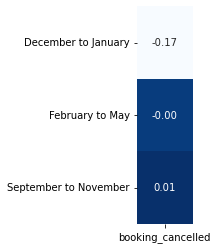

In [181]:
sns.heatmap(pd.DataFrame(hotel_logistic.corr()['booking_cancelled'].loc[['December to January','February to May','September to November']]),annot=True,fmt='.2f',cmap='Blues',cbar=False)
plt.legend([],[],frameon=False)
plt.gcf().set_size_inches(1,4)

### With June to August (the period with the worst cancellation ratio) as the baseline, December to January has a strong negative correlation with booking_cancelled, which is exactly what we saw in the bivariate analysis.
    For bookings in the months of January and December, cancellations are less likely.

---
---
---
# <span style='font-size:larger'> Building a Logistic Regression model </span>

In [291]:
X=hotel_logistic.drop(['booking_cancelled'],axis=1)
y=hotel_logistic['booking_cancelled']

X=sm.add_constant(X)
X=pd.get_dummies(X,drop_first=True)

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=1,stratify=y
)

logit=sm.Logit(y_train,X_train.astype(float))
lg=logit.fit()

print(lg.summary())

         Current function value: 0.416280
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      booking_cancelled   No. Observations:                25381
Model:                          Logit   Df Residuals:                    25353
Method:                           MLE   Df Model:                           27
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                  0.3418
Time:                        17:14:49   Log-Likelihood:                -10566.
converged:                      False   LL-Null:                       -16053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             13.0738   1455.047    

# Many things are off here in our model.
### Some of the binary columns like repeated_guest have massive 95% confidence intervals.
### Our Pseudo R-Squared is infinity and our Log-likelihood is -infinity.
    Let's begin removing some of columns with high VIFs.
---
# Checking Multicollinearity



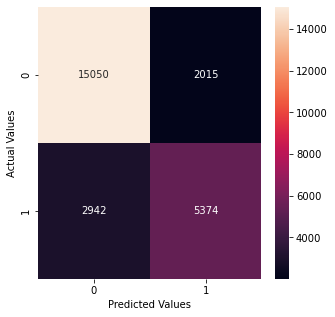

Accuracy on training set :  0.8046964264607384


In [292]:
pred_train = lg.predict(X_train) > 0.5    #50% threshold
pred_train = np.round(pred_train)

cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print('Accuracy on training set : ',accuracy_score(y_train,pred_train))

### It's more important that we catch the 1's than the 0's in this case. 
### Accuracy isn't as important as Recall and Precision in this case, since catching positives matters more than catching negatives.

In [293]:
def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [294]:
model_performance_classification_sklearn(lg,X_train,y_train,)

Accuracy    Recall  Precision        F1
0  0.804696  0.646224   0.727297  0.684368

### Our Recall is pretty bad, but our Accuracy and Precision are better. Let's check the VIFs.

In [295]:
vif_series= pd.Series(
    [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,    
)
print(f'VIF values: \n\n{vif_series.sort_values(ascending=False)}\n')

VIF values: 

const                                             689.775377
market_segment_type_Online                         65.055352
market_segment_type_Offline                        58.710638
market_segment_type_Corporate                      15.542910
2018?                                               7.112737
arrival_day                                         6.898834
market_segment_type_Complementary                   4.296177
previous_cancellations_Zero_previous_cancelled      3.233323
previous_cancellations_Some_previous_cancelled      2.630201
avg_price_per_room                                  2.265405
February to May                                     2.194720
September to November                               2.145237
repeated_guest                                      1.954905
room_type_reserved_Room_Type 6                      1.581556
December to January                                 1.578281
sqrt_lead_time                                      1.518511
children? 

## Two bad VIFs, remove Online first.

Metrics of the training set: 

    Accuracy    Recall  Precision      F1
0  0.804815  0.646825   0.727285  0.6847 



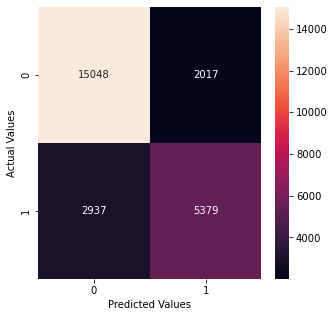

VIF values: 

const                                             402.314795
2018?                                               7.112244
arrival_day                                         6.890842
previous_cancellations_Zero_previous_cancelled      3.230757
previous_cancellations_Some_previous_cancelled      2.629945
avg_price_per_room                                  2.260935
February to May                                     2.194137
September to November                               2.145079
repeated_guest                                      1.948962
market_segment_type_Offline                         1.625460
room_type_reserved_Room_Type 6                      1.581473
December to January                                 1.576553
children?                                           1.517808
sqrt_lead_time                                      1.505041
market_segment_type_Corporate                       1.480302
arcsinh_no_of_nights                                1.452706
room_type_

In [296]:
X_train2=X_train.drop(['market_segment_type_Online'],axis=1)
logit_2=sm.Logit(y_train,X_train2.astype(float))
lg2=logit_2.fit(disp=False)
pred_train2 = lg2.predict(X_train2) > 0.5    #50% threshold
pred_train2 = np.round(pred_train2)

print(f"Metrics of the training set: \n\n {model_performance_classification_sklearn(lg2,X_train2,y_train)} \n")

cm2 = confusion_matrix(y_train, pred_train2)
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


vif_series2= pd.Series(
    [variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,    
)
print(f'VIF values: \n\n{vif_series2.sort_values(ascending=False)}\n')

Metrics of the training set: 

    Accuracy    Recall  Precision        F1
0   0.80312  0.642977   0.725017  0.681537 



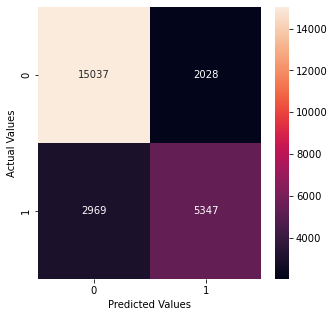

VIF values: 

const                                             402.301252
previous_cancellations_Zero_previous_cancelled      3.229309
previous_cancellations_Some_previous_cancelled      2.626601
avg_price_per_room                                  2.259855
repeated_guest                                      1.948278
market_segment_type_Offline                         1.625157
room_type_reserved_Room_Type 6                      1.580932
February to May                                     1.565178
September to November                               1.556152
children?                                           1.517115
sqrt_lead_time                                      1.504458
market_segment_type_Corporate                       1.479634
arcsinh_no_of_nights                                1.450553
room_type_reserved_Room_Type 4                      1.430446
December to January                                 1.425243
market_segment_type_Complementary                   1.395998
arrival_da

In [297]:
X_train3=X_train2.drop(['2018?'],axis=1)
logit_3=sm.Logit(y_train,X_train3.astype(float))
lg3=logit_3.fit(disp=False)
pred_train3 = lg3.predict(X_train3) > 0.5    #50% threshold
pred_train3 = np.round(pred_train3)

print(f"Metrics of the training set: \n\n {model_performance_classification_sklearn(lg3,X_train3,y_train)} \n")

cm2 = confusion_matrix(y_train, pred_train3)
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


vif_series3= pd.Series(
    [variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,    
)
print(f'VIF values: \n\n{vif_series3.sort_values(ascending=False)}\n')

## There are no more bad VIFs, the multicollinearity is taken care of. Let's check the summary again.

In [298]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:      booking_cancelled   No. Observations:                25381
Model:                          Logit   Df Residuals:                    25355
Method:                           MLE   Df Model:                           25
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                  0.3415
Time:                        17:14:52   Log-Likelihood:                -10570.
converged:                      False   LL-Null:                       -16053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             24.3858    4.5e+05   5.42e-05      1.000   -8.83e+05    8.83e+05
required_car_parking_sp

## Let's remove those bad P-Values.

                           Logit Regression Results                           
Dep. Variable:      booking_cancelled   No. Observations:                25381
Model:                          Logit   Df Residuals:                    25361
Method:                           MLE   Df Model:                           19
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                  0.3408
Time:                        17:14:52   Log-Likelihood:                -10582.
converged:                       True   LL-Null:                       -16053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
required_car_parking_space                        -1.5875      0.141    -11.287      0.000      -1.863      -1.312
sqrt_lead_time         

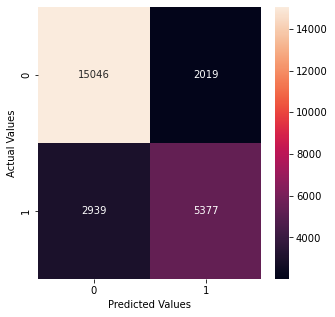

In [299]:
# initial list of columns
predictors = X_train3.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux.astype(float)).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

X_train4 = X_train[selected_features]

logit_4=sm.Logit(y_train,X_train4.astype(float))
lg4=logit_4.fit(disp=False)

print(lg4.summary())

pred_train4 = lg4.predict(X_train4) > 0.5    #50% threshold
pred_train4 = np.round(pred_train4)

print(f"Metrics of the training set: \n\n {model_performance_classification_sklearn(lg4,X_train4,y_train)} \n")

cm2 = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Now, we have our equation. Let's see the odds:

In [300]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns).T

required_car_parking_space  sqrt_lead_time  repeated_guest  \
Odds                           0.204433        1.333426        0.004282   
Change_odd%                  -79.556671       33.342578      -99.571780   

             avg_price_per_room  no_of_special_requests  weekend_booked?  \
Odds                   1.016530                0.218584         1.136924   
Change_odd%            1.652992              -78.141586        13.692373   

             arrival_day  children?  type_of_meal_plan_Meal Plan 2  \
Odds            1.001588   1.187941                       1.359615   
Change_odd%     0.158808  18.794059                      35.961480   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.256908                        0.768637   
Change_odd%                       25.690841                      -23.136314   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.759923                        0.441791   
Change_odd%                      -24.007652                      -55.820937   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.530564                        0.236263   
Change_odd%                      -46.943645                      -76.373704   

             market_segment_type_Corporate  market_segment_type_Offline  \
Odds                              0.438919                     0.170293   
Change_odd%                     -56.108052                   -82.970684   

             previous_cancellations_Zero_previous_cancelled  \
Odds                                               0.016063   
Change_odd%                                      -98.393735   

             December to January  February to May  
Odds                    0.197230         1.353124  
Change_odd%           -80.277027        35.312379

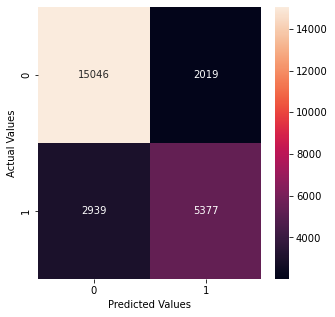

   Accuracy    Recall  Precision        F1
0  0.804657  0.646585   0.727015  0.684445


In [301]:
pred_train4 = lg4.predict(X_train4) > 0.5
pred_train4 = np.round(pred_train4)

cm4 = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(5,5))
sns.heatmap(cm4,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print(model_performance_classification_sklearn(lg4,X_train4,y_train))

## ROC Curve and the optimal threshold:

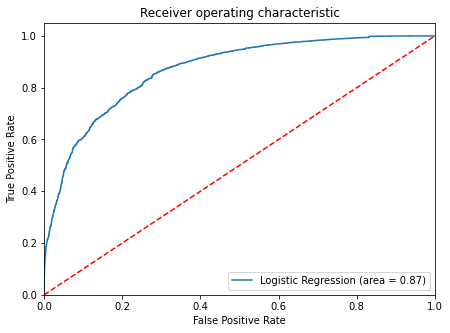

In [302]:
logit_roc_auc_train = roc_auc_score(y_train,lg4.predict(X_train4))
fpr,tpr,thresholds=roc_curve(y_train,lg4.predict(X_train4))

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend (loc="lower right")
plt.show()

### An area of .87 isn't bad.

In [303]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2684919588213633


# Trying the optimal threshold out:

In [304]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn(
    lg4, X_train4, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance: \n")

print(log_reg_model_train_perf_threshold_auc_roc)

Training performance: 

   Accuracy    Recall  Precision        F1
0   0.76313  0.852934   0.596953  0.702347


## 60% precision doesn't really inspire confidence, but seeeing as it's more costly to allow a guest to book in a situation where they wouldn't follow through, one could make a case for allowing such a large percentage of false positives.

### However, I am going to try to find a better balance of Recall and Precision:

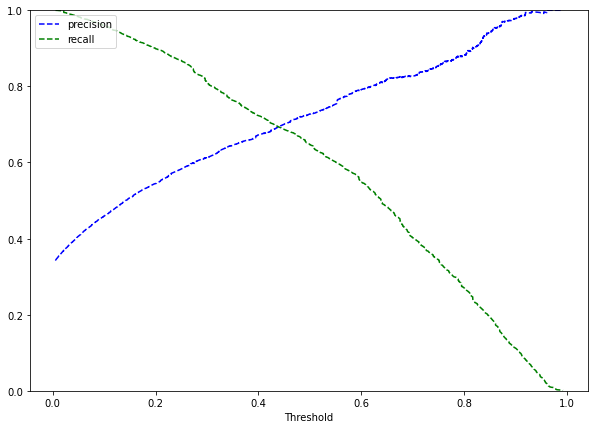

In [305]:
y_scores = lg4.predict(X_train4)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

## The threshold where precision and recall meet is between 0.4 and 0.5.

In [306]:
for ratio in [0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50]:
    print(f"The metrics for a threshold of {ratio} are: \n {model_performance_classification_sklearn(lg4,X_train4,y_train,threshold=ratio)}\n")

The metrics for a threshold of 0.4 are: 
    Accuracy    Recall  Precision        F1
0  0.793862  0.722944   0.672483  0.696801

The metrics for a threshold of 0.41 are: 
    Accuracy    Recall  Precision        F1
0  0.795319  0.718494   0.676747  0.696996

The metrics for a threshold of 0.42 are: 
    Accuracy    Recall  Precision       F1
0  0.795004  0.707191   0.679963  0.69331

The metrics for a threshold of 0.43 are: 
    Accuracy    Recall  Precision        F1
0  0.797565  0.699976   0.687736  0.693802

The metrics for a threshold of 0.44 are: 
    Accuracy    Recall  Precision        F1
0  0.800047  0.693122   0.695547  0.694332

The metrics for a threshold of 0.45 are: 
    Accuracy    Recall  Precision       F1
0  0.801229  0.686748    0.70065  0.69363

The metrics for a threshold of 0.46 are: 
    Accuracy    Recall  Precision        F1
0  0.802332  0.680976   0.705494  0.693018

The metrics for a threshold of 0.47 are: 
    Accuracy    Recall  Precision        F1
0  0.8048

# The most even Recall/Precision threshold is that of 0.44.
    At this threshold, both recall and precision are around 0.69.


---
# <span style='font-size:larger'> Model performance evaluation</span>

In [328]:
droppedcolumn=[]
for column in X.columns.tolist():
    if column not in X_train4.columns.tolist():
        droppedcolumn.append(column)
droppedcolumn


X_test2=X_test.drop(droppedcolumn,axis=1)


print('train set:\n',model_performance_classification_sklearn(lg4,X_train4,y_train),'\n')
print('test set:\n',model_performance_classification_sklearn(lg4,X_test2,y_test),'\n\n')
print('---\n')
print('train set with 0.28 threshold:\n',model_performance_classification_sklearn(lg4,X_train4,y_train,threshold=0.28),'\n')
print('test set with 0.28 threshold:\n',model_performance_classification_sklearn(lg4,X_test2,y_test,threshold=0.28),'\n\n')
print('---\n')
print('train set with 0.44 threshold:\n',model_performance_classification_sklearn(lg4,X_train4,y_train,threshold=0.44),'\n')
print('test set with 0.4 threshold:\n',model_performance_classification_sklearn(lg4,X_test2,y_test,threshold=0.44),'\n\n')
print('---\n')
oddsdata=pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train4.columns)
oddsdata

for entry in range(oddsdata.shape[0]):
    if oddsdata['Change_odd%'][entry] <0:
        print(f"{oddsdata.index[entry]} - as this variable increases, booking_cancelled decreases by {oddsdata['Change_odd%'][entry]}%.\n")
    else:
        print(f"{oddsdata.index[entry]} - as this variable increases, booking_cancelled increases by {oddsdata['Change_odd%'][entry]}%.\n")

train set:
    Accuracy    Recall  Precision        F1
0  0.804657  0.646585   0.727015  0.684445 

test set:
    Accuracy    Recall  Precision        F1
0    0.8041  0.641695   0.728112  0.682177 


---

train set with 0.28 threshold:
    Accuracy    Recall  Precision        F1
0  0.765967  0.834055    0.60334  0.700182 

test set with 0.28 threshold:
    Accuracy    Recall  Precision        F1
0  0.768524  0.838945   0.605999  0.703695 


---

train set with 0.44 threshold:
    Accuracy    Recall  Precision        F1
0  0.800047  0.693122   0.695547  0.694332 

test set with 0.4 threshold:
    Accuracy    Recall  Precision        F1
0  0.801618  0.688272   0.700857  0.694507 


---

required_car_parking_space - as this variable increases, booking_cancelled decreases by -79.5566705535321%.

sqrt_lead_time - as this variable increases, booking_cancelled increases by 33.34257750822065%.

repeated_guest - as this variable increases, booking_cancelled decreases by -99.57177976339379%.

av

## Our accuracy, recall, precision, and f1 in the train set are all within 0.006 of the test set.
### Along with our thresholds of .28 and .44, this is a fairly decent logistic regression model.
If the hotel owners are more concerned about the cancellations and want to avoid up  
to 85% of them (ie: if they believe that they can still book rooms at the same rate while avoiding 40% of people who wouldn't have cancelled), 0.28 is a good threshold for the booking_cancellation variable.  
  
If the hotel owners are more concerned about balancing precision and recall so they  
turn down as little business as possible, 0.44 is a good threshold.   
### The main downside of this model is the relatively low recall and precision. It might be possible to find a better model in a classification decision tree.

## Final Model Summary

### Actionable advice:
1) Incentivize guests to book for sooner dates. Each extra day in advance a guest books sees an increase in cancellations.  
2) Focus on gaining repeat guests, anyone who books more than once has a massive decrease in cancellation likelihood. This could be through exploring the Corporate market (which makes up a massive proportion of repeat guests), of by incentivizing repeat stays at the chain with complementary items like meal plans.  
3) Look into what special requests are being made. Each special request increases the likelihood of a no-cancel booking by a staggering 78%. Either the special requests are a solution to an overaching problem at the hotel, or being catered to specifically increases the likelihood of a booking honored.    
4) There wasn't enough data on Meal Plan 3 to give a conclusion, but Meal Plan 1 is by far the best one; Meal Plan 2 and no meal plan both increase the odds of a cancellation sizably. It may be wise to start having complementary breakfast to decrease cancellation rates.    
5) There also wasn't enough data on Room Type 3 to give conclusions, but Room Type 1 is by far the worst for cancellations. It may be wise to raise the price of Room Type 1 and lower the others to incentivize the booking of room types with better rates of cancellation (keep in mind, Room Type 1 is the most booked type and the second cheapest on average. Keeping Room Type 2 the cheapest and raising Room Type 1's price may help move more people to type 2 bookings, which reduces the odds of a cancellation by 25%). If Room Type 1 is simply the most common room type at the hotel chain, it may be wise to convert a proportion of these rooms to other types.      
6) Room type 5 and 7 are cancelled the least often. It may be smart to promote these types of room.  
7) Corporate and Offline markets cancel 50% and 80% less often (respectively) than all other market types. It may be smart to increase Corporate sales, as well as increase local advertising to make Offline/in-person bookings more frequent.  
8) Setting a maximum number of cancellations refundable per year per guest (say, 2) may help reduce the cost of a cancelled booking. However, I believe that's just a way to avoid the main issue of high cancellation rates in favor for a temporary solution to reduce costs. Cancellation rates are increasing day by day, so the problem will only get worse if it isn't focused on primarily.   
9) The months of December to January have 80% less cancellations, and months February to May have 35% more cancellations. December to January also have fewer bookings than the fall season, so it may be a good idea to incentivize booking these months over others, either with sales on rooms or better advertising during these months.  

### Insights:
Customers who need a parking space cancel 79% less often.  
Average room price rising slightly increases the odds of a cancellation.  
The original theory seems correct, time passing returns a slight increase in cancellation chance.  
Guests with children have an 18% higher chance to cancel.  
Guests who have never cancelled before have good odds of not cancelling in the future.  



---
---
---
# <span style ='font-size:larger'>Building a Decision Tree model</span>
### Let's pull the hotel_tree dataframe I saved back up.

In [340]:
hotel_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36259 non-null  int64   
 1   no_of_children                        36259 non-null  int64   
 2   type_of_meal_plan                     36259 non-null  category
 3   required_car_parking_space            36259 non-null  int64   
 4   room_type_reserved                    36259 non-null  category
 5   lead_time                             36259 non-null  int64   
 6   arrival_year                          36259 non-null  int64   
 7   arrival_month                         36259 non-null  int64   
 8   market_segment_type                   36259 non-null  category
 9   repeated_guest                        36259 non-null  int64   
 10  avg_price_per_room                    36259 non-null  float64 
 11  no

## Let's repeat some of the logistic transformations, but only the ones that will help us on the tree.

In [341]:
bin_year=[] #year to binary column
for entry in range(hotel_tree.shape[0]):
    if hotel_tree['arrival_year'][entry]==2018:
        bin_year.append(1)
    else:
        bin_year.append(0)

hotel_tree['2018?']=bin_year
hotel_tree.drop('arrival_year',axis=1,inplace=True)
del bin_year

## Let's encode type_of_meal_plan and room_type_reserved as integers to preserve their order.
    Market_segment_type can become onehotencoded, they don't have an order specified.

In [342]:
replaceStruct = {
    "type_of_meal_plan":     {'Not Selected':-1,'Meal Plan 1':1,'Meal Plan 2':2},
    "room_type_reserved": {'Room_Type 1':1,'Room_Type 2':2,'Room_Type 4':4,'Room_Type 5':5,'Room_Type 6':6,'Room_Type 7':7},
    }
oneHotCols=["market_segment_type"]

hotel_tree=hotel_tree.replace(replaceStruct)
hotel_tree=pd.get_dummies(hotel_tree)

---
# Creating the model:

In [343]:
X= hotel_tree.drop('booking_cancelled',axis=1)
y= hotel_tree.pop('booking_cancelled')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

dTree=DecisionTreeClassifier(criterion = 'gini',random_state=1)
dTree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [364]:
def model_performance_classification_tree(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [367]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X   (like a decision tree/pred_train)
    y_actual : ground truth   (like y_test/y_train)
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [365]:
model_performance_classification_tree(dTree,X_train,y_train)

Accuracy    Recall  Precision        F1
0  0.994169  0.986766   0.995388  0.991058

In [366]:
model_performance_classification_tree(dTree,X_test,y_test)

Accuracy    Recall  Precision        F1
0  0.864957  0.800729   0.790318  0.795489

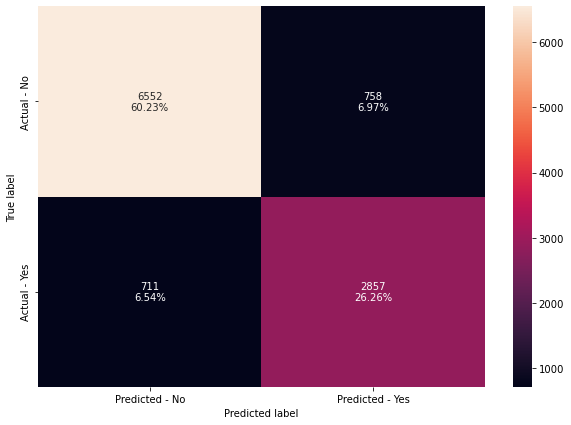

In [368]:
make_confusion_matrix(dTree,y_test)

## These are not great scores on the test set; they're much worse than the train set. This implies a large level of . Let's make a decision tree:

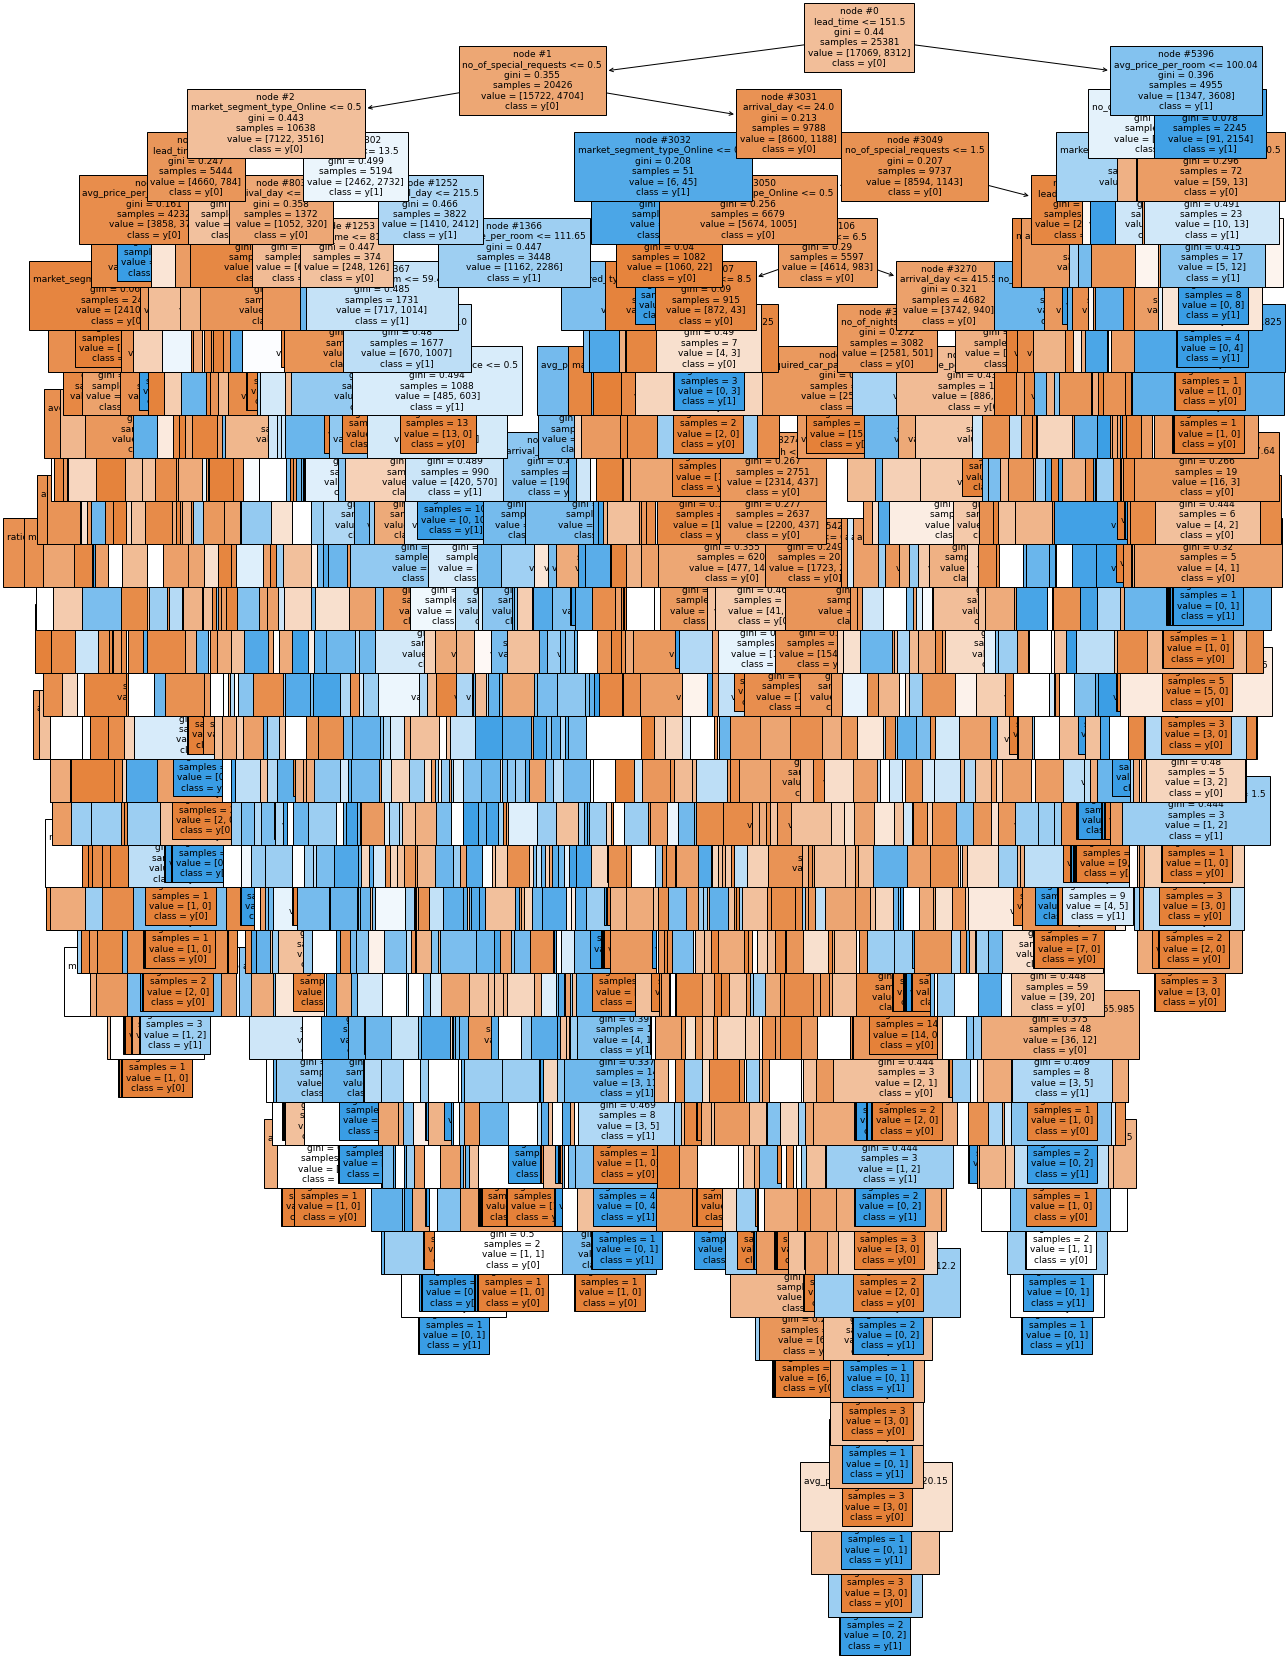

In [369]:
plt.figure(figsize=(20,30)) #you NEED to use figsize here, because otherwise it
                            #won't scale the arrows/'branches' and it will look like shit

tree.plot_tree(dTree,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [374]:
print(pd.DataFrame(dTree.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
        by='Imp',ascending=False))

                                           Imp
lead_time                             0.357816
avg_price_per_room                    0.166551
arrival_day                           0.147730
market_segment_type_Online            0.095826
no_of_special_requests                0.068606
no_of_nights                          0.050685
arrival_month                         0.032228
no_of_adults                          0.027092
weekend_booked?                       0.017310
room_type_reserved                    0.011018
type_of_meal_plan                     0.009611
required_car_parking_space            0.005816
no_of_children                        0.005000
market_segment_type_Offline           0.001582
2018?                                 0.001263
market_segment_type_Corporate         0.000713
market_segment_type_Aviation          0.000530
no_of_previous_bookings               0.000341
ratio_of_previous_bookings_cancelled  0.000146
market_segment_type_Complementary     0.000136
repeated_gues

#### Lead time is the most gini-important train, followed by average price and arrival day.

# Do we need to prune the tree?
    Yeah, probably a lot.

---
# Pre-Pruning
### Create a set of hyperparameters to adjust in GridSearchCV.
    Many variations were tested, and the best hyperparameter grid search is shown below:

In [383]:
# Choose the type of classifier. We're using the decision tree since it's what we created at the start.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from (these are what we can adjust to look more closely at certain hyperparameter ranges)
    # make sure you don't get too narrow in range with these, the more you have the better the results.
## add from article
parameters = {'class_weight': [None,"balanced"],
              'max_depth': np.arange(5,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20], #minimum number of samples at each leaf node.
              'min_samples_split': [4,6,8,10,15,20,25,30], #minimum number of samples required to split a leaf node.
              'min_impurity_decrease': [0.001,0.01,0.1] 
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score) #recall score is used, we can insert any scoring method we need

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_impurity_decrease=0.001, min_samples_leaf=15,
                       min_samples_split=4, random_state=1)

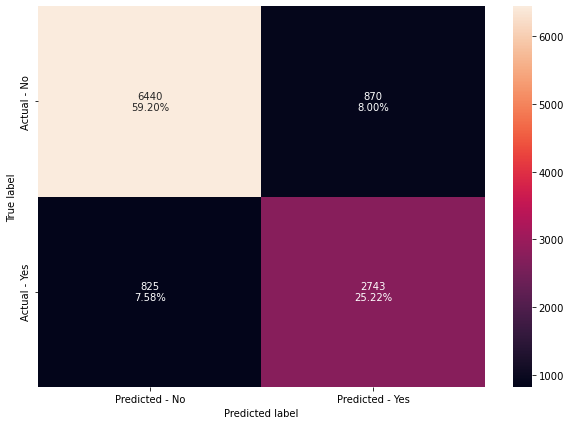

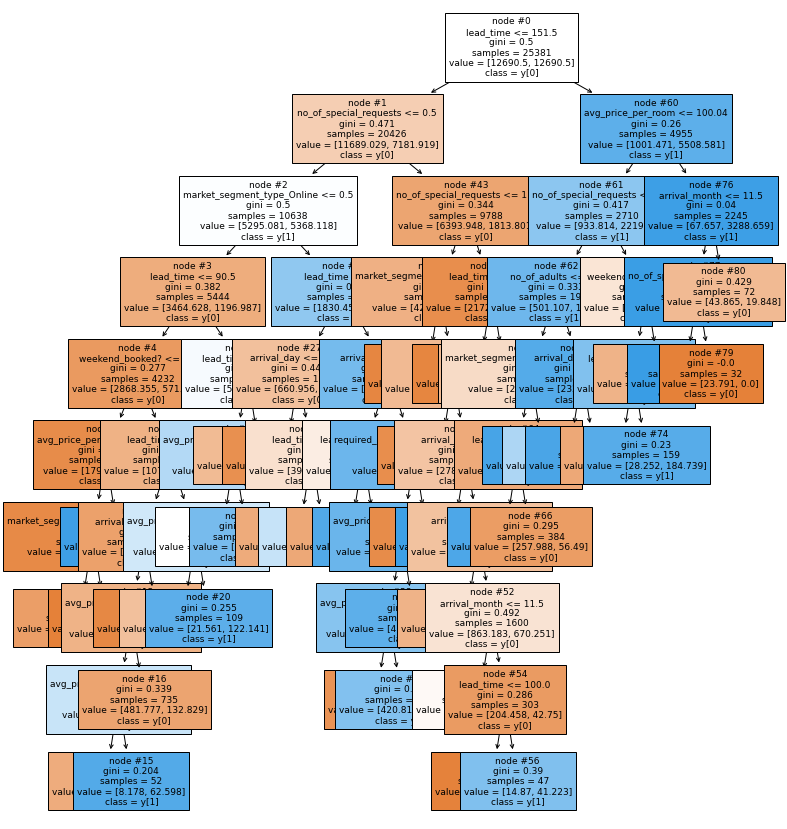

train performance: 
   Accuracy    Recall  Precision        F1
0   0.84977  0.775987   0.767766  0.771854


test performance: 
   Accuracy    Recall  Precision       F1
0  0.844181  0.768778   0.759203  0.76396


                                           Imp
lead_time                             0.473295
market_segment_type_Online            0.180847
no_of_special_requests                0.157553
avg_price_per_room                    0.073626
arrival_day                           0.039460
no_of_adults                          0.024128
weekend_booked?                       0.020851
arrival_month                         0.019323
required_car_parking_space            0.006213
market_segment_type_Offline           0.004702
repeated_guest                        0.000000
room_type_reserved                    0.000000
no_of_children                        0.000000
no_of_previous_bookings               0.000000
ratio_of_previous_bookings_cancelled  0.000000
type_of_meal_plan                  

In [463]:
make_confusion_matrix(estimator,y_test)

plt.figure(figsize=(12,15)) #you NEED to use figsize here, because otherwise it
                            #won't scale the arrows/'branches' and it will look like shit

tree.plot_tree(estimator,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()


print(f"train performance: \n{model_performance_classification_tree(estimator, X_train, y_train)}\n\n")
print(f"test performance: \n{model_performance_classification_tree(estimator, X_test, y_test)}\n\n")

print(pd.DataFrame(estimator.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False))

## The train and test metrics are very close now, and while the train/test metrics have all decreased, they did not decrease by that much.
## Lead time is still the most heavily weighted metric in the tree, but it is now followed by Online markets and number of special requests, both of which I have been fairly certain about their effect on cancellation.
    See bivariate analysis for markets and special requests.
#### For reference below: original dTree metrics

In [468]:
print(f"Pre-Prune train performance: \n{model_performance_classification_tree(estimator, X_train, y_train)}\n\n")
print(f"Pre-Prune dTree test performance: \n{model_performance_classification_tree(estimator, X_test, y_test)}\n\n\n\n")

print(f"Original dTree train performance: \n{model_performance_classification_tree(dTree, X_train, y_train)}\n\n")
print(f"Original dTree test performance: \n{model_performance_classification_tree(dTree, X_test, y_test)}\n\n")

print(pd.DataFrame(dTree.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False))

Pre-Prune train performance: 
   Accuracy    Recall  Precision        F1
0   0.84977  0.775987   0.767766  0.771854


Pre-Prune dTree test performance: 
   Accuracy    Recall  Precision       F1
0  0.844181  0.768778   0.759203  0.76396




Original dTree train performance: 
   Accuracy    Recall  Precision        F1
0  0.994169  0.986766   0.995388  0.991058


Original dTree test performance: 
   Accuracy    Recall  Precision        F1
0  0.864957  0.800729   0.790318  0.795489


                                           Imp
lead_time                             0.357816
avg_price_per_room                    0.166551
arrival_day                           0.147730
market_segment_type_Online            0.095826
no_of_special_requests                0.068606
no_of_nights                          0.050685
arrival_month                         0.032228
no_of_adults                          0.027092
weekend_booked?                       0.017310
room_type_reserved                    0.0110

# So, for pre-pruning, our best hyperparameters are as follows:
    class_weight='balanced',
    max_depth=9,
    min_impurity_decrease=0.001
    min_samples_leaf=15,
    min_samples_split=4,
    random_state=1
### Our pre-prune tree is already better than our logistic regression. Let's check Post-Pruning next.
---
# Post-Pruning
    via cost-complexity

        ccp_alphas  impurities
0     0.000000e+00    0.007497
1     2.333924e-07    0.007497
2     2.462472e-07    0.007498
3     2.575134e-07    0.007498
4     4.377728e-07    0.007498
...            ...         ...
1351  7.074626e-03    0.284566
1352  1.259205e-02    0.297158
1353  1.730648e-02    0.314465
1354  2.406520e-02    0.362595
1355  7.788461e-02    0.440480

[1356 rows x 2 columns]


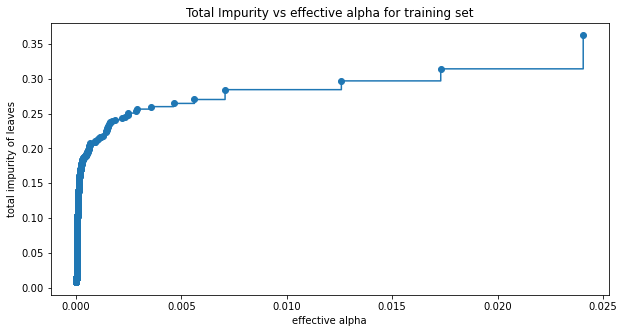

In [390]:
clf = DecisionTreeClassifier(random_state=1) #classifier = clf
path= clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities= path.ccp_alphas,path.impurities

print(pd.DataFrame(path))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

# Check to make sure the most impure node is the root node:

In [391]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07788461045774664


## Remove that 1 node row:

In [392]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

## And find the optimal level of alpha for our Recall:

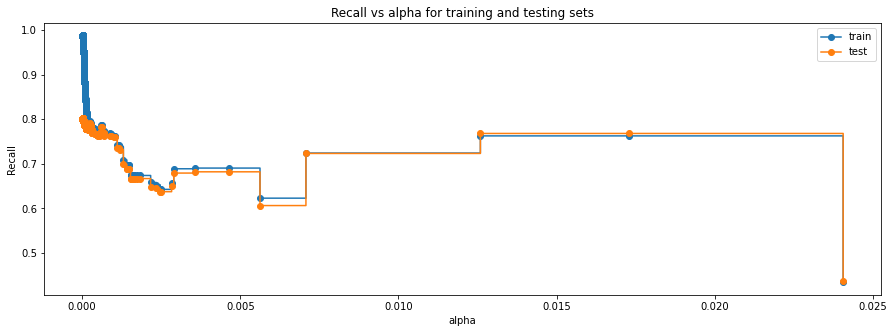

In [393]:
recall_train=[]
for clf in clfs:
    pred_train5=clf.predict(X_train) #using 5 so I don't overwrite any variables in my previous logistic regression
    values_train=metrics.recall_score(y_train,pred_train5)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test5=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test5)
    recall_test.append(values_test)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [394]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.4245877443150983e-05, random_state=1)


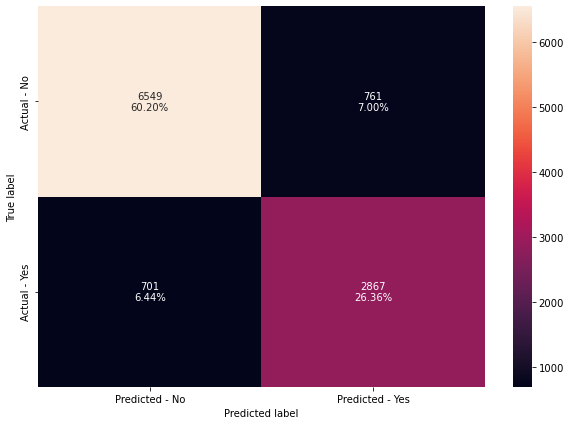

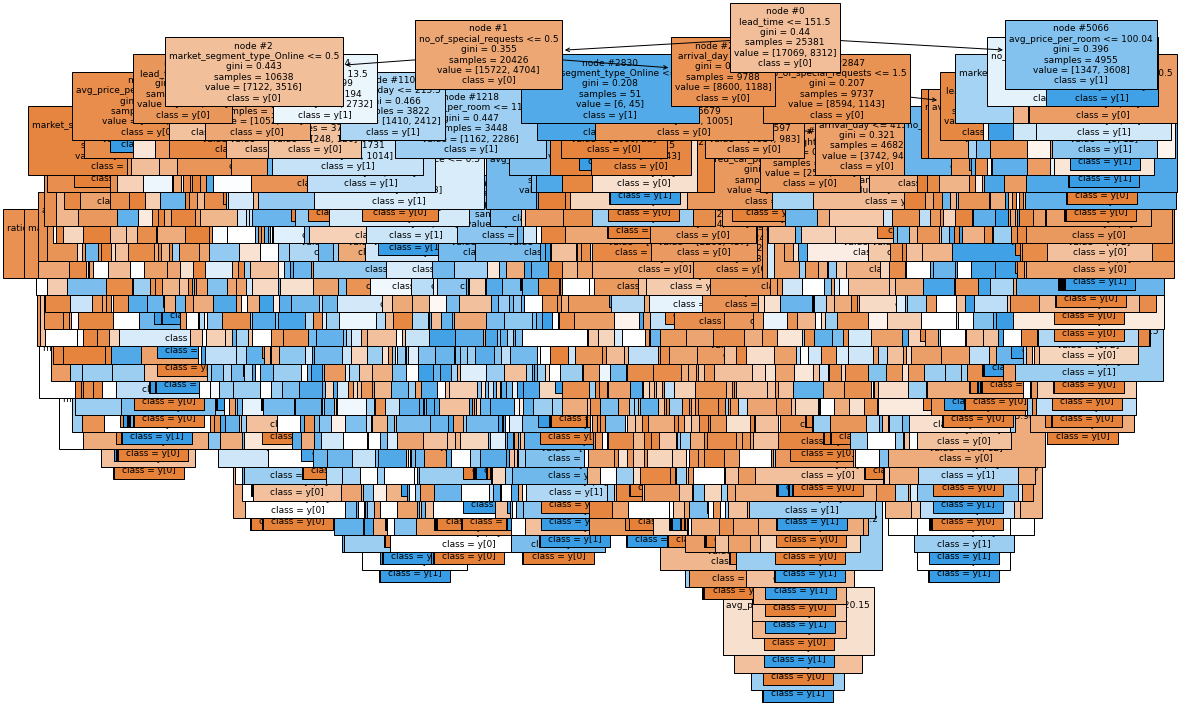

train performance: 
   Accuracy    Recall  Precision       F1
0  0.993341  0.987488   0.992143  0.98981


test performance: 
   Accuracy    Recall  Precision        F1
0    0.8656  0.803531   0.790243  0.796832


                                           Imp
lead_time                             0.358493
avg_price_per_room                    0.166193
arrival_day                           0.147493
market_segment_type_Online            0.096394
no_of_special_requests                0.068988
no_of_nights                          0.050453
arrival_month                         0.032035
no_of_adults                          0.026921
weekend_booked?                       0.017051
room_type_reserved                    0.011018
type_of_meal_plan                     0.009509
required_car_parking_space            0.005850
no_of_children                        0.005014
market_segment_type_Offline           0.001555
2018?                                 0.001195
market_segment_type_Corporate      

In [395]:
make_confusion_matrix(best_model,y_test)

plt.figure(figsize=(18,12)) #you NEED to use figsize here, because otherwise it
                            #won't scale the arrows/'branches' and it will look like shit

tree.plot_tree(best_model,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

print(f"train performance: \n{model_performance_classification_tree(best_model, X_train, y_train)}\n\n")
print(f"test performance: \n{model_performance_classification_tree(best_model, X_test, y_test)}\n\n")

print(pd.DataFrame(best_model.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False))

## Unfortunately, because test recall is higher at low alphas (we saw this in pre-pruning), we need to cut out low alphas to find a tree fit that better generalizes.
   
## Look at the plot again, the test line starts off strong, dips, but then comes back up as the model becomes better at generalizing.

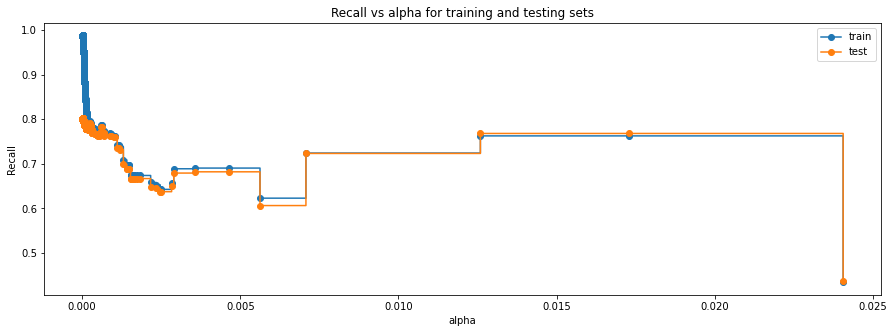

In [405]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### Let's try cutting out alphas below 0.0002:

In [506]:
pd.DataFrame(path)['ccp_alphas'][pd.DataFrame(path)['ccp_alphas']>0.0002].head()


1242    0.000206
1243    0.000206
1244    0.000207
1245    0.000208
1246    0.000210
Name: ccp_alphas, dtype: float64

#### The first value of ccp_alphas<0.0002 is at index 1242. So lets make a new clfs slice starting at 1242:

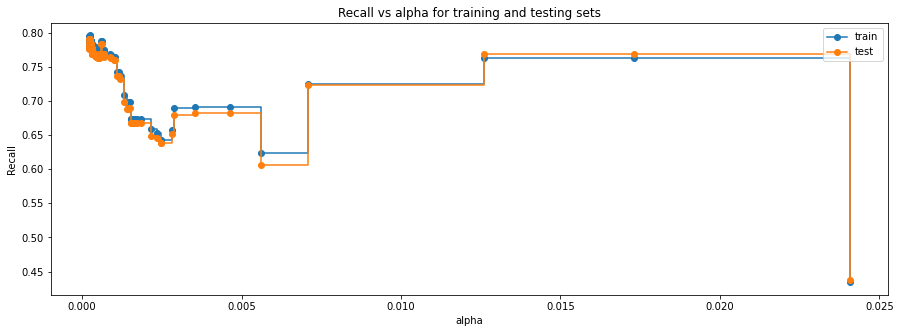

In [507]:
clfs2 = clfs[1242:]
ccp_alphas2 = ccp_alphas[1242:]

recall_train=[]
for clf in clfs2:
    pred_train5=clf.predict(X_train) #using 5 so I don't overwrite any variables in my previous logistic regression
    values_train=metrics.recall_score(y_train,pred_train5)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs2:
    pred_test5=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test5)
    recall_test.append(values_test)

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas2, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas2, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [508]:
index_best_model2 = np.argmax(recall_test)
best_model2 = clfs2[index_best_model2]
print(best_model2)

DecisionTreeClassifier(ccp_alpha=0.00023461010922379982, random_state=1)


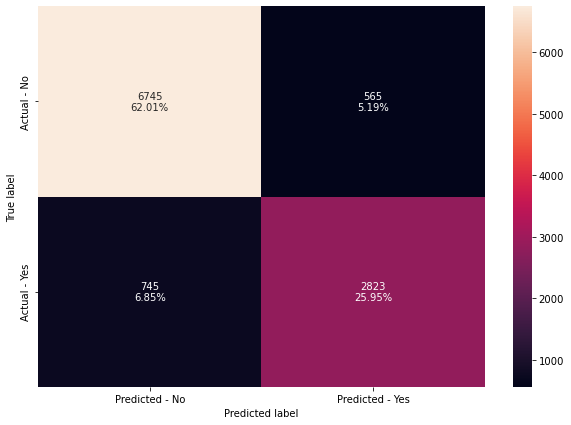

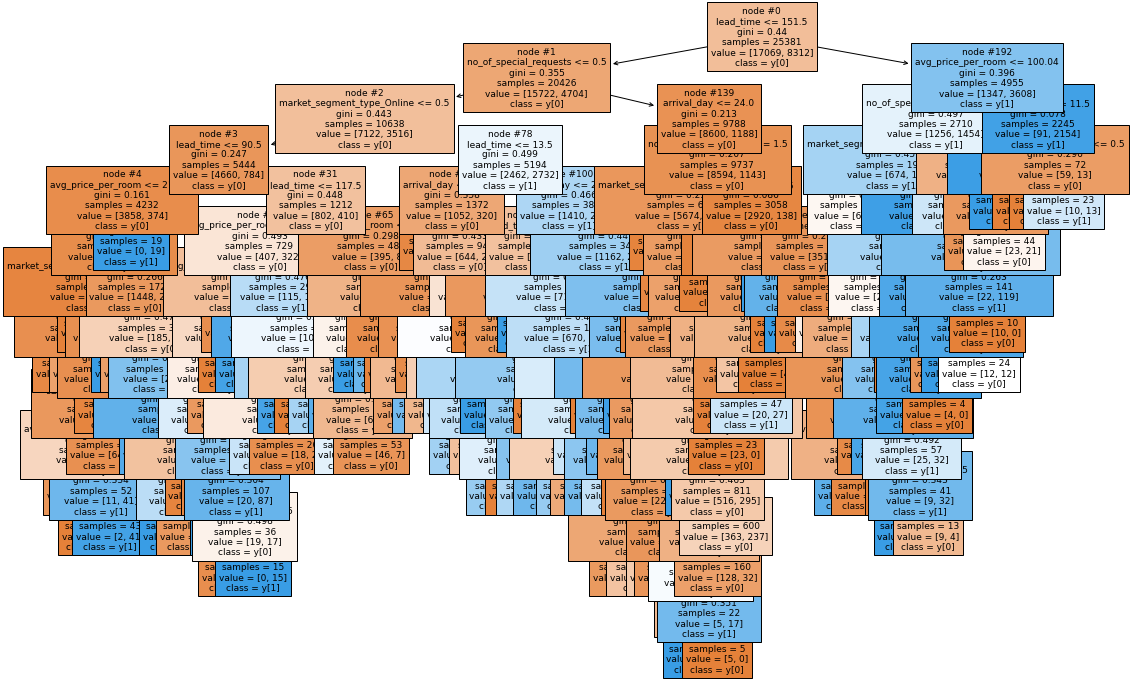

train performance: 
   Accuracy    Recall  Precision        F1
0  0.881526  0.795837     0.8347  0.814806


test performance: 
   Accuracy  Recall  Precision        F1
0  0.879573  0.7912   0.833235  0.811673


                                           Imp
lead_time                             0.420507
market_segment_type_Online            0.153777
avg_price_per_room                    0.142775
no_of_special_requests                0.109599
arrival_day                           0.078071
arrival_month                         0.030866
no_of_adults                          0.023803
no_of_nights                          0.014089
weekend_booked?                       0.013231
required_car_parking_space            0.008348
type_of_meal_plan                     0.001955
market_segment_type_Offline           0.001710
room_type_reserved                    0.001269
repeated_guest                        0.000000
no_of_children                        0.000000
no_of_previous_bookings              

In [509]:
make_confusion_matrix(best_model2,y_test)

plt.figure(figsize=(18,12)) #you NEED to use figsize here, because otherwise it
                            #won't scale the arrows/'branches' and it will look like shit

tree.plot_tree(best_model2,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

print(f"train performance: \n{model_performance_classification_tree(best_model2, X_train, y_train)}\n\n")
print(f"test performance: \n{model_performance_classification_tree(best_model2, X_test, y_test)}\n\n")

print(pd.DataFrame(best_model2.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False))

---
# Model Performance Comparison and Conclusions

### Our post-pruning tree is slightly better than the prepruned tree, with recall and precision 0.02-0.08 higher.
#### For reference, the pre-prune tree metrics below:

In [466]:
print(f"Pre-Prune train performance: \n{model_performance_classification_tree(estimator, X_train, y_train)}\n\n")
print(f"Pre-Prune test performance: \n{model_performance_classification_tree(estimator, X_test, y_test)}\n\n\n\n")


print(f"Post-Prune train performance: \n{model_performance_classification_tree(best_model2, X_train, y_train)}\n\n")
print(f"Post-Prune test performance: \n{model_performance_classification_tree(best_model2, X_test, y_test)}")

Pre-Prune train performance: 
   Accuracy    Recall  Precision        F1
0   0.84977  0.775987   0.767766  0.771854


Pre-Prune test performance: 
   Accuracy    Recall  Precision       F1
0  0.844181  0.768778   0.759203  0.76396




Post-Prune train performance: 
   Accuracy    Recall  Precision        F1
0  0.881526  0.795837     0.8347  0.814806


Post-Prune test performance: 
   Accuracy  Recall  Precision        F1
0  0.879573  0.7912   0.833235  0.811673


## Seeing as the Post-Prune tree is better in every metric, we will use the Post-Prune tree for our  final Decision Tree Conclusions.

All independent variables that remain in the data, in order of Gini Importance:


['lead_time',
 'market_segment_type_Online',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_day',
 'arrival_month',
 'no_of_adults',
 'no_of_nights',
 'weekend_booked?',
 'required_car_parking_space',
 'type_of_meal_plan',
 'market_segment_type_Offline',
 'room_type_reserved']

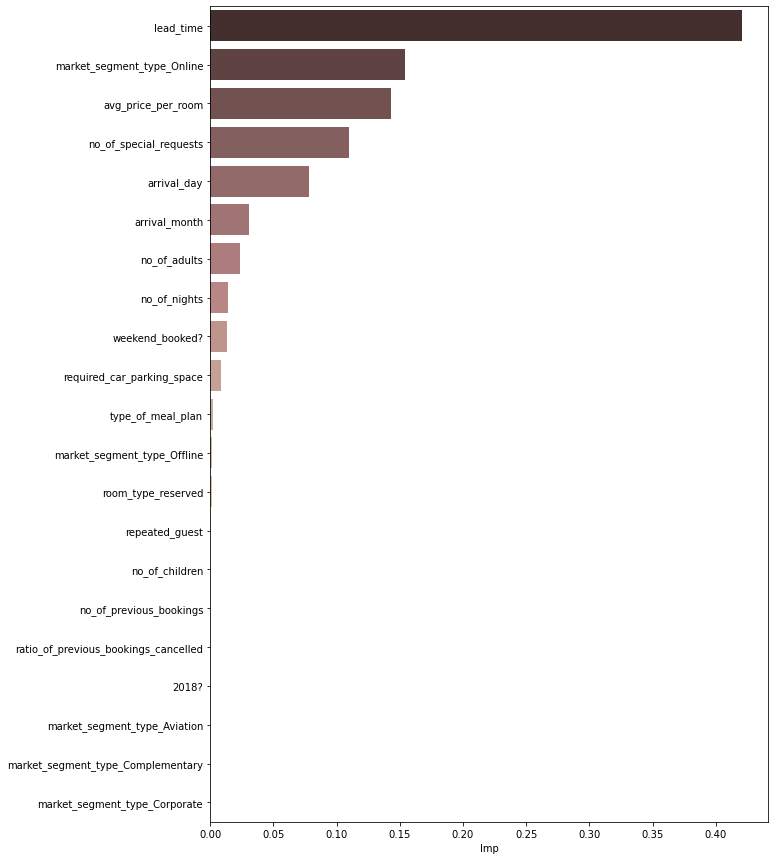

In [498]:
sns.barplot(data=pd.DataFrame(best_model2.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False),x='Imp',y=pd.DataFrame(best_model2.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False).index.values.tolist(),palette='pink')
plt.gcf().set_size_inches(10,15)

independentvariables=pd.DataFrame(best_model2.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False)['Imp'][pd.DataFrame(best_model2.feature_importances_,columns=["Imp"],index=X_train.columns).sort_values(
    by='Imp',ascending=False)['Imp']>0].index.values.tolist()
print('All independent variables that remain in the data, in order of Gini Importance:')
independentvariables

## So, our most gini-important independent variables are lead time, Online market, and average room price.
## Below is a text-based decision tree.

In [595]:
print(tree.export_text(best_model2,feature_names=list(X.columns),show_weights=True,max_depth=17))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 215.61
|   |   |   |   |   |--- weekend_booked? <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |--- weights: [517.00, 30.00] class: 0
|   |   |   |   |   |   |   |--- avg_price_per_room >  88.60
|   |   |   |   |   |   |   |   |--- weights: [205.00, 53.00] class: 0
|   |   |   |   |   |   |--- market_segment_type_Offline >  0.50
|   |   |   |   |   |   |   |--- weights: [1688.00, 0.00] class: 0
|   |   |   |   |   |--- weekend_booked? >  0.50
|   |   |   |   |   |   |--- lead_time <= 65.50
|   |   |   |   |   |   |   |--- no_of_nights <= 14.50
|   |   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.40
|   |   |  

## An example of decision-making off of this tree:
#### If lead time is at or below 151.50 days,
    if number of special requests is 0,
        if the market type is any besides Online,
            if the lead time is even lower, 90.5 days or lower,
                if average price is at or below 215.61, and
                    if weekend days are NOT booked, then
                    
                    the guest will NOT cancel.
## I have made this tree into a user defined function:

In [596]:
def decisiontreeanswer(lead_time, 
market_segment_type_Online, 
avg_price_per_room, 
no_of_special_requests, 
arrival_day, 
arrival_month,
no_of_adults,
no_of_nights,
weekend_booked, 
required_car_parking_space,
type_of_meal_plan,
market_segment_type_Offline,
room_type_reserved):
    
    if lead_time <= 151.50:
        if no_of_special_requests <= 0.50:
            if market_segment_type_Online <= 0.50:
                if lead_time <= 90.50:
                    if avg_price_per_room <= 215.61:
                        if weekend_booked <= 0.50:
                            if market_segment_type_Offline <= 0.50: 
                                if avg_price_per_room <= 88.60:
                                    print('The booking will not be cancelled.')
                                elif avg_price_per_room >  88.60:
                                    print('The booking will not be cancelled.')
                            elif market_segment_type_Offline >  0.50:
                                    print('The booking will not be cancelled.')
                        elif weekend_booked >  0.50:
                            if lead_time <= 65.50:
                                if no_of_nights <= 14.50:
                                    if arrival_month <= 9.50:
                                        if avg_price_per_room <= 62.40:
                                            if avg_price_per_room <= 59.75:
                                                print('The booking will not be cancelled.')
                                            elif avg_price_per_room > 59.75:
                                                if arrival_day <= 208.00:
                                                    print('The booking will not be cancelled.')
                                                if arrival_day >  208.00:
                                                    print('The booking will be cancelled.')
                                        elif avg_price_per_room >  62.40:
                                            print('The booking will not be cancelled.')
                                    elif arrival_month >  9.50:
                                        print('The booking will not be cancelled.')
                                elif no_of_nights >  14.50:
                                    print('The booking will be cancelled.')
                            elif lead_time >  65.50:
                                if avg_price_per_room <= 98.45:
                                    print('The booking will not be cancelled.')
                                elif avg_price_per_room >  98.45:
                                    if arrival_day <= 252.00:
                                        print('The booking will not be cancelled.')
                                    elif arrival_day >  252.00:
                                        if avg_price_per_room <= 132.43:
                                            print('The booking will be cancelled.')
                                        elif avg_price_per_room >  132.43:
                                            print('The booking will not be cancelled.')
                    elif avg_price_per_room >  215.61:
                        print('The booking will be cancelled.')
                elif lead_time >  90.50:
                    if lead_time <= 117.50:
                        if avg_price_per_room <= 93.58:
                            if avg_price_per_room <= 80.12:
                                if arrival_month <= 11.50:
                                    if arrival_day <= 368.50:
                                        if arrival_month <= 3.50:
                                            if avg_price_per_room <= 73.50:
                                                if no_of_adults <= 1.50:
                                                    print('The booking will be cancelled.')
                                                elif no_of_adults >  1.50:
                                                    print('The booking will not be cancelled.')
                                            elif avg_price_per_room >  73.50:
                                                print('The booking will not be cancelled.')
                                        elif arrival_month >  3.50:
                                            if arrival_day <= 103.50:
                                                print('The booking will not be cancelled.')
                                            elif arrival_day >  103.50:
                                                if arrival_day <= 286.00:
                                                    print('The booking will be cancelled.')
                                                elif arrival_day >  286.00:
                                                    if arrival_day <= 336.50:
                                                        print('The booking will not be cancelled.')
                                                    elif arrival_day >  336.50:
                                                        print('The booking will be cancelled.')
                                    elif arrival_day >  368.50:
                                        print('The booking will not be cancelled.')
                                elif arrival_month >  11.50:
                                    print('The booking will not be cancelled.')
                            elif avg_price_per_room >  80.12:
                                print('The booking will not be cancelled.')
                        elif avg_price_per_room >  93.58:
                            if arrival_month <= 5.50:
                                if no_of_nights <= 3.50:
                                    print('The booking will be cancelled.')
                                elif no_of_nights >  3.50:
                                    print('The booking will not be cancelled.')
                            elif arrival_month >  5.50:
                                if avg_price_per_room <= 108.50:
                                    if arrival_month <= 9.50:
                                        if avg_price_per_room <= 97.33:
                                            print('The booking will be cancelled.')
                                        elif avg_price_per_room >  97.33:
                                            print('The booking will not be cancelled.')
                                    elif arrival_month >  9.50:
                                        print('The booking will be cancelled.')
                                elif avg_price_per_room >  108.50:
                                    if avg_price_per_room <= 109.50:
                                        print('The booking will not be cancelled.')
                                    elif avg_price_per_room >  109.50:
                                        print('The booking will be cancelled.')
                    elif lead_time >  117.50:
                        if avg_price_per_room <= 89.88:
                            print('The booking will not be cancelled.')
                        elif avg_price_per_room >  89.88:
                            if avg_price_per_room <= 96.45:
                                if lead_time <= 145.50:
                                    if lead_time <= 121.50:
                                        print('The booking will be cancelled.')
                                    elif lead_time >  121.50:
                                        if arrival_day <= 56.50:
                                            print('The booking will be cancelled.')
                                        elif arrival_day >  56.50:
                                            print('The booking will not be cancelled.')
                                elif lead_time >  145.50:
                                    print('The booking will be cancelled.')
                            elif avg_price_per_room >  96.45:
                                if no_of_nights <= 1.50:
                                    print('The booking will be cancelled.')
                                elif no_of_nights >  1.50:
                                    print('The booking will not be cancelled.')
            elif market_segment_type_Online >  0.50:
                if lead_time <= 13.50:
                    if arrival_day <= 217.50:
                        print('The booking will not be cancelled.')
                    elif arrival_day >  217.50:
                        if lead_time <= 2.50:
                            if avg_price_per_room <= 202.67:
                                if arrival_day <= 246.50:
                                    if arrival_day <= 242.50:
                                        print('The booking will not be cancelled.')
                                    elif arrival_day >  242.50:
                                        print('The booking will be cancelled.')
                                elif arrival_day >  246.50:
                                    print('The booking will not be cancelled.')
                            elif avg_price_per_room >  202.67:
                                print('The booking will be cancelled.')
                        elif lead_time >  2.50:
                            if arrival_day <= 515.50:
                                if avg_price_per_room <= 119.35:
                                    if no_of_nights <= 2.50:
                                        print('The booking will not be cancelled.')
                                    elif no_of_nights >  2.50:
                                        print('The booking will be cancelled.')
                                elif avg_price_per_room >  119.35:
                                    if avg_price_per_room <= 195.50:
                                        if arrival_day <= 445.50:
                                            print('The booking will be cancelled.')
                                        elif arrival_day >  445.50:
                                            print('The booking will not be cancelled.')
                                    elif avg_price_per_room >  195.50:
                                        print('The booking will be cancelled.')
                            elif arrival_day >  515.50:
                                print('The booking will not be cancelled.')
                elif lead_time >  13.50:
                    if arrival_day <= 215.50:
                        if lead_time <= 81.50:
                            if avg_price_per_room <= 204.58:
                                if arrival_day <= 24.50:
                                    print('The booking will be cancelled.')
                                elif arrival_day >  24.50:
                                    print('The booking will not be cancelled.')
                            elif avg_price_per_room >  204.58:
                                print('The booking will be cancelled.')
                        elif lead_time >  81.50:
                            print('The booking will be cancelled.')
                    elif arrival_day >  215.50:
                        if avg_price_per_room <= 111.65:
                            if avg_price_per_room <= 59.43:
                                print('The booking will not be cancelled.')
                            elif avg_price_per_room >  59.43:
                                if type_of_meal_plan <= 0.00:
                                    if required_car_parking_space <= 0.50:
                                        if lead_time <= 25.50:
                                            if arrival_month <= 11.50:
                                                print('The booking will be cancelled.')
                                            elif arrival_month >  11.50:
                                                print('The booking will not be cancelled.')
                                        elif lead_time >  25.50:
                                            if arrival_day <= 323.50:
                                                print('The booking will be cancelled.')
                                            elif arrival_day >  323.50:
                                                print('The booking will be cancelled.')
                                    elif required_car_parking_space >  0.50:
                                        print('The booking will not be cancelled.')
                                elif type_of_meal_plan >  0.00:
                                    if required_car_parking_space <= 0.50:
                                        if avg_price_per_room <= 71.80:
                                            if avg_price_per_room <= 65.81:
                                                print('The booking will be cancelled.')
                                            elif avg_price_per_room >  65.81:
                                                print('The booking will not be cancelled.')
                                        elif avg_price_per_room >  71.80:
                                            print('The booking will be cancelled.')
                                    elif required_car_parking_space >  0.50:
                                        print('The booking will not be cancelled.')
                        elif avg_price_per_room >  111.65:
                            if required_car_parking_space <= 0.50:
                                if arrival_day <= 481.50:
                                    if avg_price_per_room <= 195.12:
                                        if lead_time <= 53.50:
                                            if arrival_day <= 374.50:
                                                print('The booking will be cancelled.')
                                            elif arrival_day >  374.50:
                                                print('The booking will be cancelled.')
                                        elif lead_time >  53.50:
                                            print('The booking will be cancelled.')
                                    elif avg_price_per_room >  195.12:
                                        print('The booking will be cancelled.')
                                elif arrival_day >  481.50:
                                    print('The booking will be cancelled.')
                            elif required_car_parking_space >  0.50:
                                print('The booking will not be cancelled.')
        elif no_of_special_requests >  0.50:
            if arrival_day <= 24.00:
                print('The booking will be cancelled.')
            elif arrival_day >  24.00:
                if no_of_special_requests <= 1.50:
                    if market_segment_type_Online <= 0.50:
                        print('The booking will not be cancelled.')
                    elif market_segment_type_Online >  0.50:
                        if lead_time <= 6.50:
                            print('The booking will not be cancelled.')
                        elif lead_time >  6.50:
                            if arrival_day <= 415.50:
                                if no_of_nights <= 9.50:
                                    if required_car_parking_space <= 0.50:
                                        if lead_time <= 133.50:
                                            if arrival_month <= 1.50:
                                                print('The booking will not be cancelled.')
                                            elif arrival_month >  1.50:
                                                if arrival_month <= 3.50:
                                                    if avg_price_per_room <= 89.45:
                                                        print('The booking will not be cancelled.')
                                                    elif avg_price_per_room >  89.45:
                                                        print('The booking will not be cancelled.')
                                                elif arrival_month >  3.50:
                                                    if arrival_day <= 63.50:
                                                        print('The booking will not be cancelled.')
                                                    elif arrival_day >  63.50:
                                                        print('The booking will not be cancelled.')
                                        elif lead_time >  133.50:
                                            print('The booking will not be cancelled.')
                                    elif required_car_parking_space >  0.50:
                                        print('The booking will not be cancelled.')
                                elif no_of_nights >  9.50:
                                    print('The booking will be cancelled.')
                            elif arrival_day >  415.50:
                                if arrival_month <= 11.50:
                                    if avg_price_per_room <= 107.06:
                                        print('The booking will not be cancelled.')
                                    elif avg_price_per_room >  107.06:
                                        if required_car_parking_space <= 0.50:
                                            if avg_price_per_room <= 107.26:
                                                print('The booking will be cancelled.')
                                            if avg_price_per_room >  107.26:
                                                if lead_time <= 22.50:
                                                    if no_of_nights <= 1.50:
                                                        if arrival_day <= 490.50:
                                                            print('The booking will not be cancelled.')
                                                        elif arrival_day >  490.50:
                                                            if arrival_day <= 494.00:
                                                                print('The booking will be cancelled.')
                                                            elif arrival_day >  494.00:
                                                                print('The booking will not be cancelled.')
                                                    elif no_of_nights >  1.50:
                                                        print('The booking will not be cancelled.')
                                                elif lead_time >  22.50:
                                                    print('The booking will not be cancelled.')
                                        elif required_car_parking_space >  0.50:
                                            print('The booking will not be cancelled.')
                                elif arrival_month >  11.50:
                                    if lead_time <= 100.00:
                                        print('The booking will not be cancelled.')
                                    elif lead_time >  100.00:
                                        print('The booking will be cancelled.')
                elif no_of_special_requests >  1.50:
                    if lead_time <= 89.50:
                        if no_of_nights <= 12.00:
                            print('The booking will not be cancelled.')
                        elif no_of_nights >  12.00:
                            print('The booking will be cancelled.')
                    elif lead_time >  89.50:
                        if avg_price_per_room <= 202.14:
                            if arrival_day <= 422.50:
                                print('The booking will not be cancelled.')
                            elif arrival_day >  422.50:
                                if no_of_special_requests <= 2.50:
                                    print('The booking will not be cancelled.')
                                elif no_of_special_requests >  2.50:
                                    print('The booking will not be cancelled.')
                        elif avg_price_per_room >  202.14:
                            print('The booking will be cancelled.')
    elif lead_time >  151.50:
        if avg_price_per_room <= 100.04:
            if no_of_special_requests <= 0.50:
                if market_segment_type_Online <= 0.50:
                    if no_of_adults <= 1.50:
                        if lead_time <= 163.50:
                            if lead_time <= 160.50:
                                print('The booking will not be cancelled.')
                            elif lead_time >  160.50:
                                print('The booking will be cancelled.')
                        elif lead_time >  163.50:
                            if lead_time <= 340.50:
                                print('The booking will not be cancelled.')
                            elif lead_time >  340.50:
                                print('The booking will not be cancelled.')
                    elif no_of_adults >  1.50:
                        if avg_price_per_room <= 84.62:
                            if lead_time <= 241.50:
                                if no_of_nights <= 2.50:
                                    print('The booking will be cancelled.')
                                elif no_of_nights >  2.50:
                                    if avg_price_per_room <= 27.07:
                                        print('The booking will be cancelled.')
                                    elif avg_price_per_room >  27.07:
                                        if weekend_booked <= 0.50:
                                            if avg_price_per_room <= 66.50:
                                                print('The booking will be cancelled.')
                                            elif avg_price_per_room >  66.50:
                                                print('The booking will not be cancelled.')
                                        elif weekend_booked >  0.50:
                                            print('The booking will not be cancelled.')
                            elif lead_time >  241.50:
                                if arrival_day <= 516.50:
                                    if arrival_day <= 288.00:
                                        print('The booking will not be cancelled.')
                                    elif arrival_day >  288.00:
                                        if avg_price_per_room <= 76.00:
                                            print('The booking will be cancelled.')
                                        elif avg_price_per_room >  76.00:
                                            if lead_time <= 273.50:
                                                print('The booking will not be cancelled.')
                                            elif lead_time >  273.50:
                                                if arrival_day <= 437.50:
                                                    print('The booking will be cancelled.')
                                                elif arrival_day >  437.50:
                                                    print('The booking will not be cancelled.')
                                elif arrival_day >  516.50:
                                    print('The booking will not be cancelled.')
                        elif avg_price_per_room >  84.62:
                            if arrival_day <= 85.50:
                                print('The booking will not be cancelled.')
                            elif arrival_day >  85.50:
                                if room_type_reserved <= 2.50:
                                    if arrival_day <= 520.00:
                                        print('The booking will be cancelled.')
                                    elif arrival_day >  520.00:
                                        print('The booking will not be cancelled.')
                                elif room_type_reserved >  2.50:
                                    print('The booking will not be cancelled.')
                elif market_segment_type_Online >  0.50:
                    if avg_price_per_room <= 2.50:
                        print('The booking will not be cancelled.')
                    elif avg_price_per_room >  2.50:
                        print('The booking will be cancelled.')
            elif no_of_special_requests >  0.50:
                if weekend_booked <= 0.50:
                    if lead_time <= 180.50:
                        print('The booking will not be cancelled.')
                    elif lead_time >  180.50:
                        if market_segment_type_Online <= 0.50:
                            print('The booking will not be cancelled.')
                        elif market_segment_type_Online >  0.50:
                            if no_of_special_requests <= 2.50:
                                if arrival_day <= 515.50:
                                    print('The booking will be cancelled.')
                                elif arrival_day >  515.50:
                                    print('The booking will not be cancelled.')
                            elif no_of_special_requests >  2.50:
                                print('The booking will not be cancelled.')
                elif weekend_booked >  0.50:
                    if arrival_day <= 532.50:
                        print('The booking will not be cancelled.')
                    elif arrival_day >  532.50:
                        print('The booking will not be cancelled.')
        elif avg_price_per_room >  100.04:
            if arrival_month <= 11.50:
                if no_of_special_requests <= 2.50:
                    print('The booking will be cancelled.')
                elif no_of_special_requests >  2.50:
                    print('The booking will not be cancelled.')
            elif arrival_month >  11.50:
                if no_of_special_requests <= 0.50:
                    print('The booking will not be cancelled.')
                elif no_of_special_requests >  0.50:
                    print('The booking will be cancelled.')

## Let's take an example straight from our hotel data:

In [601]:
example=hotel_tree[['lead_time',
 'market_segment_type_Online',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_day',
 'arrival_month',
 'no_of_adults',
 'no_of_nights',
 'weekend_booked?',
 'required_car_parking_space',
 'type_of_meal_plan',
 'market_segment_type_Offline',
 'room_type_reserved']]

#entry is the index of the original data set. I will choose row 3.
entry=3

decisiontreeanswer(example.iloc[entry,:][0],
                   example.iloc[entry,:][1],
                   example.iloc[entry,:][2],
                   example.iloc[entry,:][3],
                   example.iloc[entry,:][4],
                   example.iloc[entry,:][5],
                   example.iloc[entry,:][6],
                   example.iloc[entry,:][7],
                   example.iloc[entry,:][8],
                   example.iloc[entry,:][9],
                   example.iloc[entry,:][10],
                   example.iloc[entry,:][11],
                   example.iloc[entry,:][12])

The booking will be cancelled.


In [602]:
#let's try entry 30,137.
entry=30137

decisiontreeanswer(example.iloc[entry,:][0],
                   example.iloc[entry,:][1],
                   example.iloc[entry,:][2],
                   example.iloc[entry,:][3],
                   example.iloc[entry,:][4],
                   example.iloc[entry,:][5],
                   example.iloc[entry,:][6],
                   example.iloc[entry,:][7],
                   example.iloc[entry,:][8],
                   example.iloc[entry,:][9],
                   example.iloc[entry,:][10],
                   example.iloc[entry,:][11],
                   example.iloc[entry,:][12])

The booking will not be cancelled.


In [605]:
pd.DataFrame(example.iloc[30137,:])

# what we are grabbing from hotel_tree.

30137
lead_time                    145.0
market_segment_type_Online     1.0
avg_price_per_room           269.3
no_of_special_requests         1.0
arrival_day                  400.0
arrival_month                  8.0
no_of_adults                   2.0
no_of_nights                   3.0
weekend_booked?                0.0
required_car_parking_space     0.0
type_of_meal_plan              1.0
market_segment_type_Offline    0.0
room_type_reserved             7.0

### The function works as needed, and as long as these 13 columns' data is collected from a future customer, we can very accurately predict whether they will cancel or not.

---
---
---
# <span style='font-size:larger'> Actionable Insights and Recommendations</span>

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

# Logistic Regression was worse at predicting cancellations (around 70% recall and precision), but the odds coefficients were much easier to interpret than a decision tree's gini importance.

# Final Logistic Model Summary

### Actionable advice:
1) Incentivize guests to book for sooner dates. Each extra day in advance a guest books sees an increase in cancellations.  
2) Focus on gaining repeat guests, anyone who books more than once has a massive decrease in cancellation likelihood. This could be through exploring the Corporate market (which makes up a massive proportion of repeat guests), of by incentivizing repeat stays at the chain with complementary items like meal plans.  
3) Look into what special requests are being made. Each special request increases the likelihood of a no-cancel booking by a staggering 78%. Either the special requests are a solution to an overaching problem at the hotel, or being catered to specifically increases the likelihood of a booking honored.    
4) There wasn't enough data on Meal Plan 3 to give a conclusion, but Meal Plan 1 is by far the best one; Meal Plan 2 and no meal plan both increase the odds of a cancellation sizably. It may be wise to start having complementary breakfast to decrease cancellation rates.    
5) There also wasn't enough data on Room Type 3 to give conclusions, but Room Type 1 is by far the worst for cancellations. It may be wise to raise the price of Room Type 1 and lower the others to incentivize the booking of room types with better rates of cancellation (keep in mind, Room Type 1 is the most booked type and the second cheapest on average. Keeping Room Type 2 the cheapest and raising Room Type 1's price may help move more people to type 2 bookings, which reduces the odds of a cancellation by 25%). If Room Type 1 is simply the most common room type at the hotel chain, it may be wise to convert a proportion of these rooms to other types.      
6) Room type 5 and 7 are cancelled the least often. It may be smart to promote these types of room.  
7) Corporate and Offline markets cancel 50% and 80% less often (respectively) than all other market types. It may be smart to increase Corporate sales, as well as increase local advertising to make Offline/in-person bookings more frequent.  
8) Setting a maximum number of cancellations refundable per year per guest (say, 2) may help reduce the cost of a cancelled booking. However, I believe that's just a way to avoid the main issue of high cancellation rates in favor for a temporary solution to reduce costs. Cancellation rates are increasing day by day, so the problem will only get worse if it isn't focused on primarily.   
9) The months of December to January have 80% less cancellations, and months February to May have 35% more cancellations. December to January also have fewer bookings than the fall season, so it may be a good idea to incentivize booking these months over others, either with sales on rooms or better advertising during these months.  

### Insights:
Customers who need a parking space cancel 79% less often.  
Average room price rising slightly increases the odds of a cancellation.  
The original theory seems correct, time passing returns a slight increase in cancellation chance.  
Guests with children have an 18% higher chance to cancel.  
Guests who have never cancelled before have good odds of not cancelling in the future.  

---

# Our Decision Tree was MUCH better at accurately predicting a cancellation, but it isn't quite as easy to interpret.
## I have provided a user defined function that, if data is fed to it, it will return the correct outcome around 88% of the time (with a correct cancellation rate estimation/'recall' of 79%, and a precision of 83%.)
### Should a new guest request booking, with all data being known, the function 'decisiontreeanswer' can be used to very accurately predict whether the guest will cancel.


# In conclusion: The Decision Tree will help the company make better decisions overall on a customer-to-customer basis, and the Logistic Regression helped identify the percentage of influence the stronger independent variables had over cancellations.